In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
#     home = '/Users/67981492/'
    home = '/Users/krista/'

In [3]:
!pwd
write_dir = home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/Users/Krista/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [4]:
all_obs_data = hddm.load_csv(home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

In [9]:
all_obs_data.head(10)

cpp  target_B  choice_B  cp  gen_drift  gen_bound   ID      b_t0  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  761  0.000000   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  761  1.390214   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  761  0.792372   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  761  0.532802   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  761  0.391376   
5  0.268538 -0.139394  0.139394   0  -1.000000   0.518539  761  0.302804   
6  0.035630 -0.027685  0.027685   0  -1.000000   0.768538  761  1.408409   
7  0.785155 -0.804363  0.804363   0  -1.000000   0.535630  761  0.571150   
8  0.352873  0.064818 -0.064818   0  -1.000000   1.285155  761  4.114561   
9  0.206726 -2.800194  2.800194   0  -0.935182   0.852873  761  0.822059   

       b_t1      r_t1      ...        epoch_trial_zero_idx  \
0  0.000000  2.528877      ...                           0   
1  0.149207  0.000000      ...                           1   
2  0.196591  0.000000      ...                           2   
3  0.226667  0.000000      ...                           3   
4  0.251982  0.000000      ...                           4   
5  0.275119  3.036967      ...                           5   
6  0.604046  0.000000      ...                           6   
7  0.635969  4.661588      ...                           7   
8  1.314367 -0.099227      ...                           8   
9  1.379872  4.103838      ...                           9   

   epoch_trial_one_idx  shifted_epoch_trial_zero_idx  repeat_trial  prop_112  \
0                    1                             0             1  0.305556   
1                    2                             1             2  0.305556   
2                    3                             2             3  0.305556   
3                    4                             3             4  0.305556   
4                    5                             4             5  0.305556   
5                    6                             5             6  0.305556   
6                    7                             6             7  0.305556   
7                    8                             7             8  0.305556   
8                    9                             8             9  0.305556   
9                   10                             9            10  0.305556   

   n_epoch_trials  p_id_solution  obs_low_val_cue  id_choice  p_id_accuracy  
0              36            111              111        111              1  
1              36            111              112        112              0  
2              36            111              112        111              1  
3              36            111              112        112              0  
4              36            111              112        111              1  
5              36            111              111        111              1  
6              36            111              112        111              1  
7              36            111              111        111              1  
8              36            111              111        111              1  
9              36            111              111        112              0  

[10 rows x 44 columns]

In [38]:
all_obs_data.columns = all_obs_data.columns.str.strip()
all_obs_data.head()

cpp  target_B  choice_B  cp  gen_drift  gen_bound   ID      b_t0  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  761  0.000000   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  761  1.390214   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  761  0.792372   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  761  0.532802   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  761  0.391376   

       b_t1      r_t1      ...        epoch_trial_zero_idx  \
0  0.000000  2.528877      ...                           0   
1  0.149207  0.000000      ...                           1   
2  0.196591  0.000000      ...                           2   
3  0.226667  0.000000      ...                           3   
4  0.251982  0.000000      ...                           4   

   epoch_trial_one_idx  shifted_epoch_trial_zero_idx  repeat_trial  prop_112  \
0                    1                             0             1  0.305556   
1                    2                             1             2  0.305556   
2                    3                             2             3  0.305556   
3                    4                             3             4  0.305556   
4                    5                             4             5  0.305556   

   n_epoch_trials  p_id_solution  obs_low_val_cue  id_choice  p_id_accuracy  
0              36            111              111        111              1  
1              36            111              112        112              0  
2              36            111              112        111              1  
3              36            111              112        112              0  
4              36            111              112        111              1  

[5 rows x 44 columns]

In [39]:
all_obs_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'ID',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target', 'LR_choice', 'obs_LR_accuracy', 'obs_LR_solution',
       'reward', 'cumulative_reward', 'rt', 'total_trial_time', 'iti',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'obs_high_val_cue',
       'ID.1', 'condition', 'coded_condition', 'original_trial', 'epoch_n',
       'epoch_trial', 'shifted_epoch_trial', 'max_epoch_n',
       'epoch_trial_zero_idx', 'epoch_trial_one_idx',
       'shifted_epoch_trial_zero_idx', 'repeat_trial', 'prop_112',
       'n_epoch_trials', 'p_id_solution', 'obs_low_val_cue', 'id_choice',
       'p_id_accuracy'],
      dtype='object')

In [203]:
test_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

Text(0,0.5,'cumulative_reward')

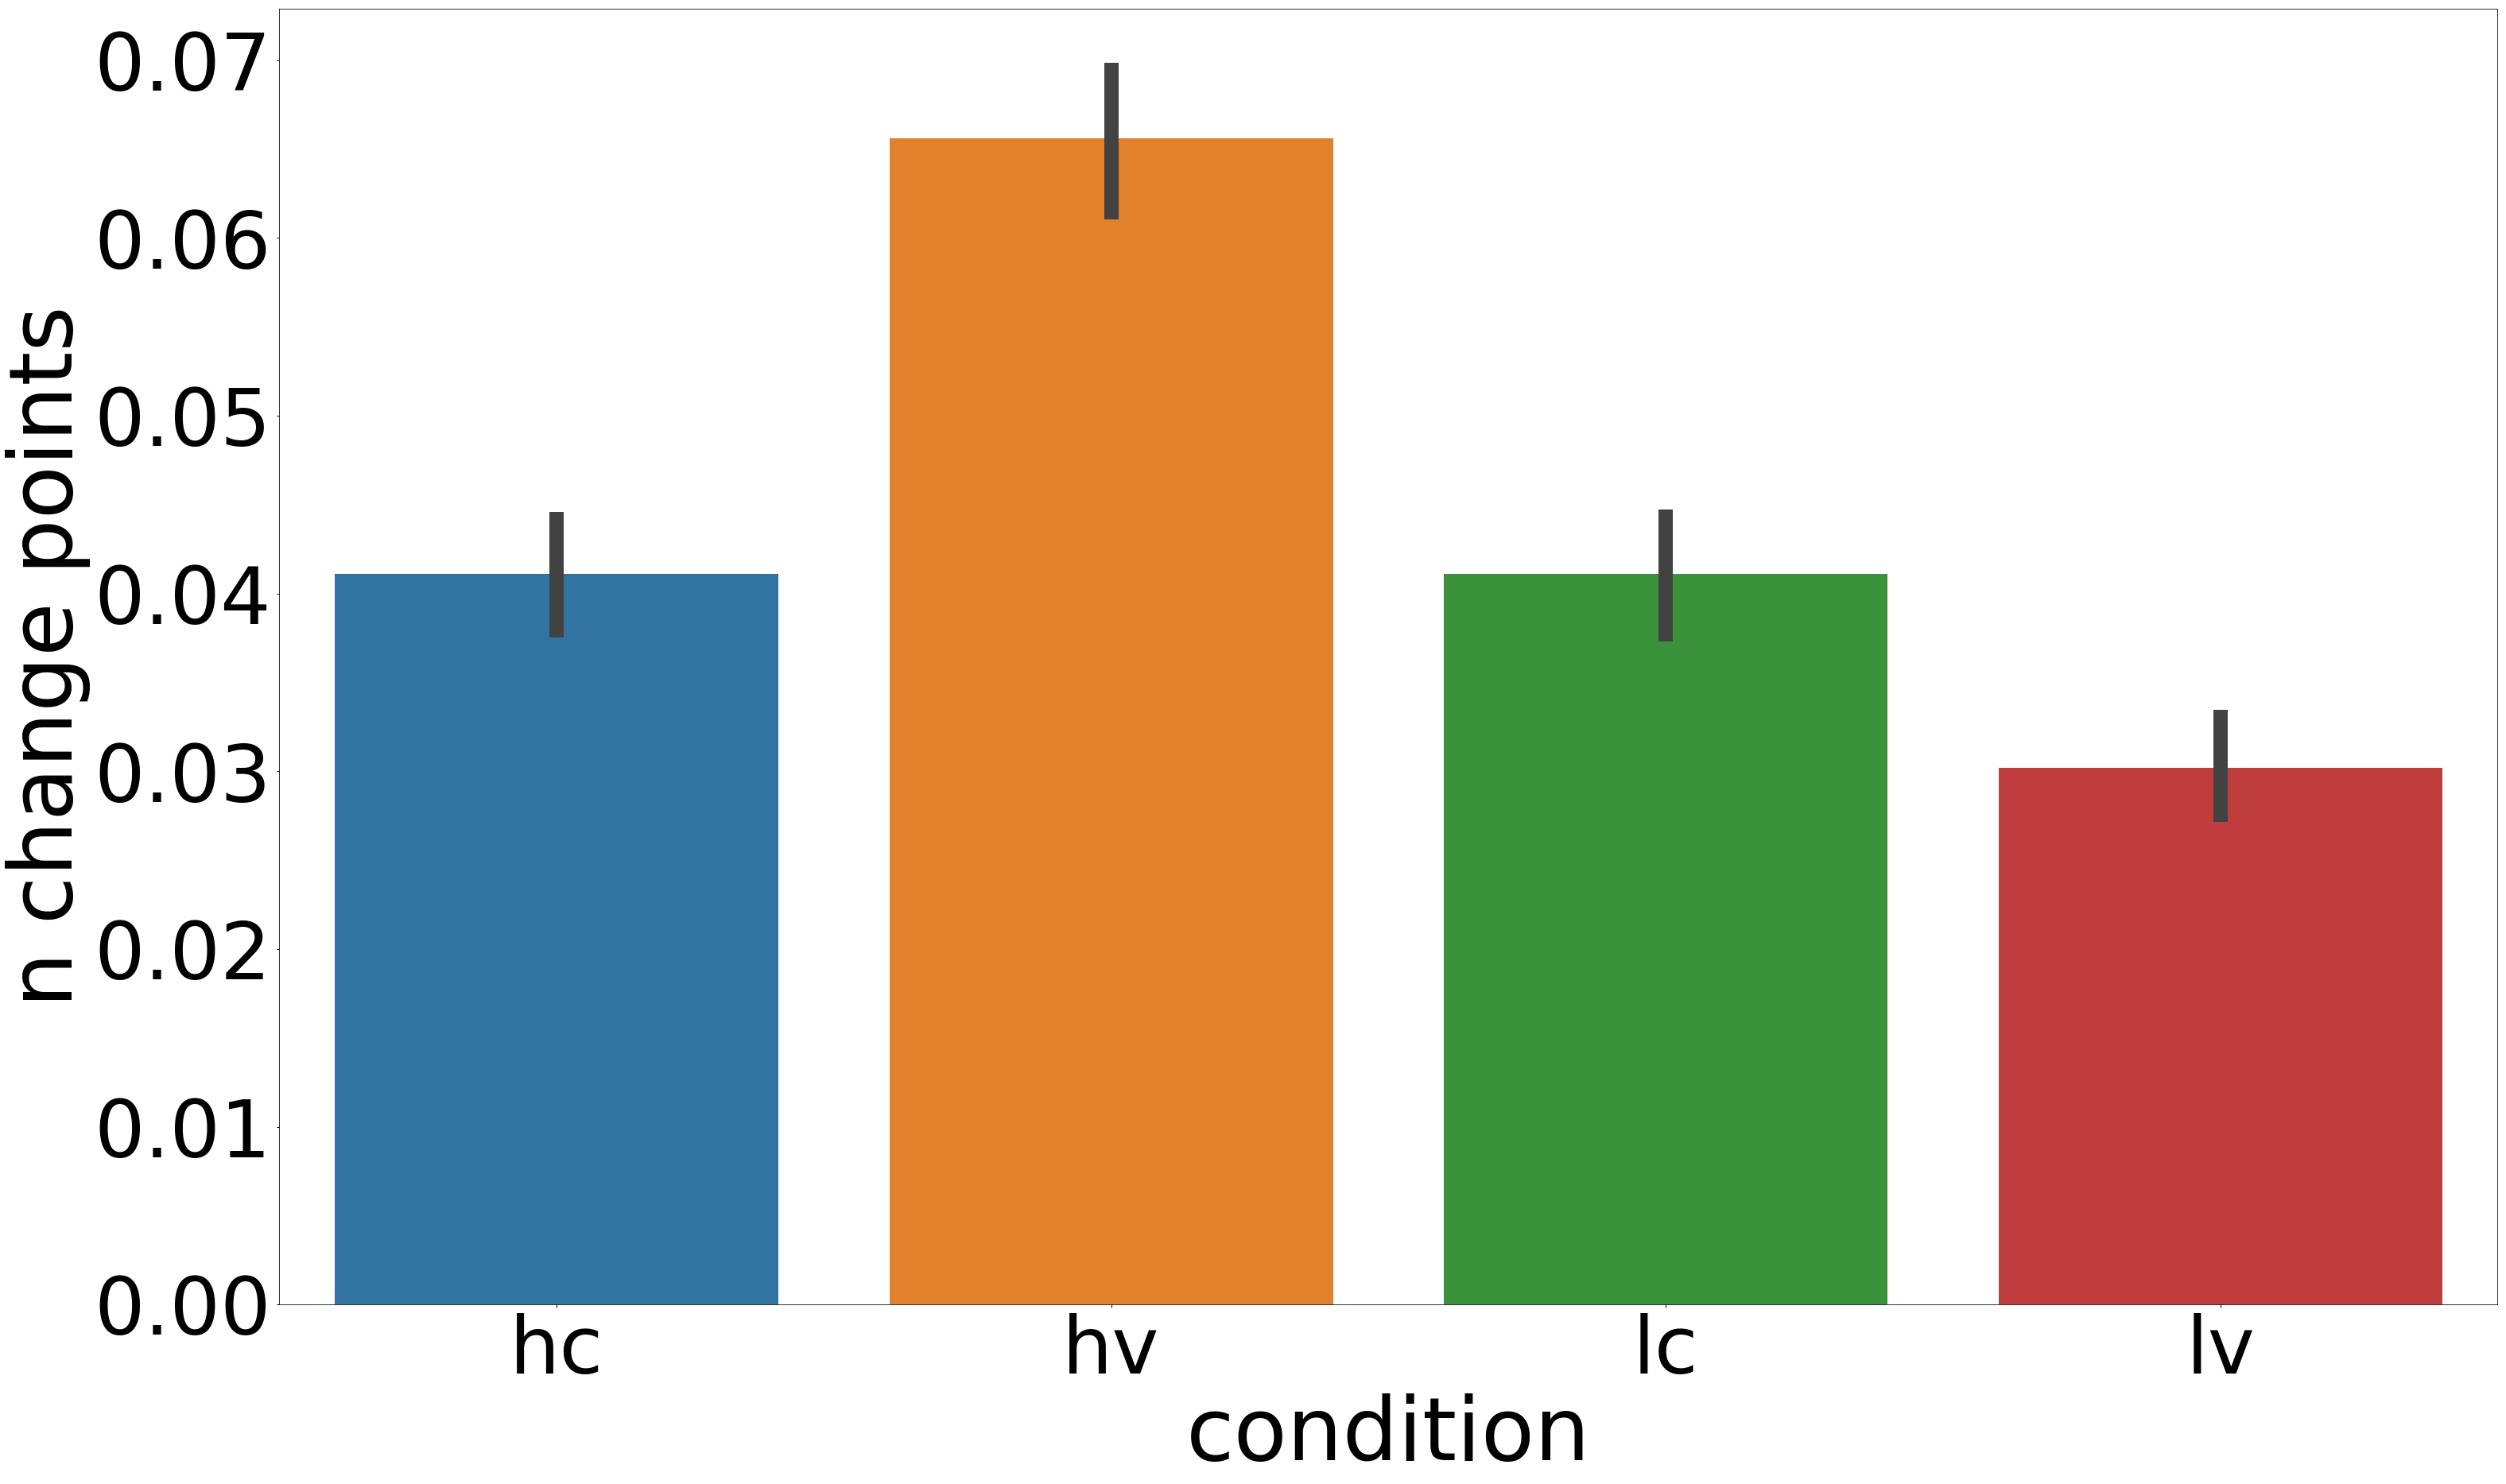

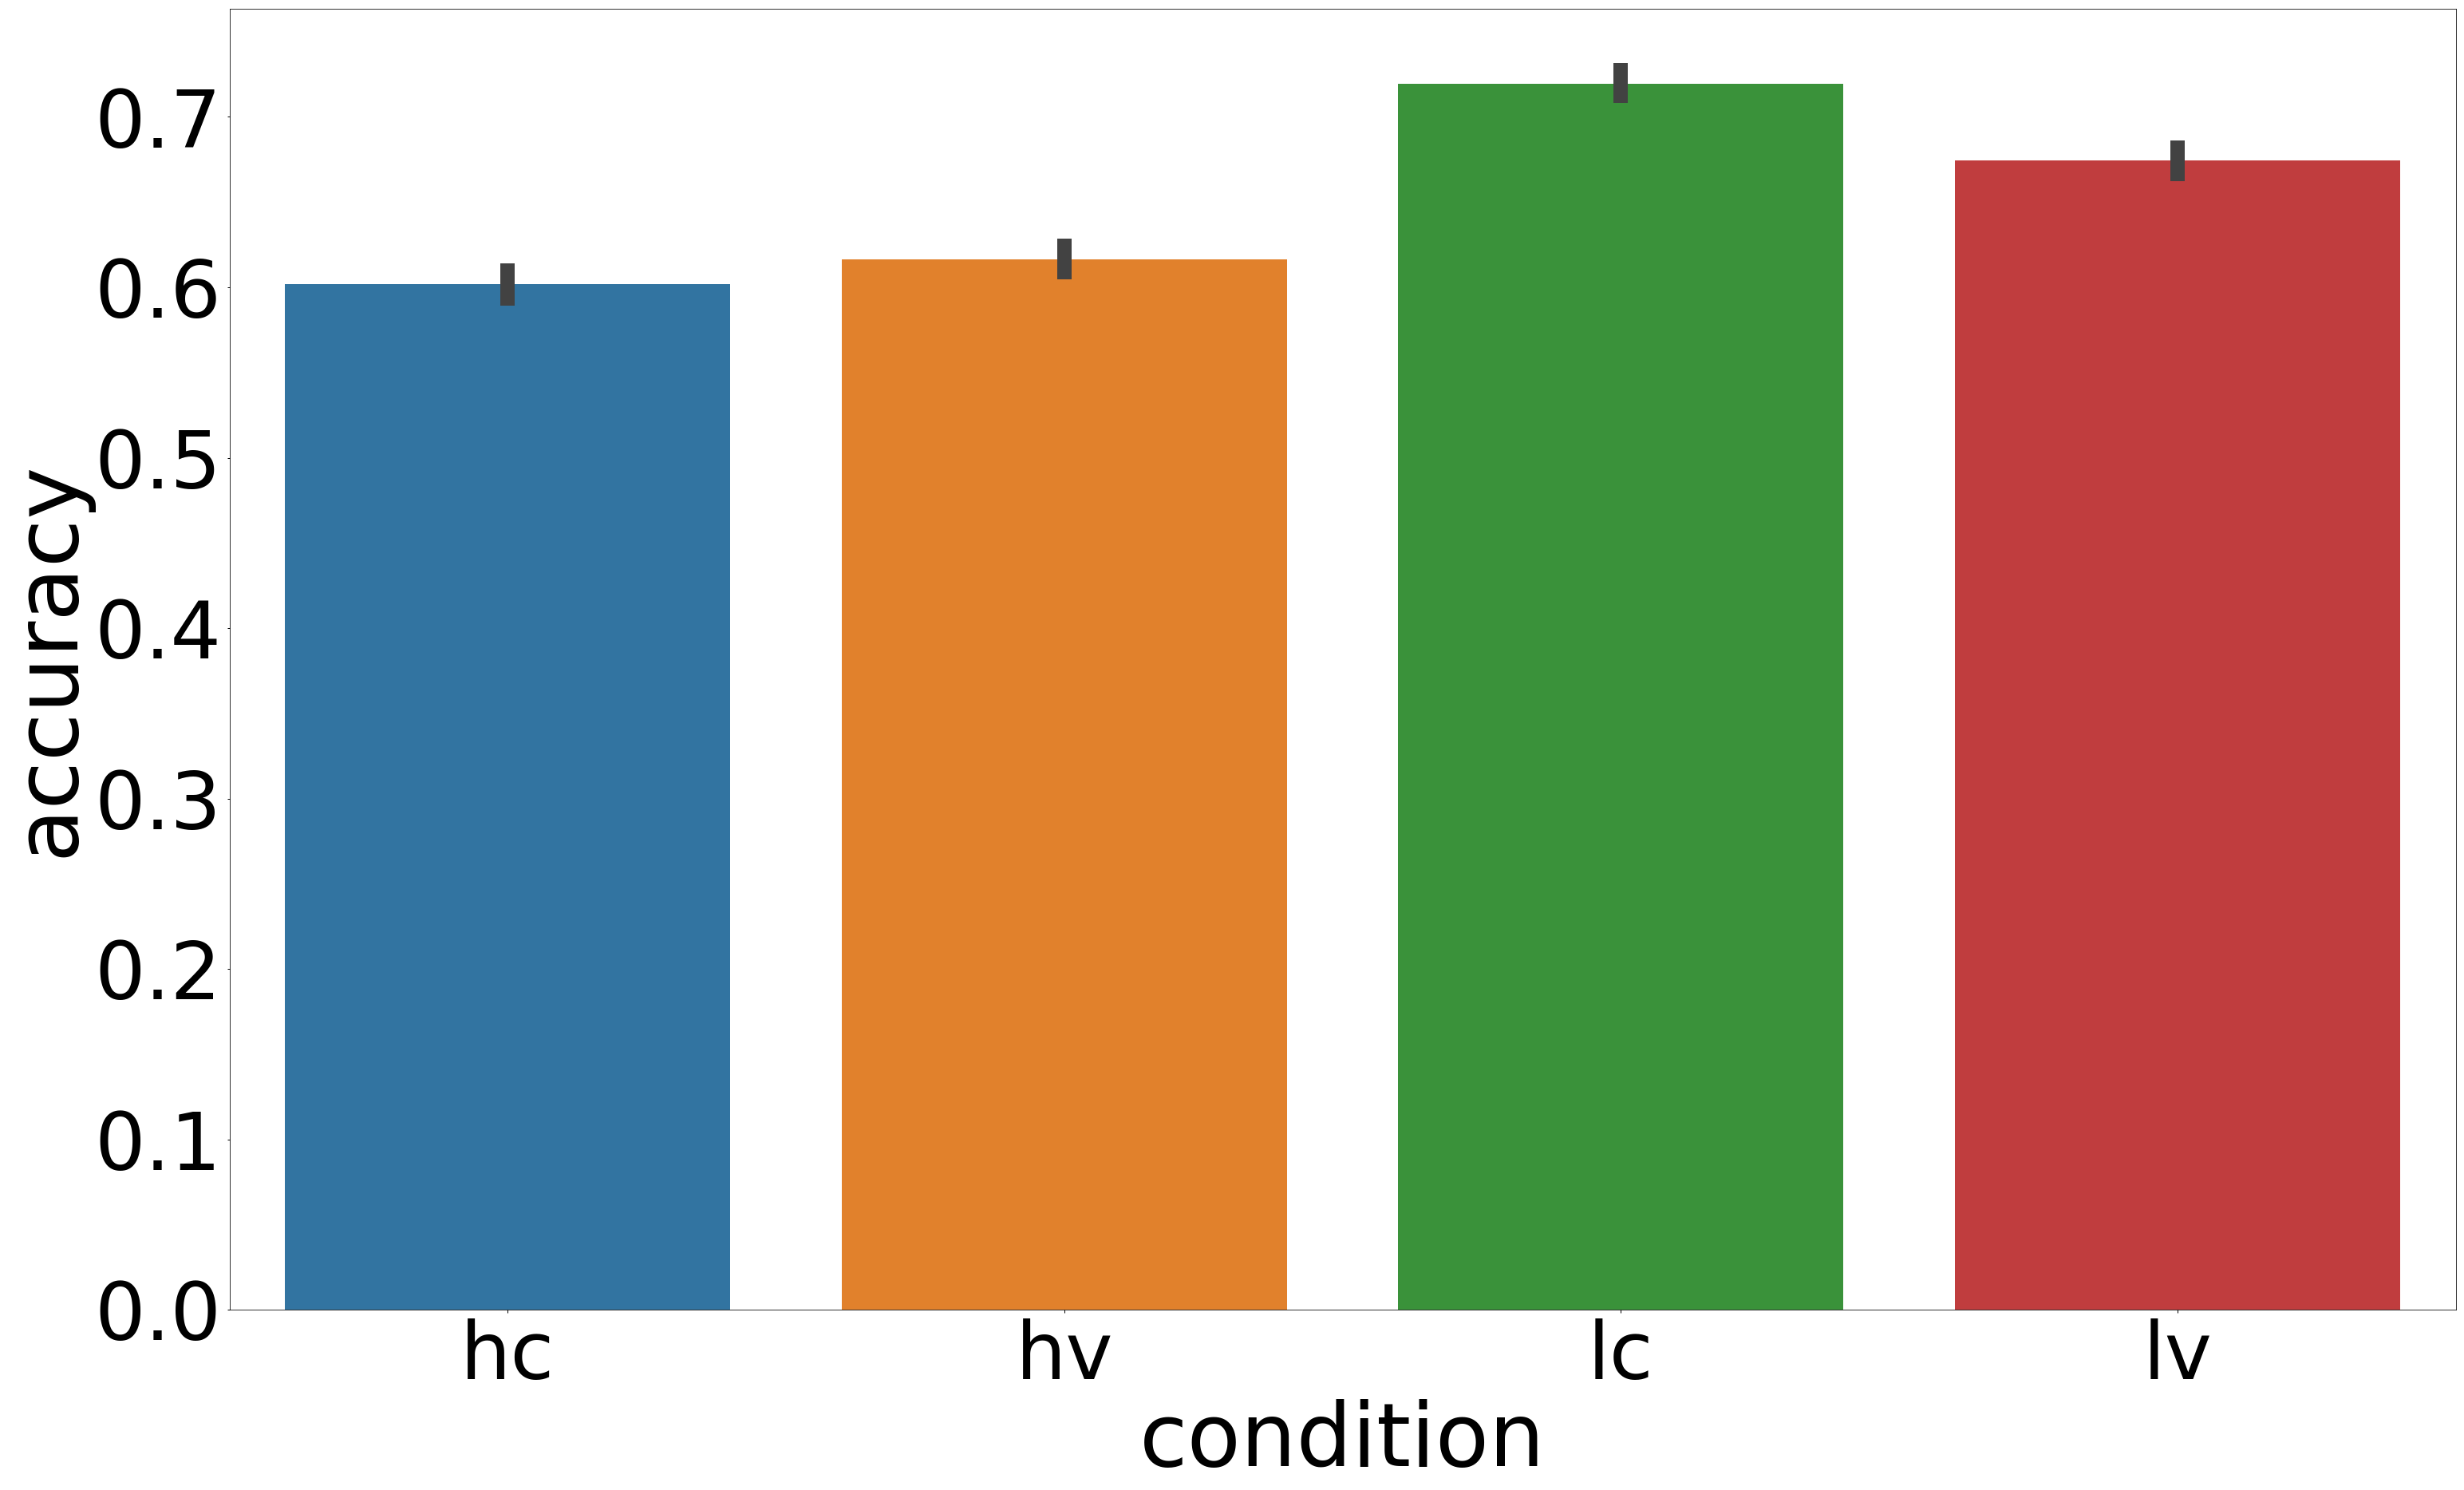

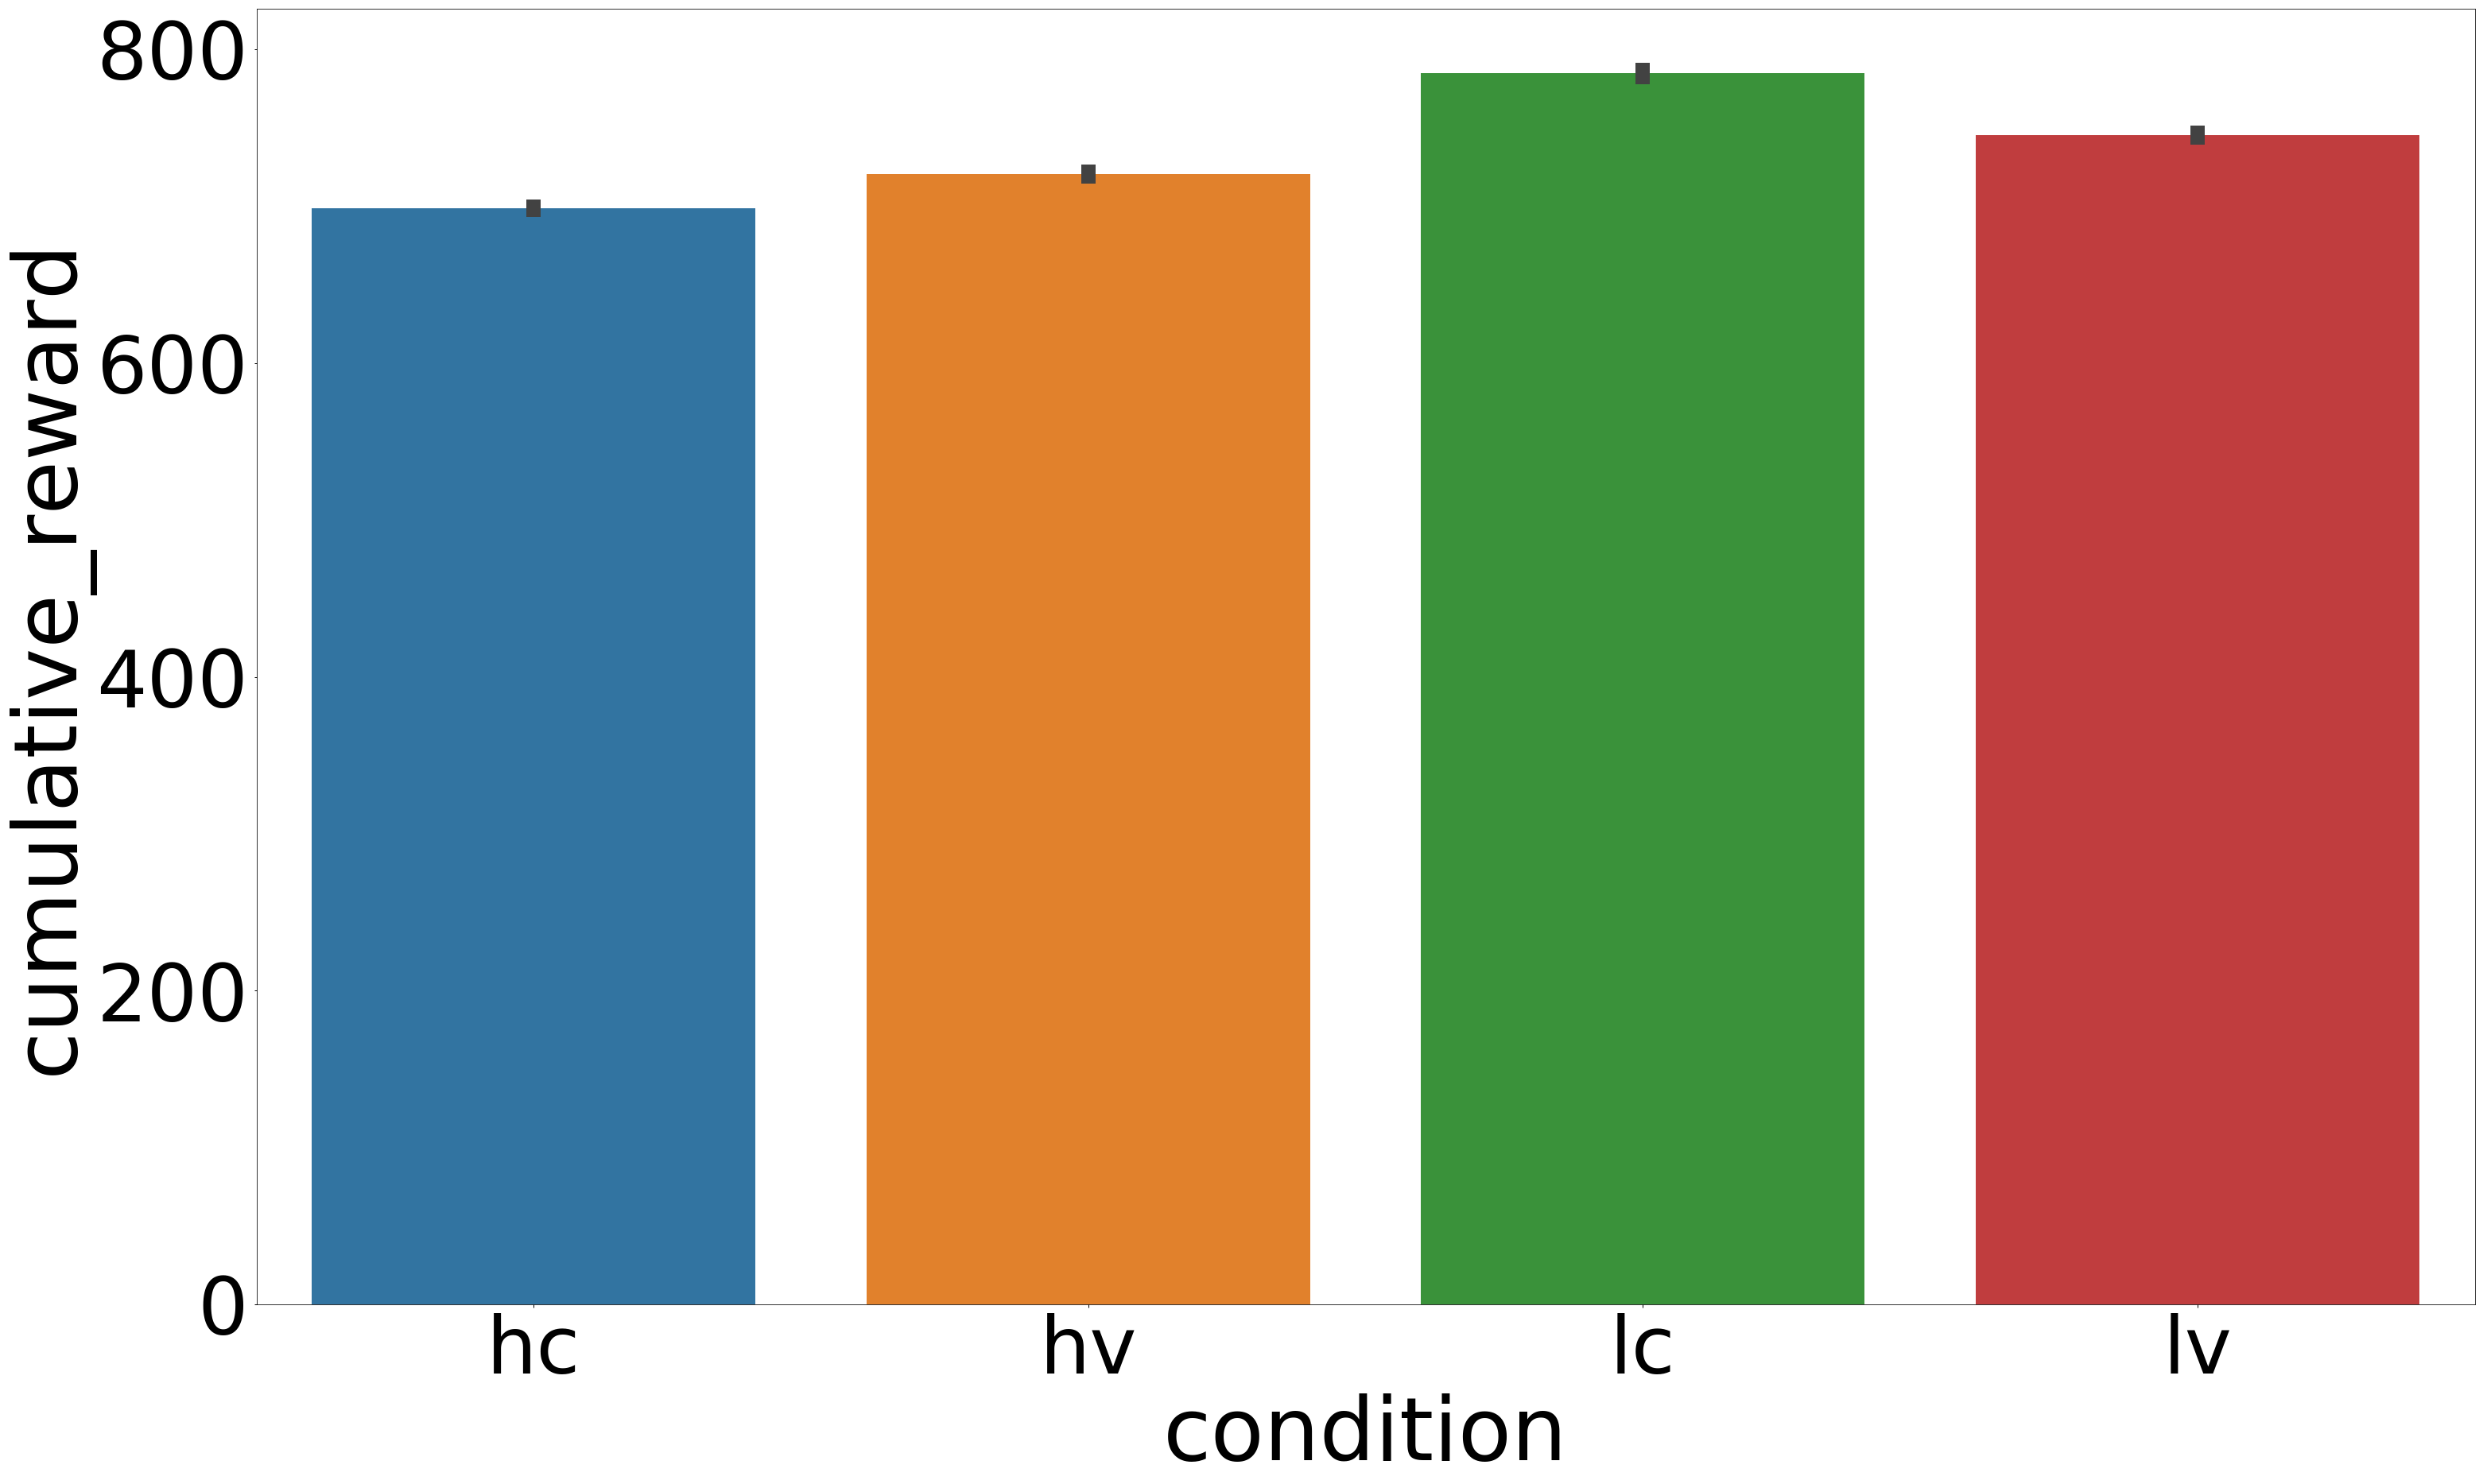

In [9]:
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cp_with_slow_fast", data=test_data, ci=95, n_boot=1000)
plt.ylabel('n change points')

plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="p_id_accuracy", data=test_data, ci=95, n_boot=1000)
plt.ylabel('accuracy')

plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cumulative_reward", data=test_data, ci=95, n_boot=1000)
plt.ylabel('cumulative_reward')

Text(0,0.5,'$\\Omega$')

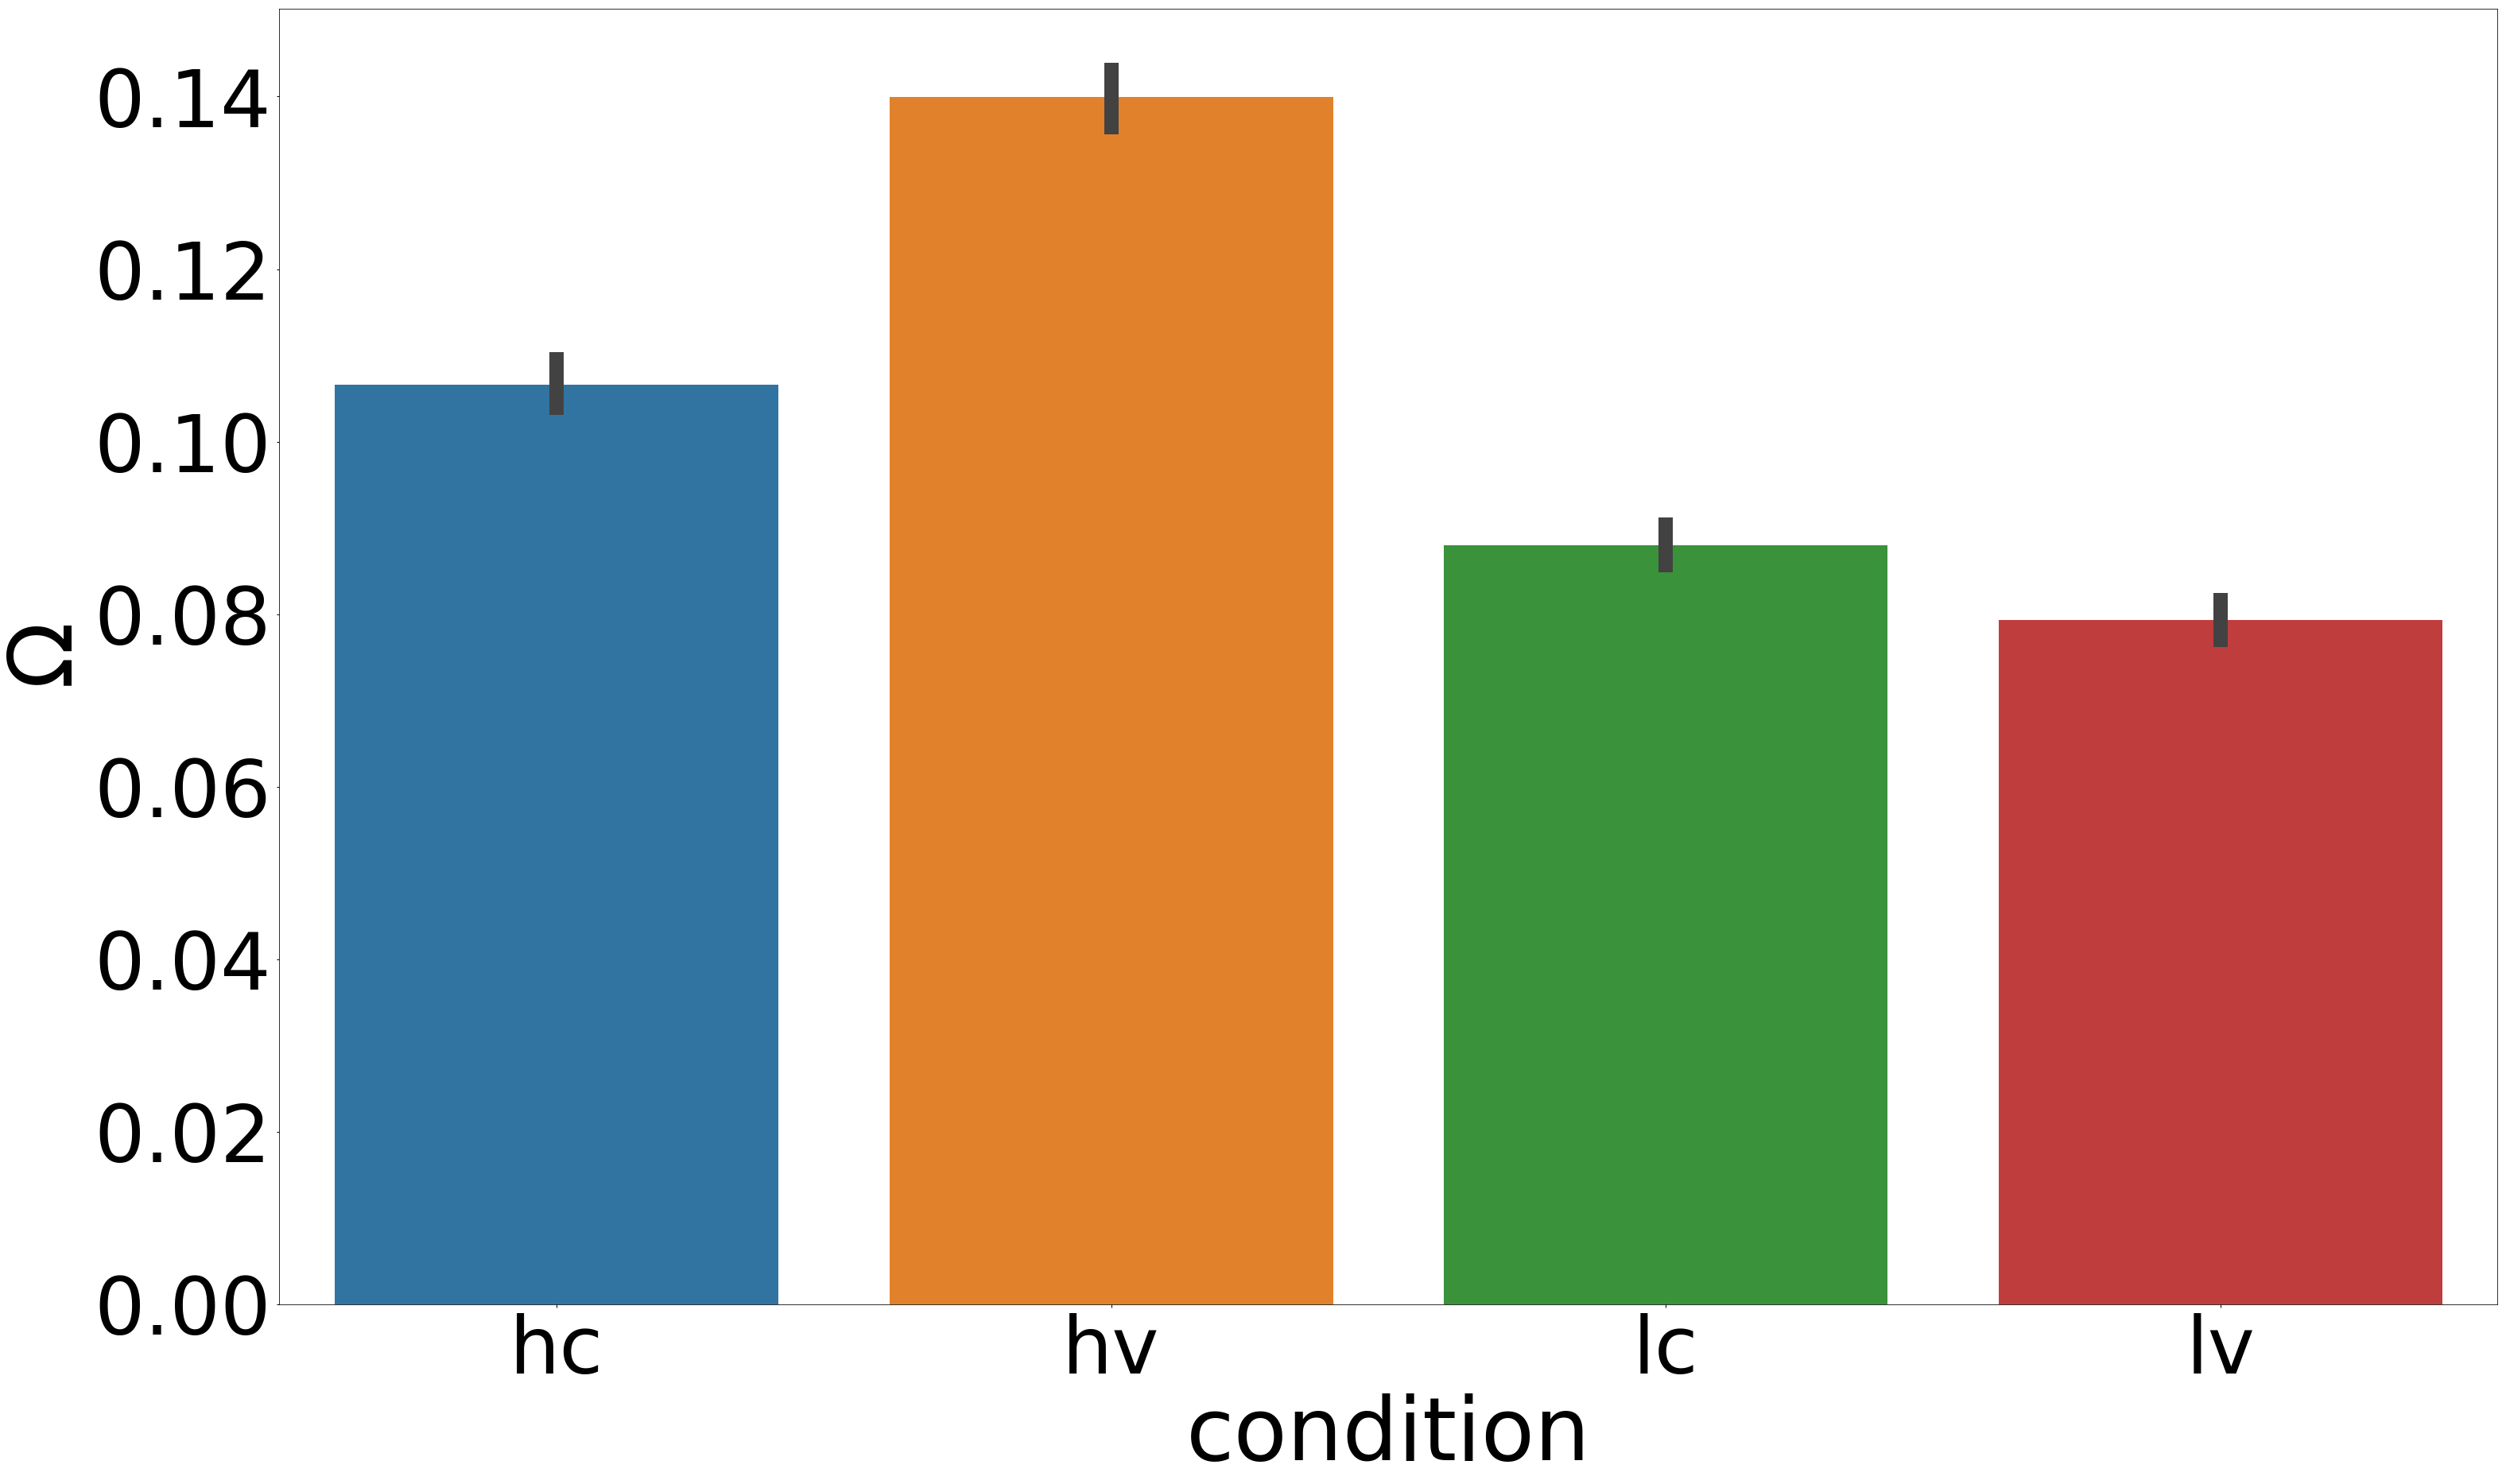

In [10]:
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cpp", data=all_obs_data, ci=95, n_boot=1000)
plt.ylabel('$\Omega$')

In [25]:
np.unique(all_obs_data.id_choice)

array([111, 112])

In [40]:
all_obs_data.loc[all_obs_data.id_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.id_choice == 112, 'id_choice'] = 1

In [41]:
all_obs_data.loc[all_obs_data.p_id_solution == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.p_id_solution == 112, 'p_id_solution'] = 1

In [207]:
all_obs_data_sample_lv = all_obs_data[(all_obs_data.condition == 'lv') & (all_obs_data.ID == 765)] 
all_obs_data_sample_hv = all_obs_data[(all_obs_data.condition == 'hv') & (all_obs_data.ID == 765)] 

In [28]:
np.sum(((all_obs_data.id_choice == all_obs_data.p_id_solution) == 
all_obs_data.p_id_accuracy))

57600

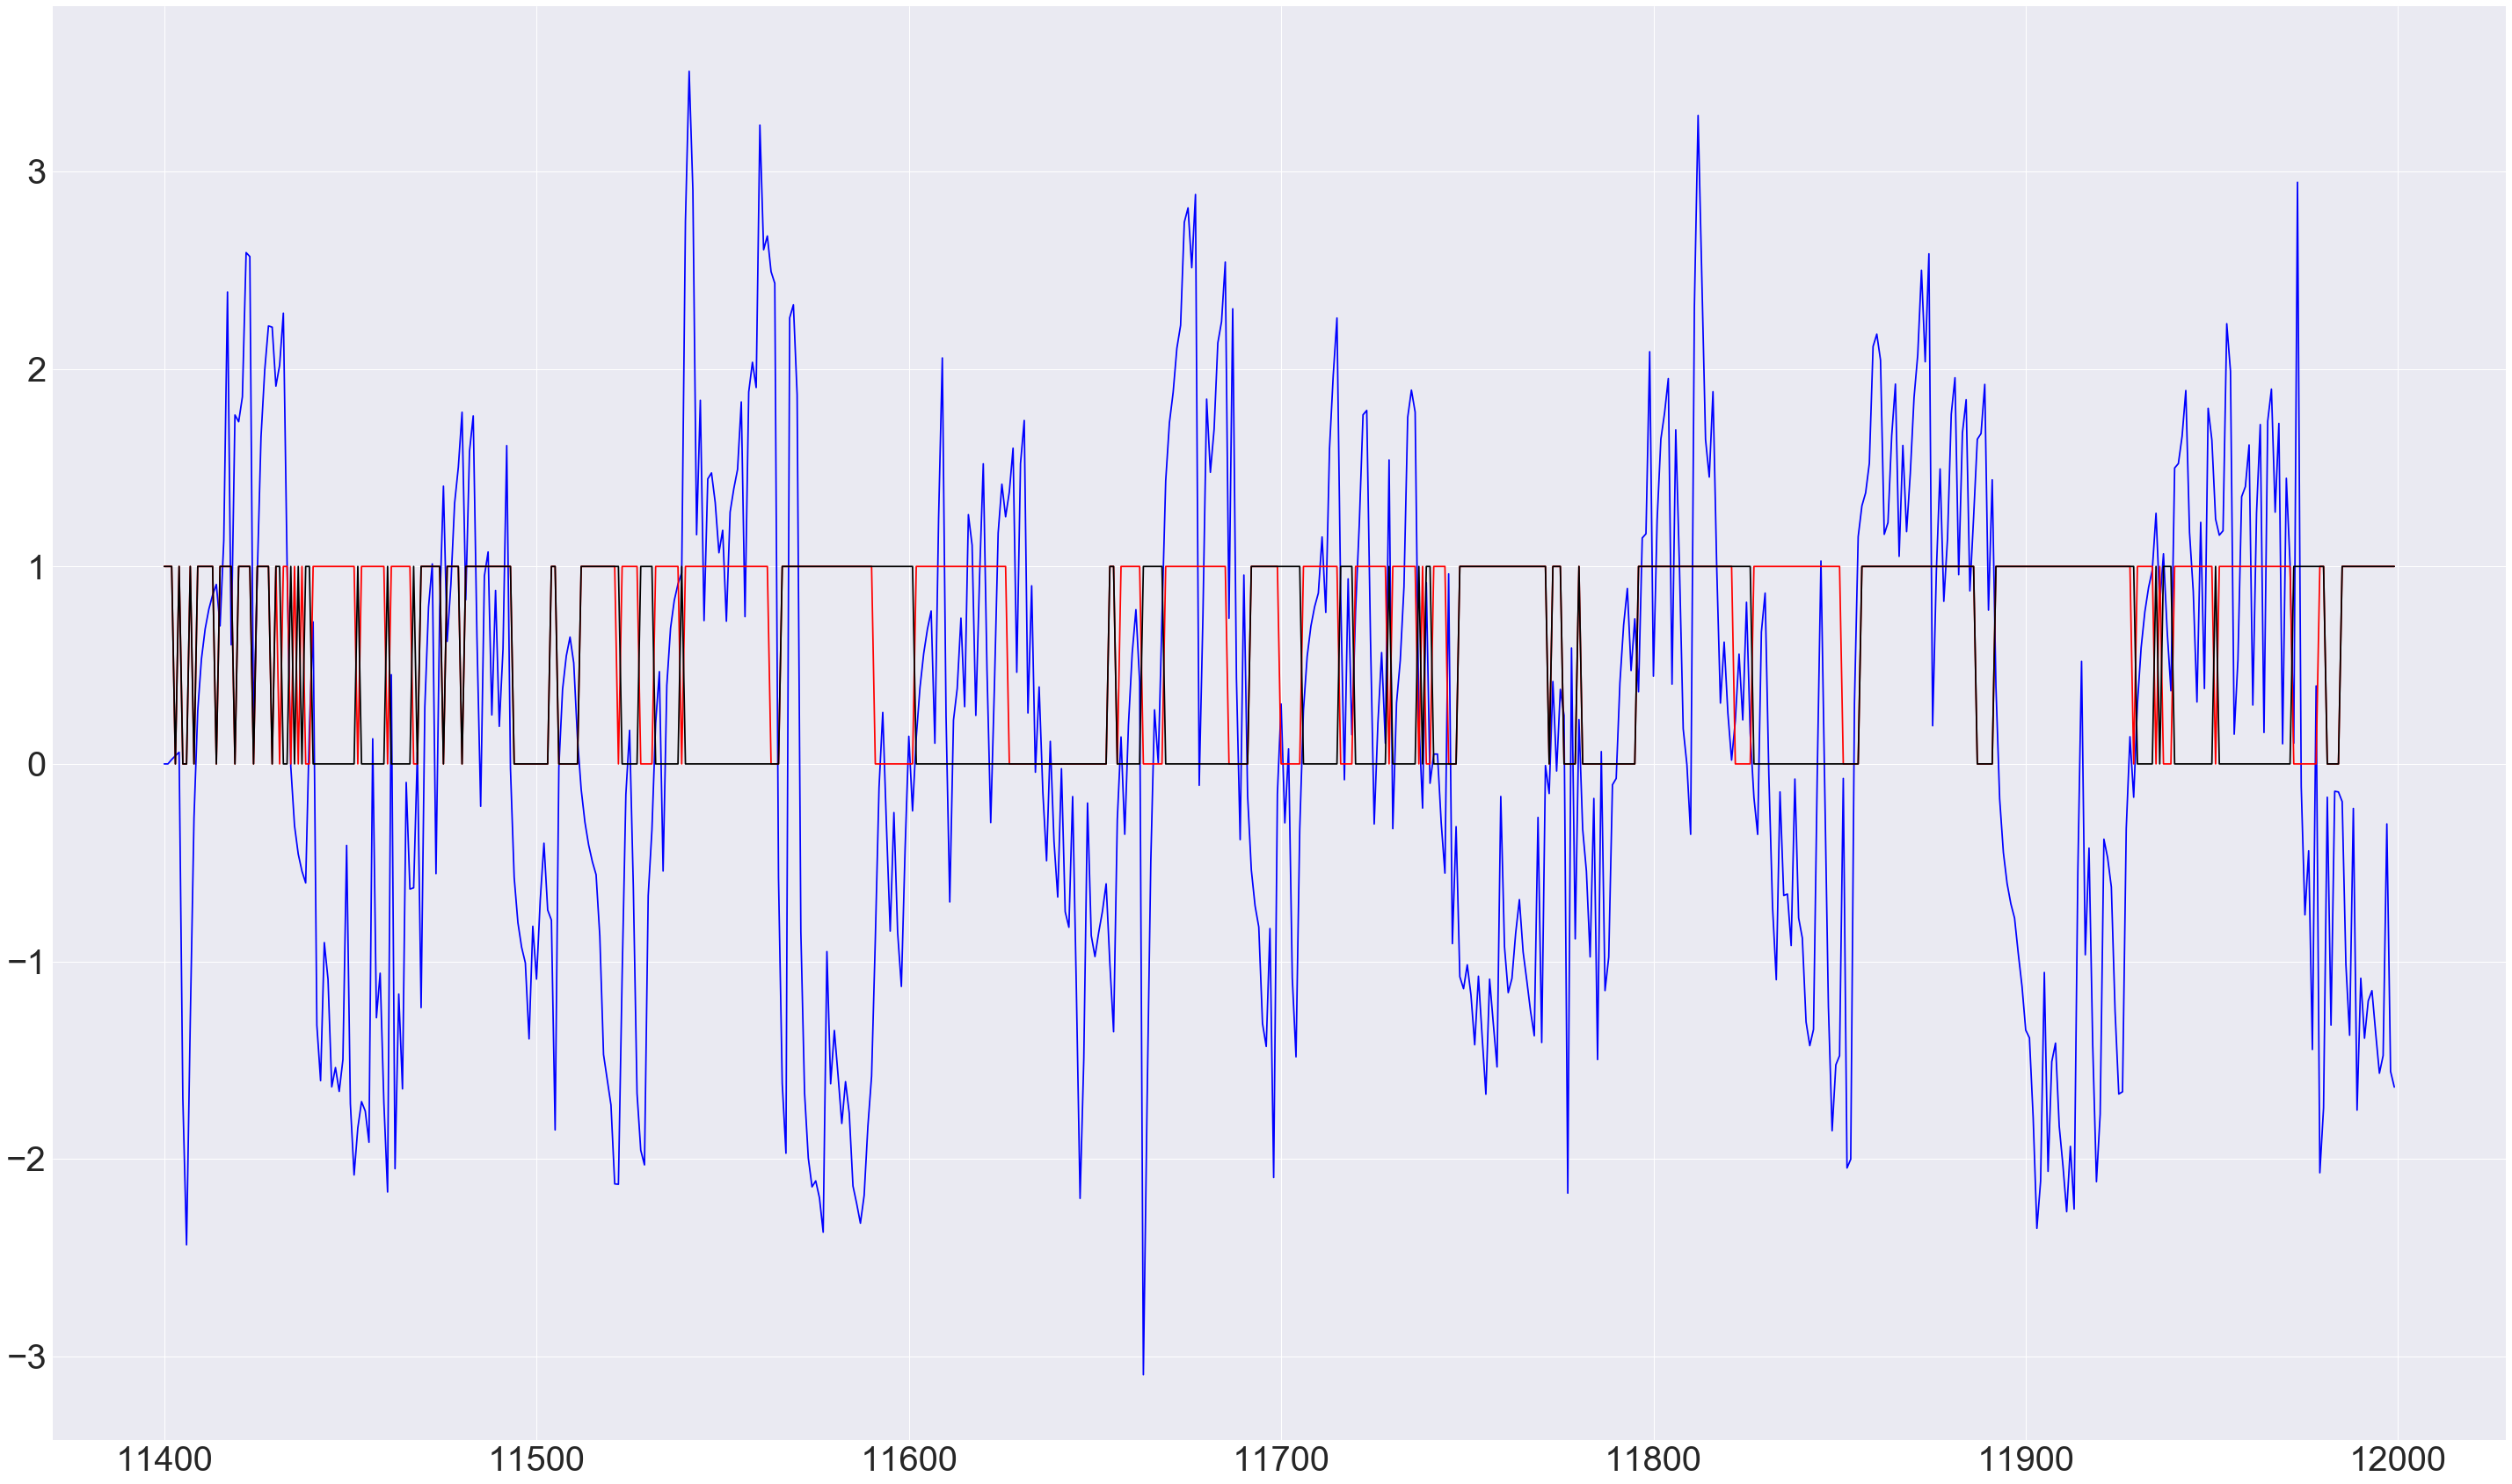

In [209]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lv.target_B, 'b', label='$B$')
plt.plot(all_obs_data_sample_lv.p_id_accuracy, 'r', label='accuracy')
plt.plot(all_obs_data_sample_lv.id_choice, 'k', label='choice',)

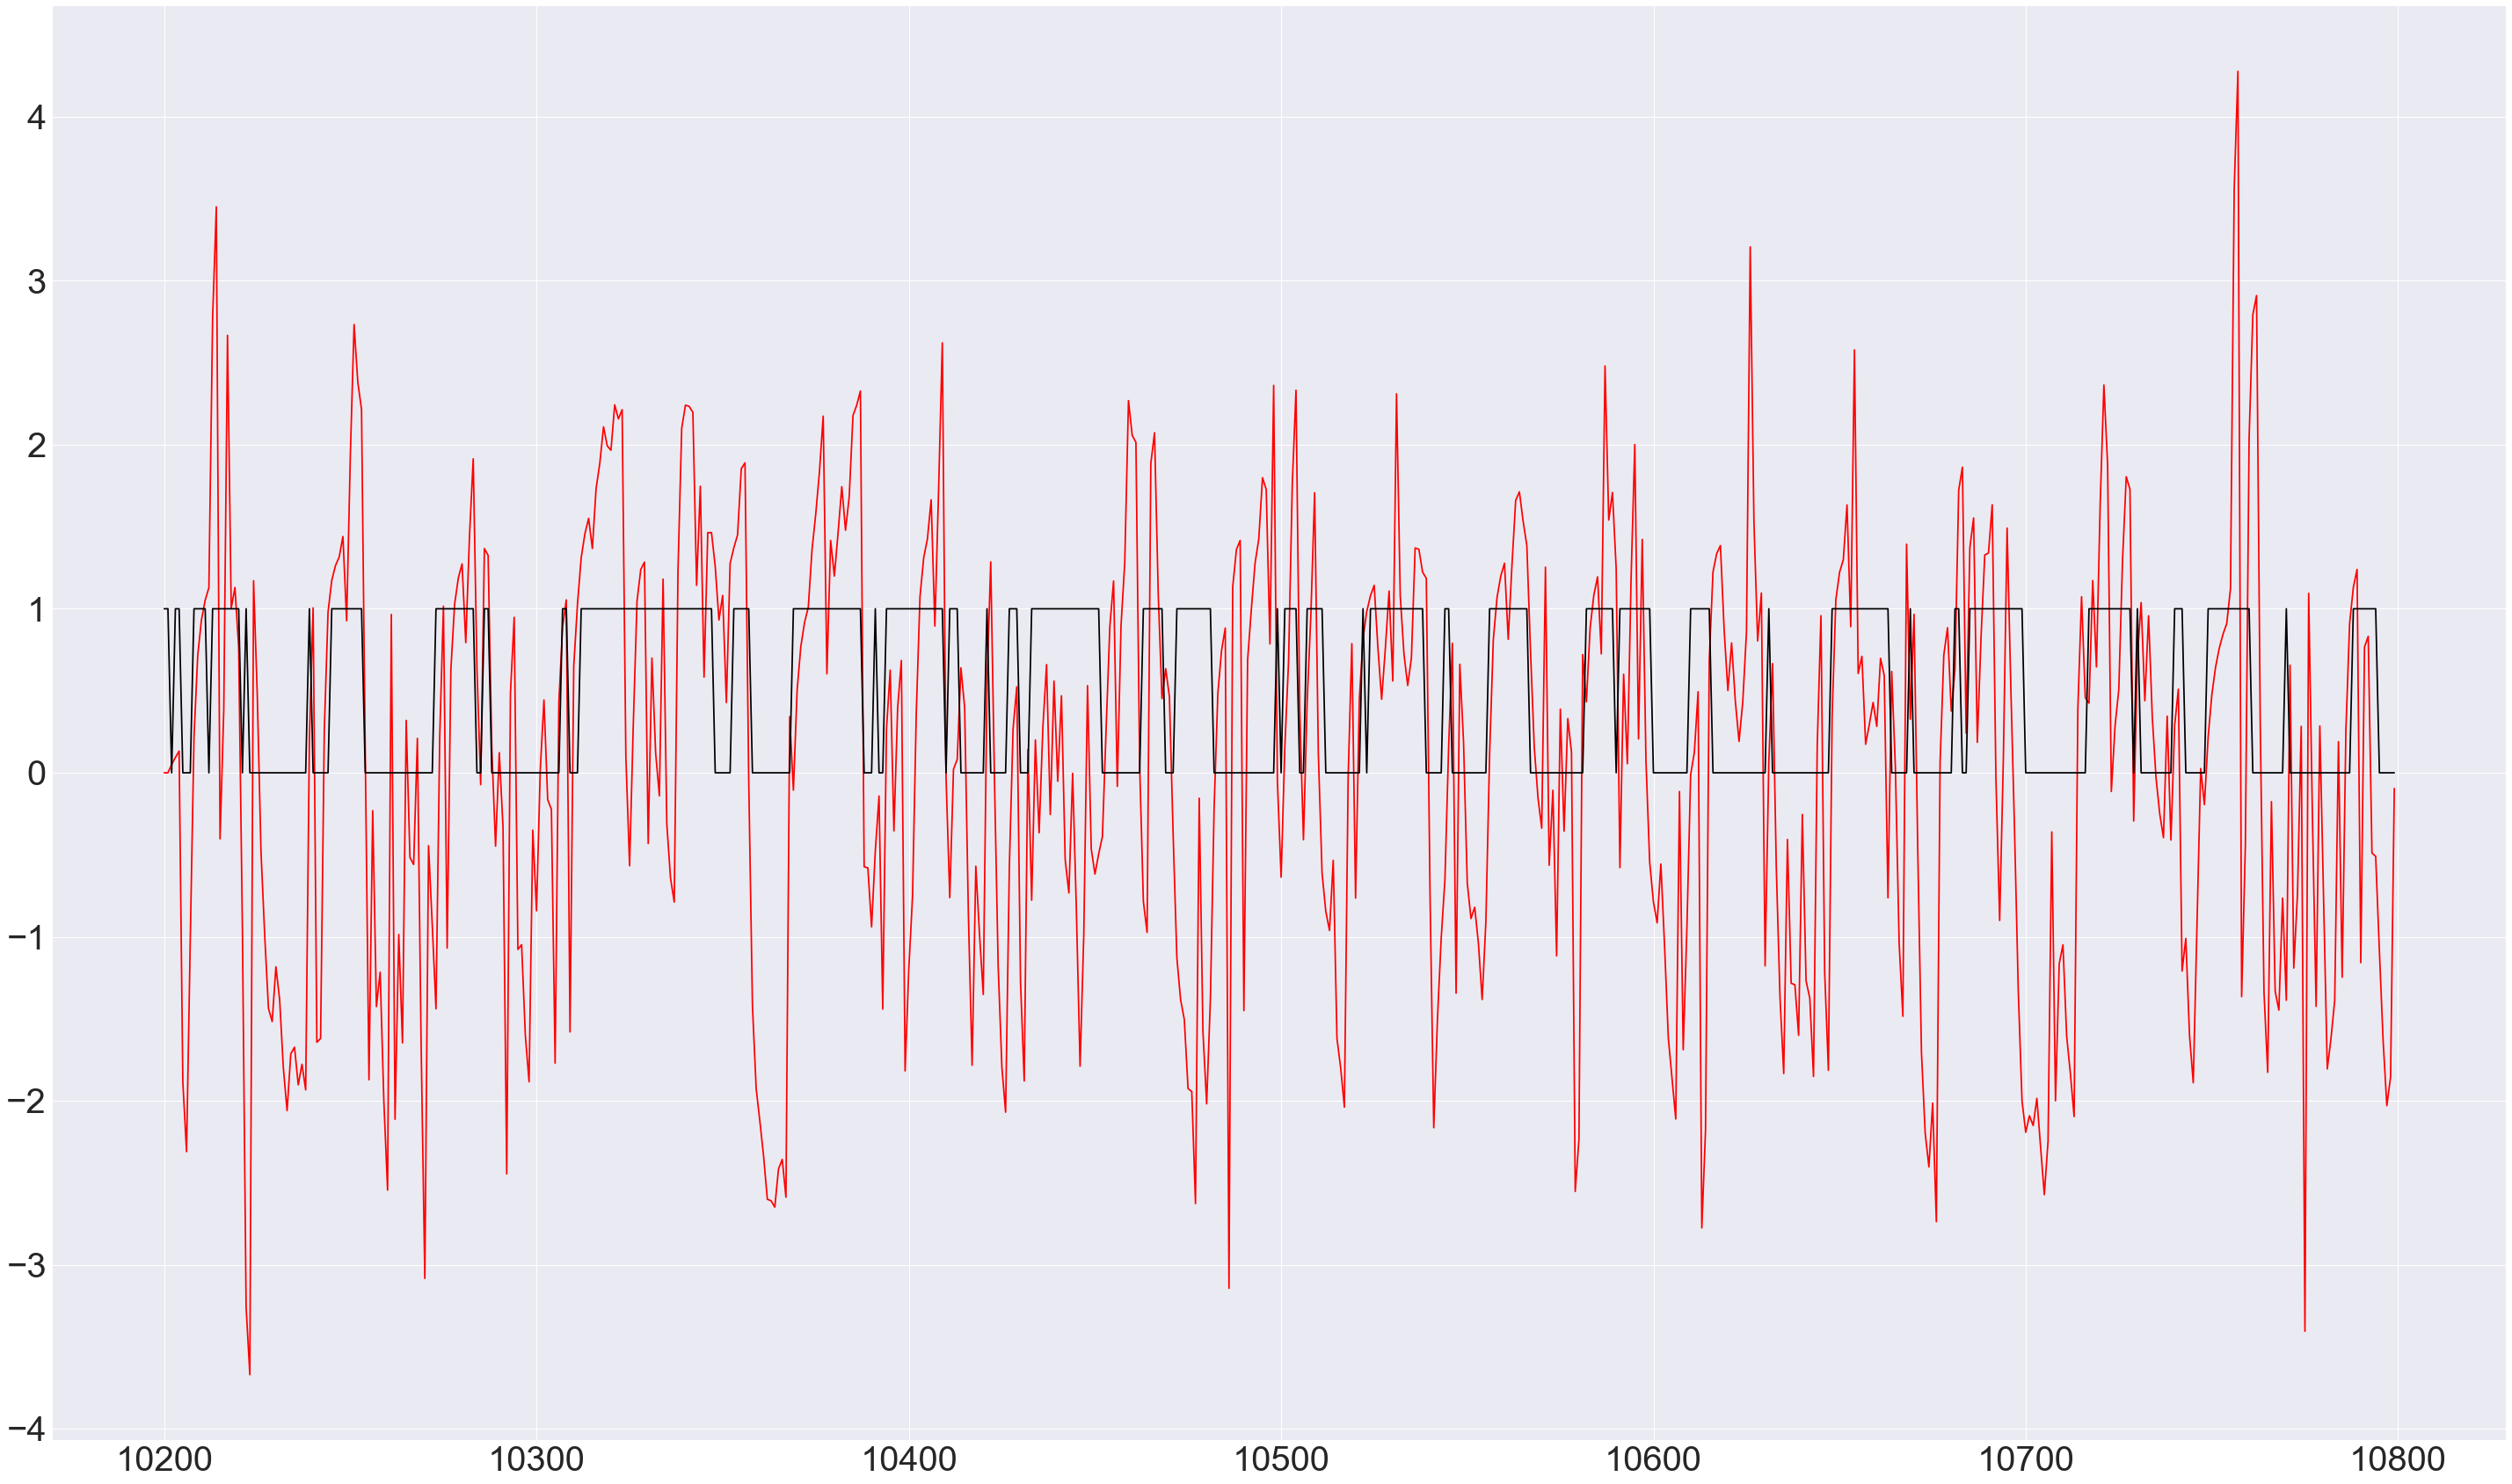

In [191]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_hv.target_B, 'r', label='$B$')
plt.plot(all_obs_data_sample_hv.id_choice, 'k', label='choice')

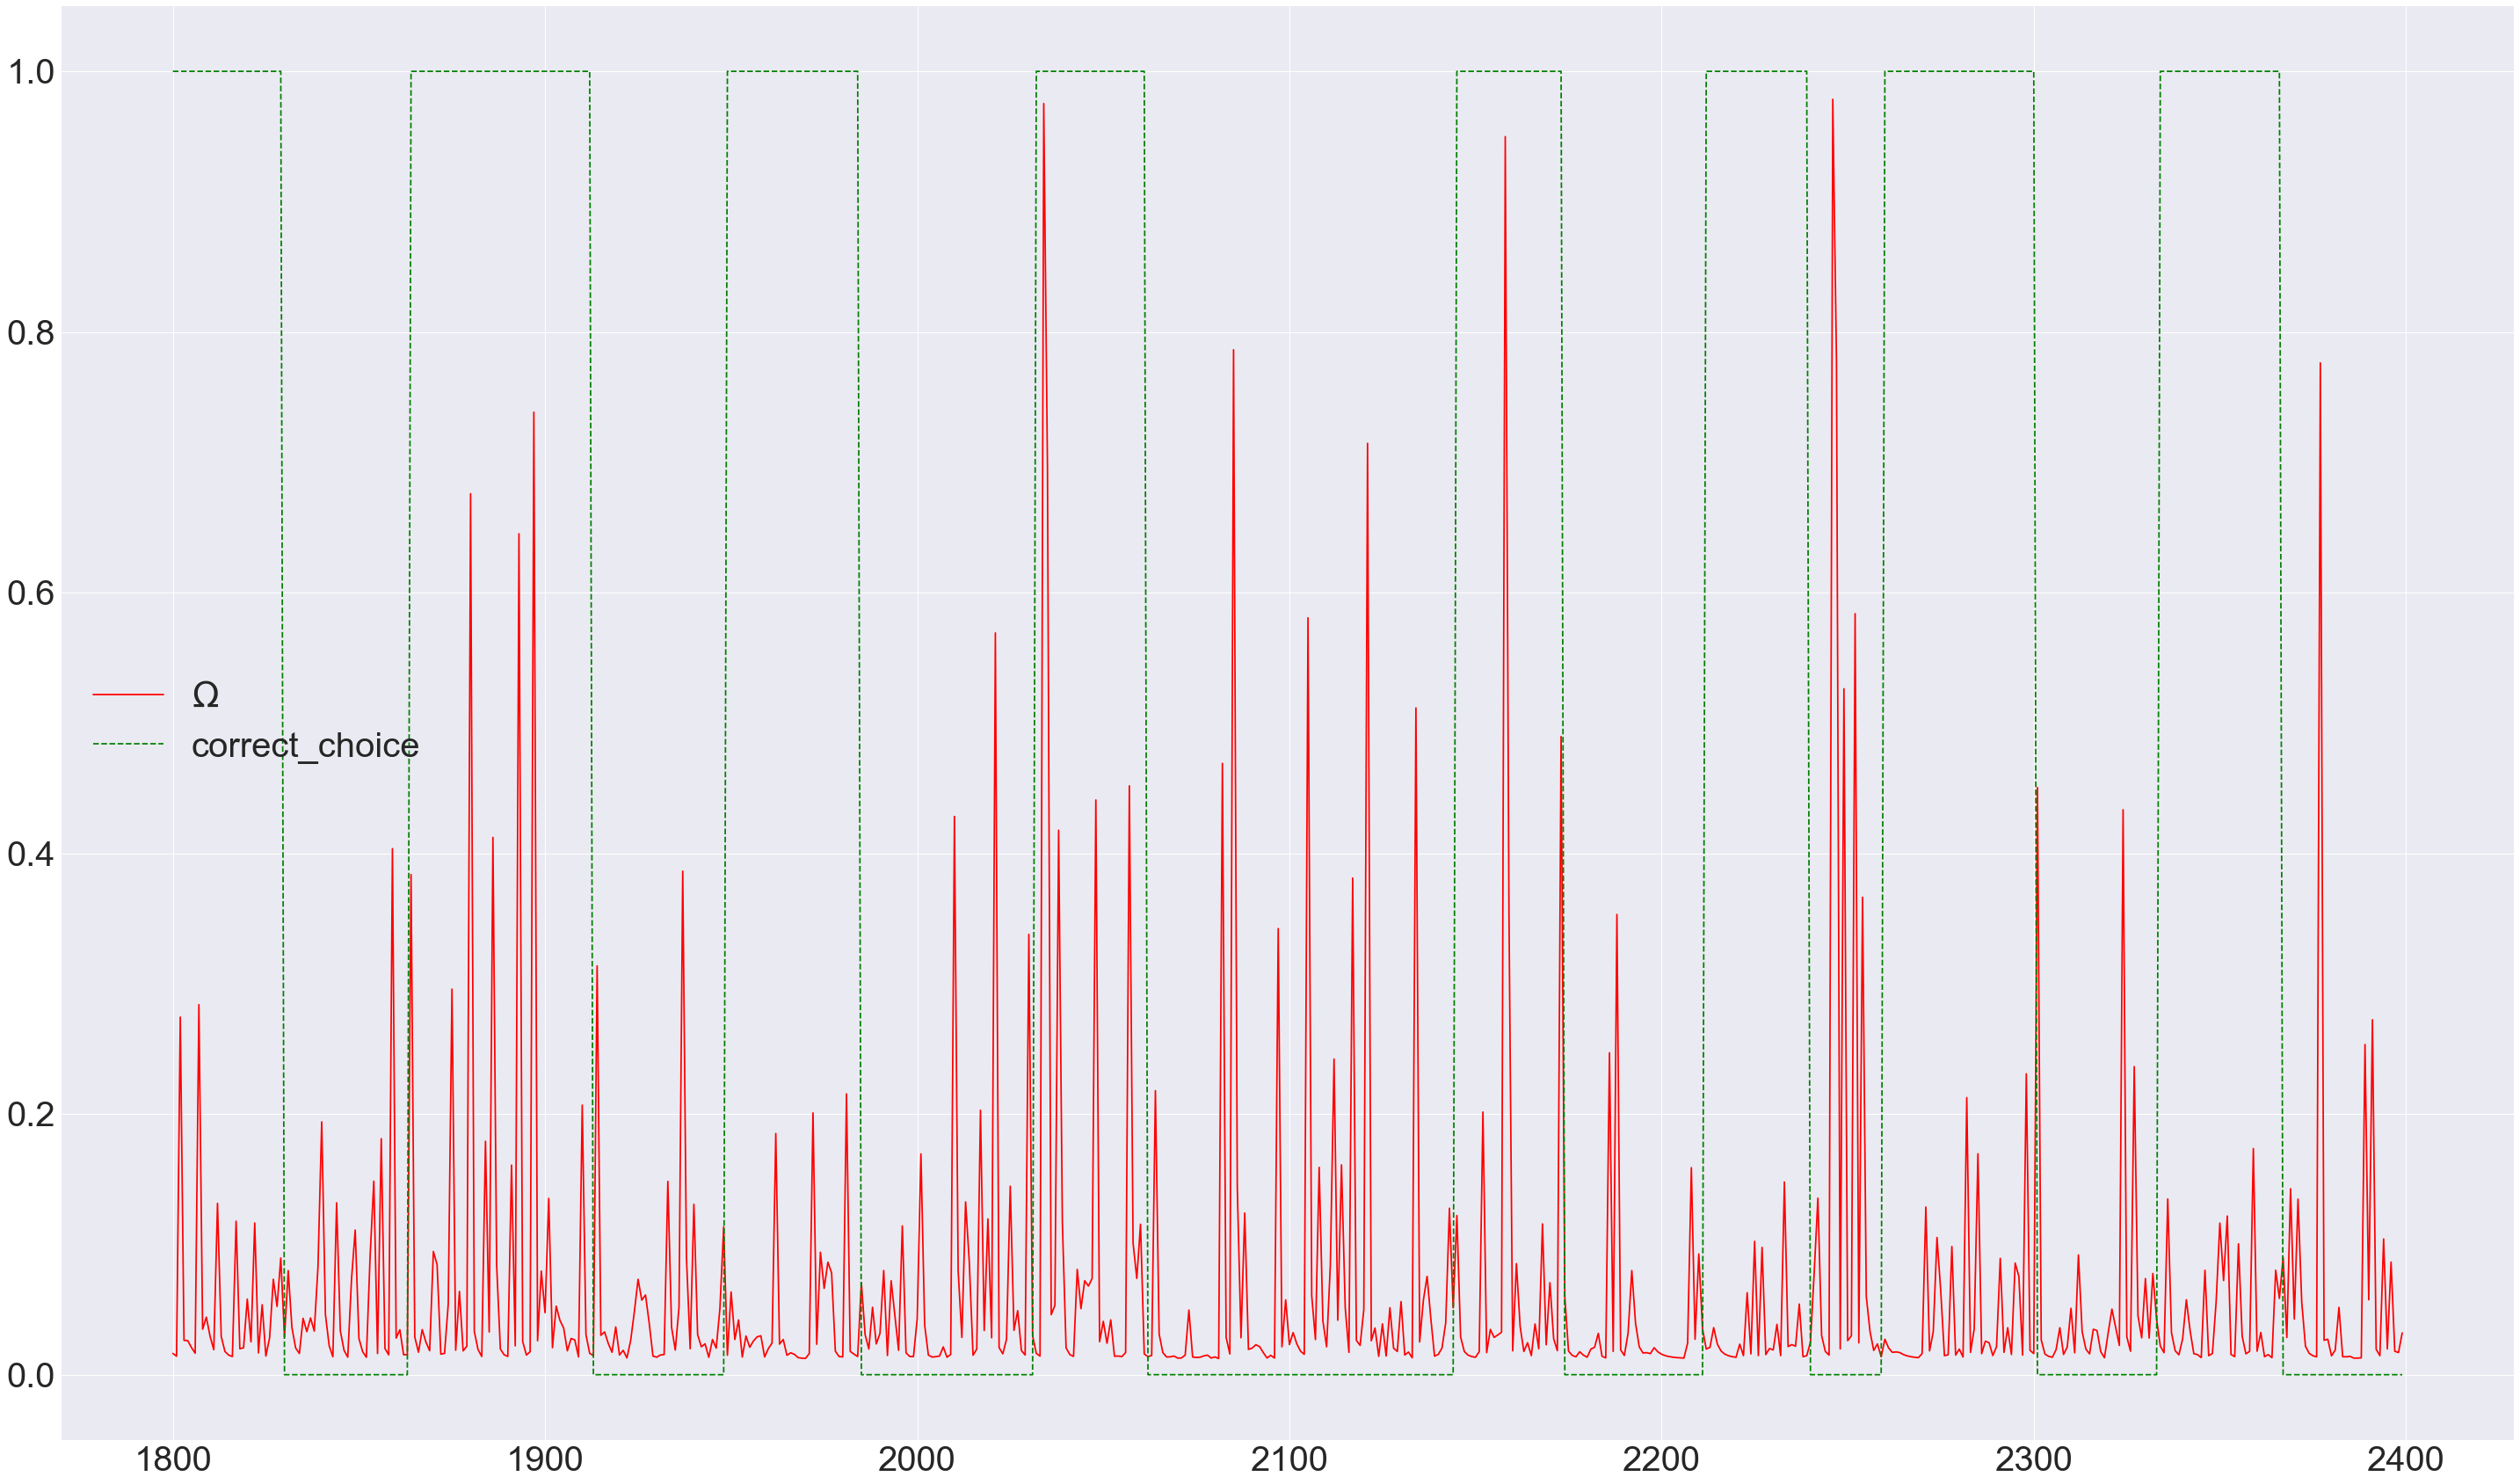

In [163]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lv.cpp, 'r', label='$\Omega$')
# plt.plot(all_obs_data_sample_lv.id_choice, 'k--', label='id_choice')
plt.plot(all_obs_data_sample_lv.p_id_solution, 'g--', label='correct_choice')
plt.legend()

In [159]:
all_obs_data_sample_lc = all_obs_data[(all_obs_data.condition == 'lc') & (all_obs_data.ID == 761)] 

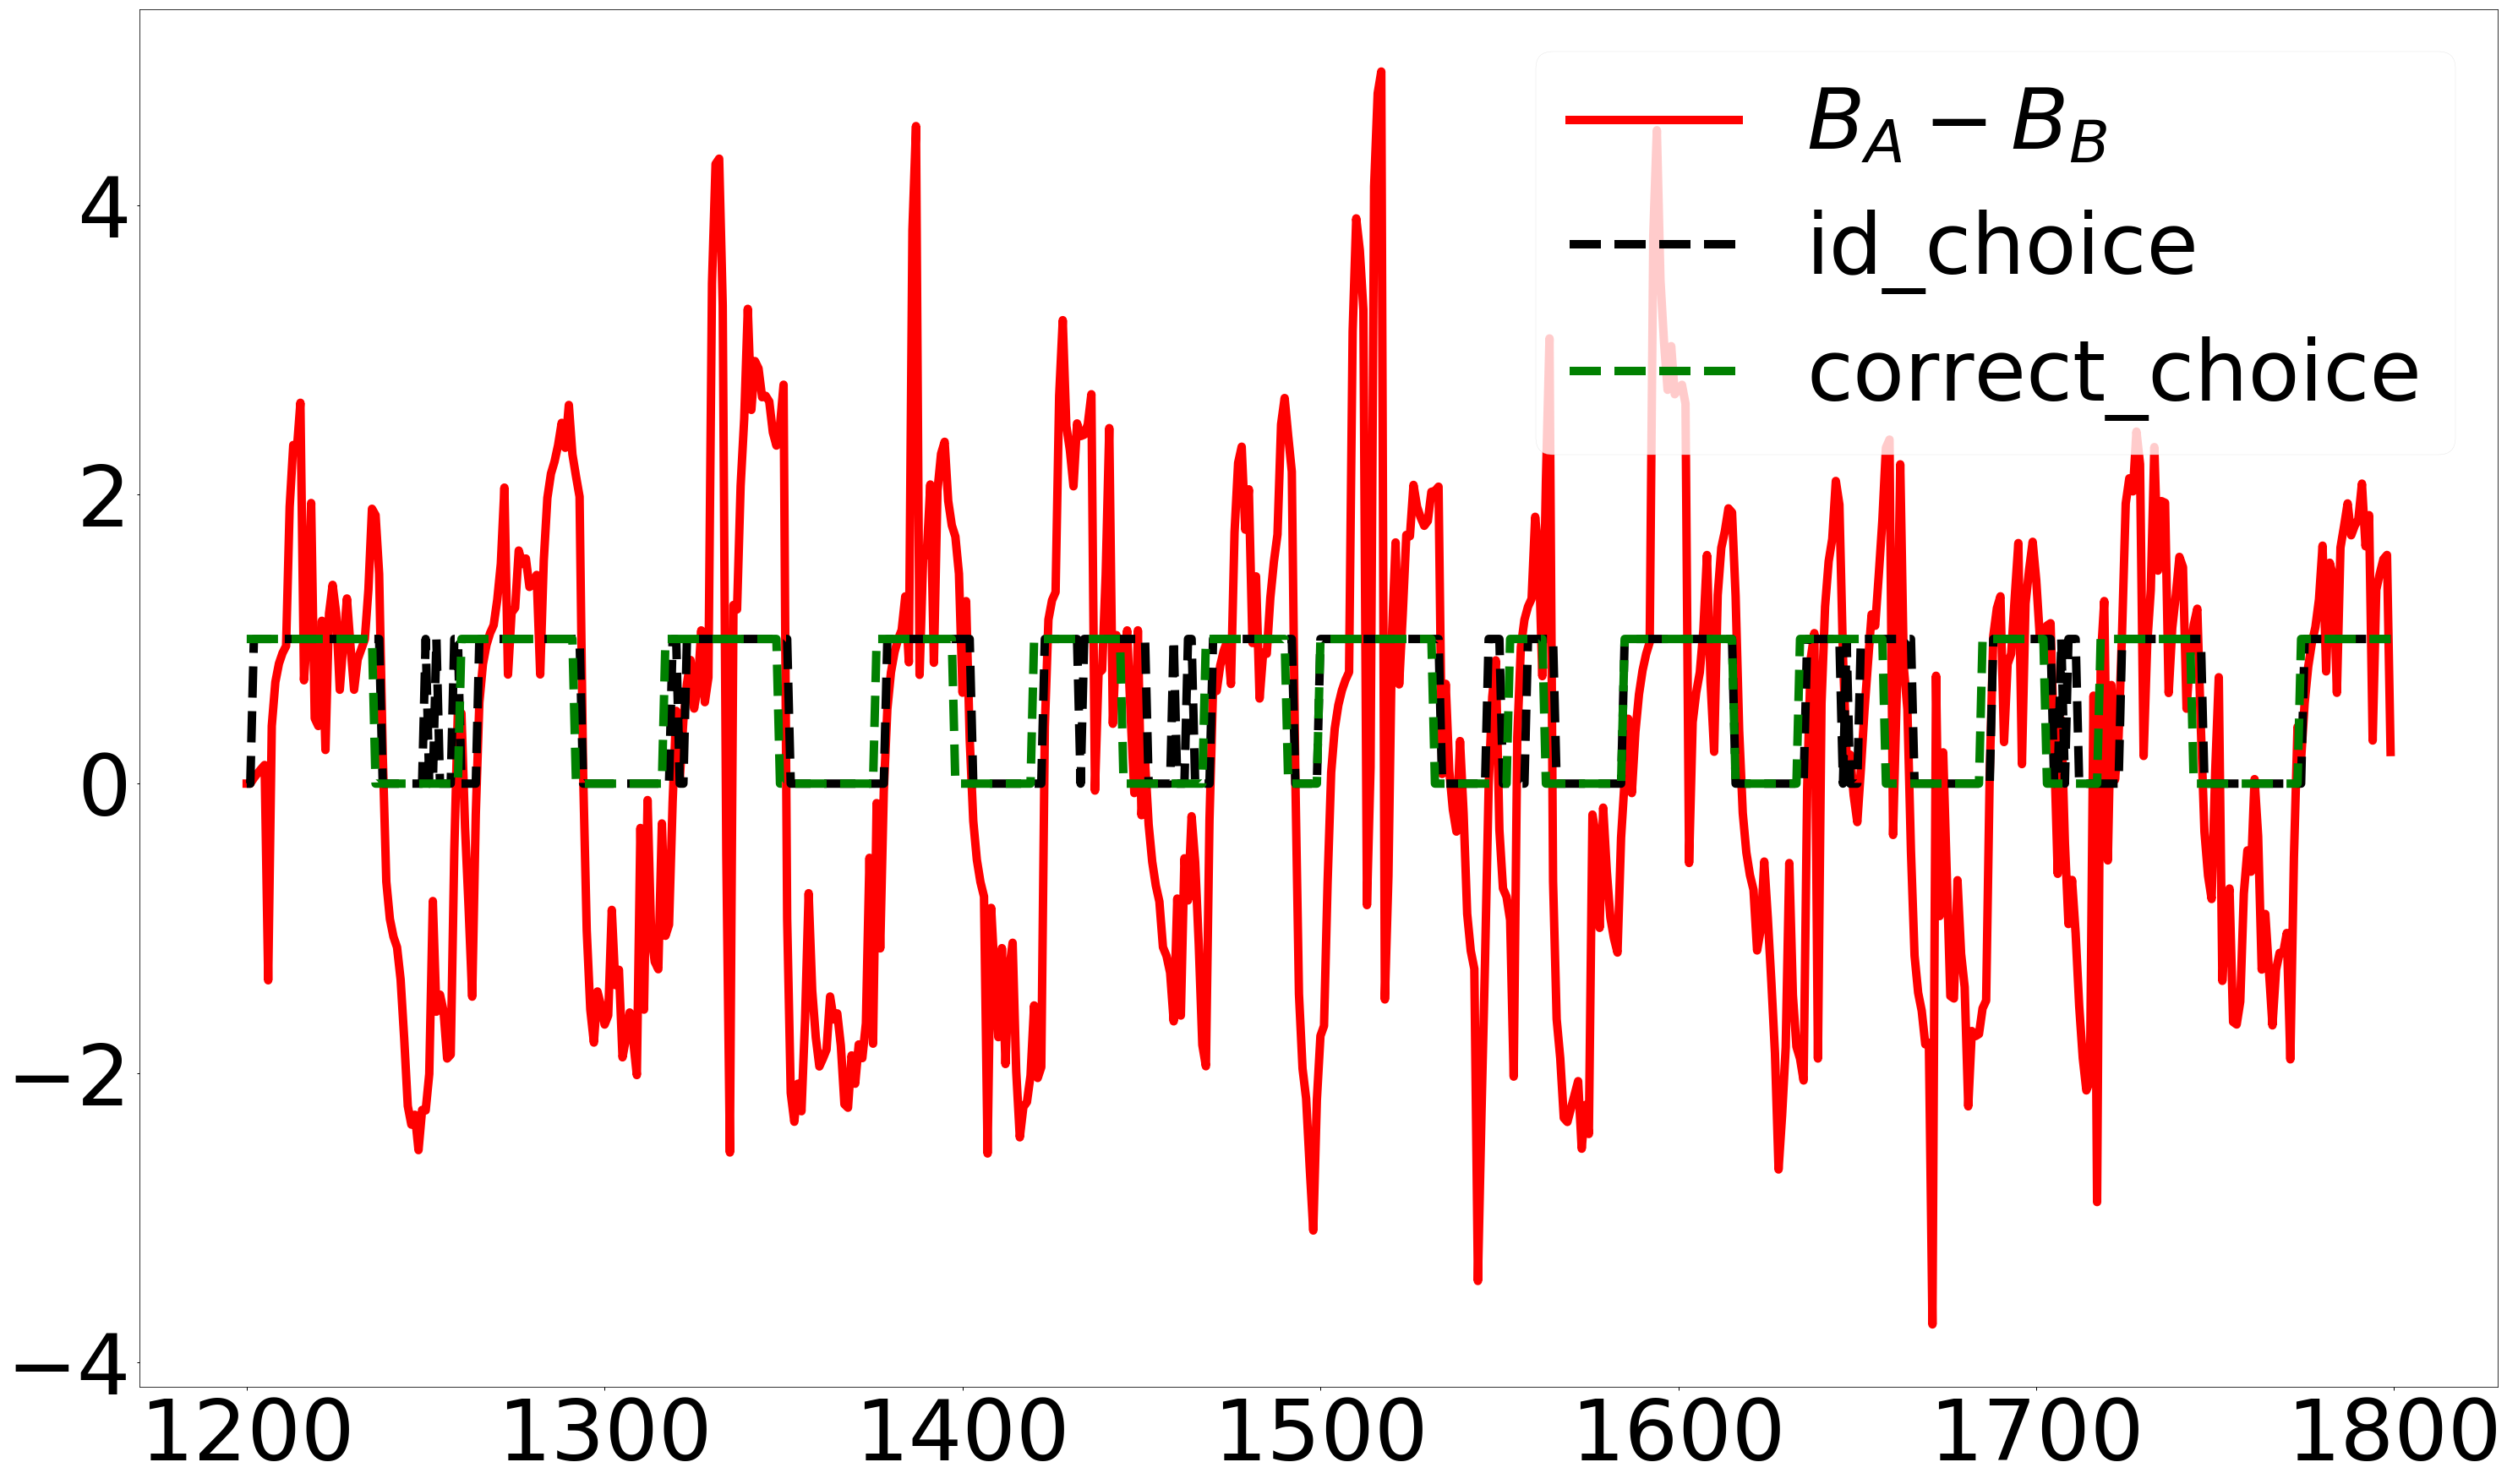

In [15]:
#use a low conflict sample to test direction
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.target_B, 'r', label='$B_{A} - B_{B}$')
plt.plot(all_obs_data_sample_lc.id_choice, 'k--', label='id_choice')
plt.plot(all_obs_data_sample_lc.p_id_solution, 'g--', label='correct_choice')
plt.legend()

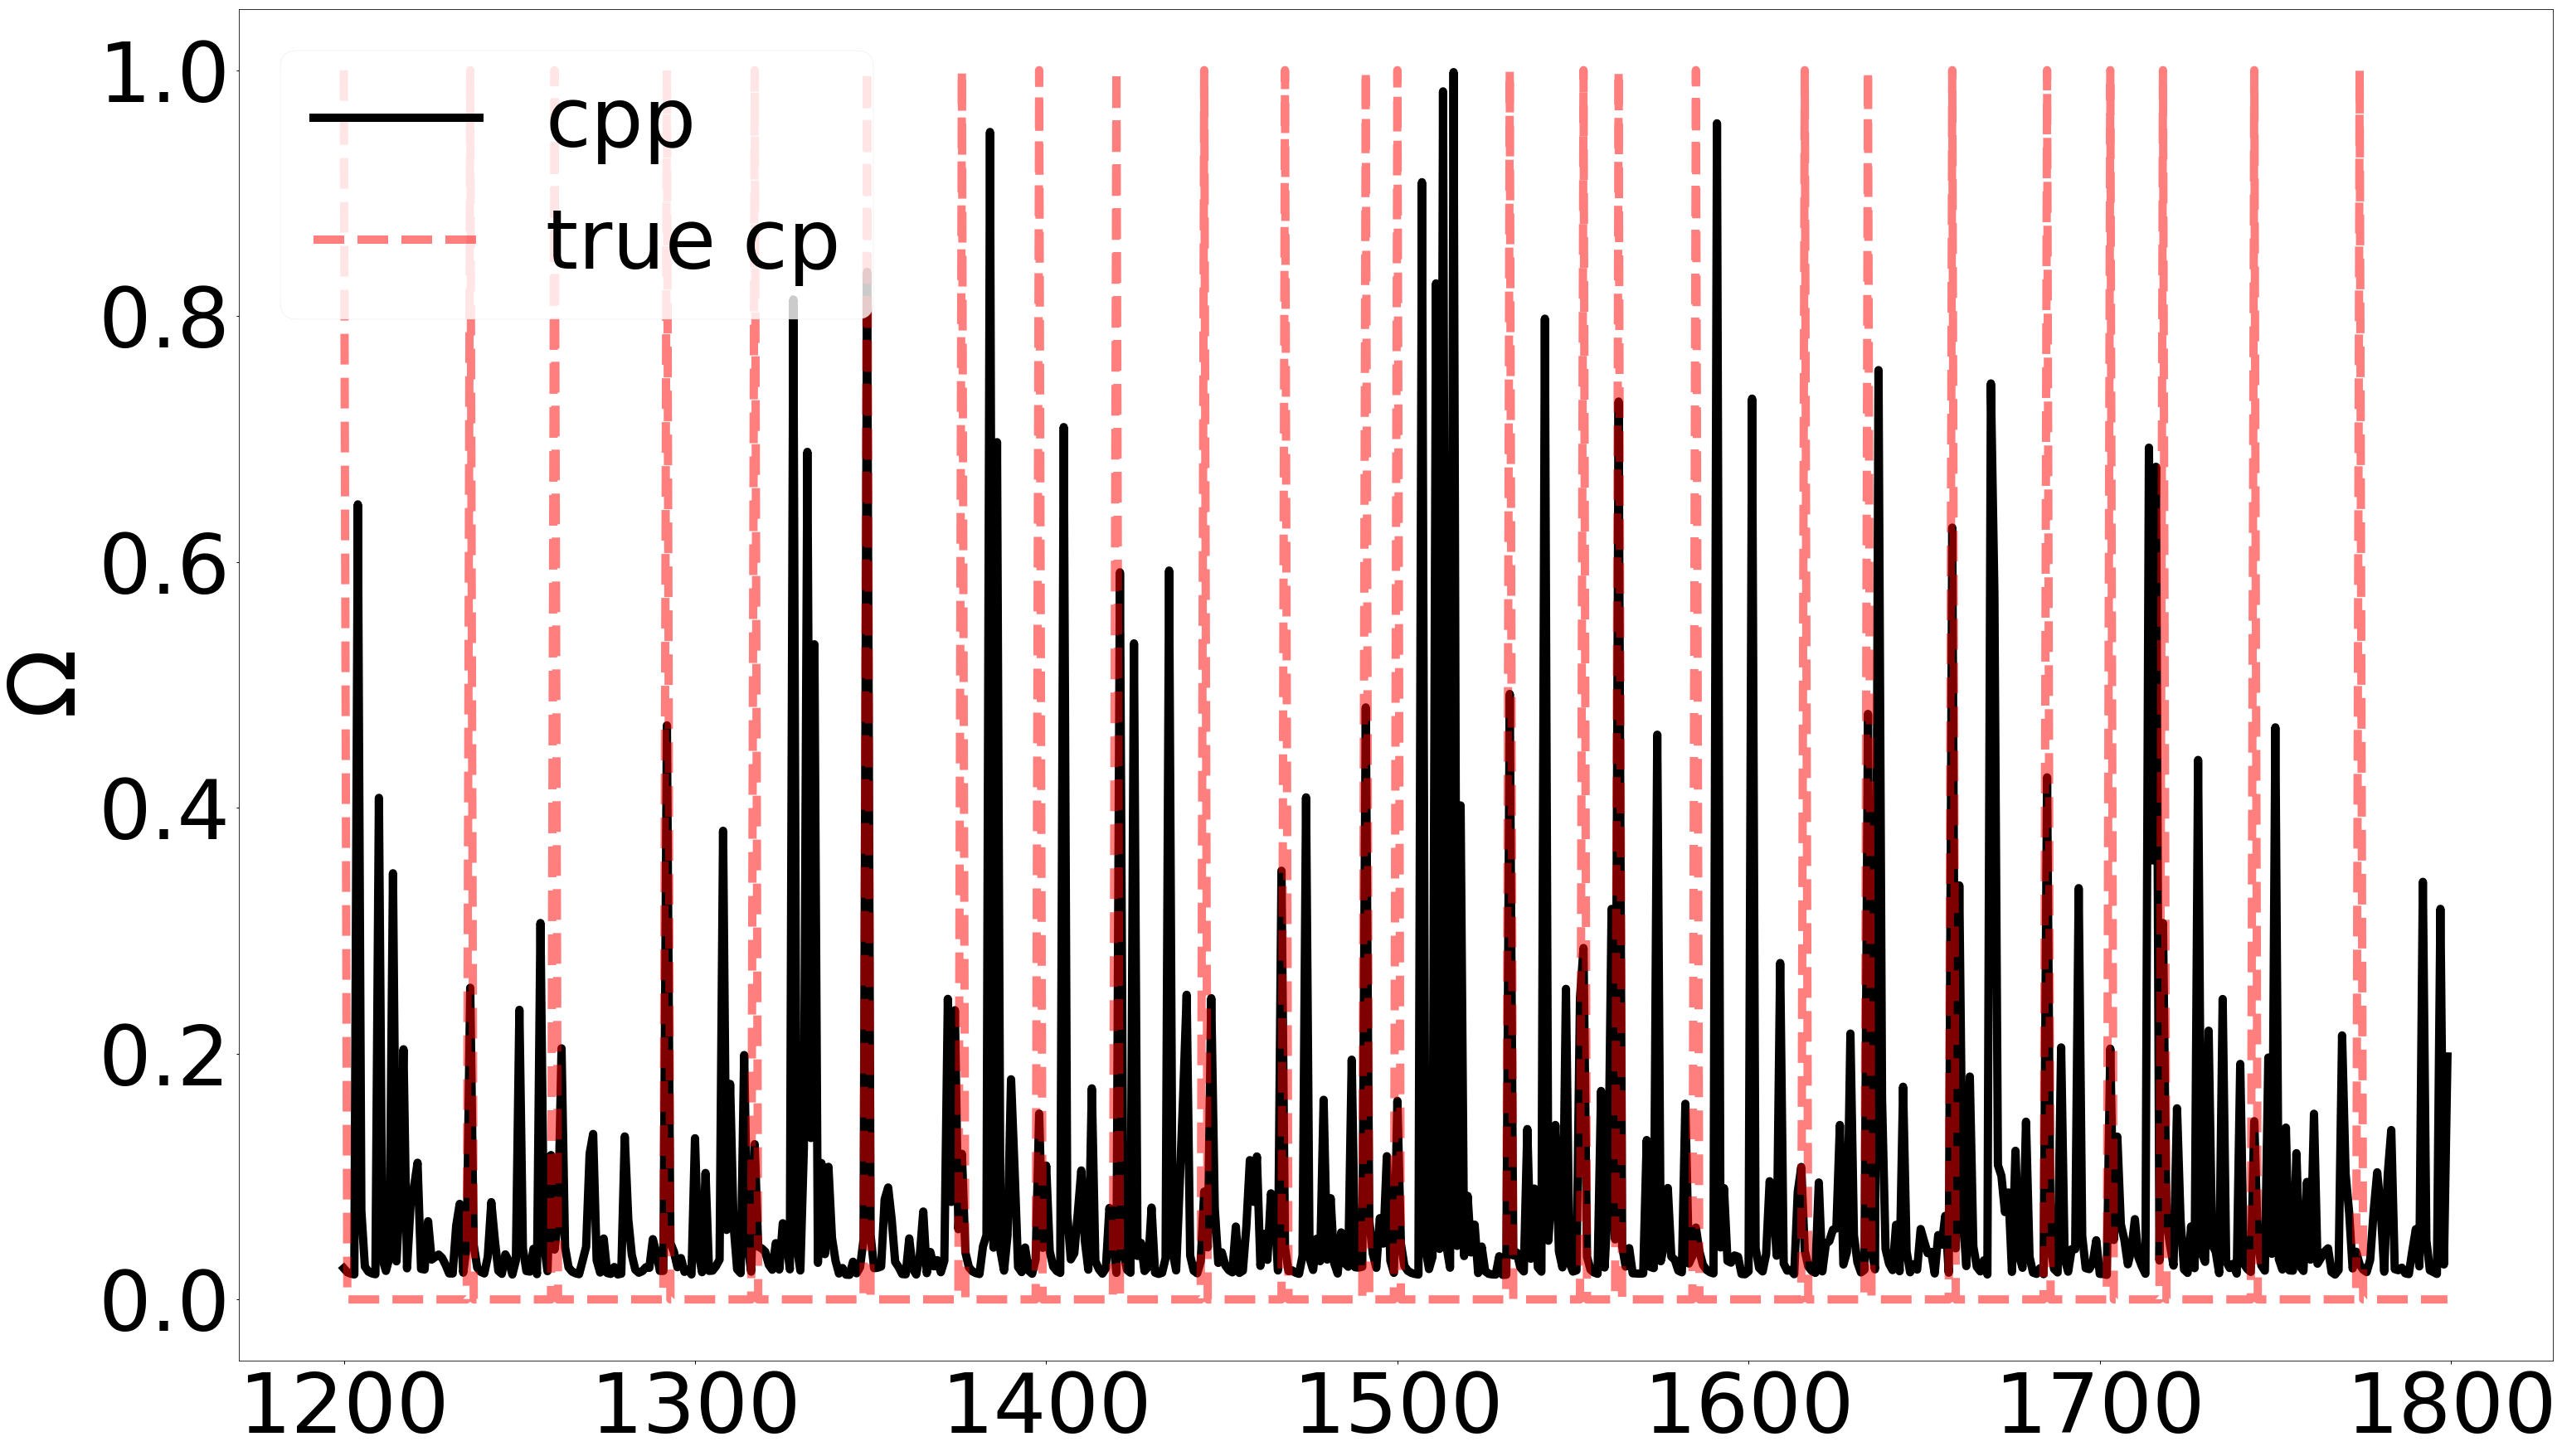

In [16]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.cpp[0:600], 'k', label='cpp')
plt.plot(all_obs_data_sample_lc.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [42]:
#use target choice as response 
#include correct target choice as stimulus 
all_obs_data = all_obs_data.rename(index=str, columns={"id_choice": "response", 
                                                       "p_id_solution": "stimulus",
                                                        "ID": "subj_idx"})
all_obs_data = all_obs_data[['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'target_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_obs_data = all_obs_data.rename(index=str, columns={'target_B': 'B'})
# all_obs_data = all_obs_data[(all_obs_data.rt<0.6)]
# all_obs_data.reset_index(drop=True, inplace=True)

In [30]:
all_obs_data.loc[all_obs_data.response == 0, 'response'] = -1
all_obs_data.loc[all_obs_data.response == 1, 'response'] = 1

In [31]:
all_obs_data.loc[all_obs_data.stimulus == 0, 'stimulus'] = -1
all_obs_data.loc[all_obs_data.stimulus == 1, 'stimulus'] = 1

In [43]:
all_obs_data['condition'] = all_obs_data['condition'].str.strip()
all_obs_data.head()

response  stimulus        rt condition  subj_idx         B       cpp
0         0         0  0.711570        hc       761  0.000000  0.099471
1         1         0  0.681410        hc       761  0.000000  0.035079
2         0         0  0.767118        hc       761 -1.241007  0.023075
3         1         0  0.507209        hc       761 -0.595781  0.019881
4         0         0  0.656259        hc       761 -0.306135  0.018539

In [217]:
def z_link_func(x, data=all_obs_data):
    stim = (np.asarray(dmatrix('0 + C(s, [[1], [-1]])',
                               {'s': data.stimulus.ix[x.index]}))
    )
    return 1 / (1 + np.exp(-(x * stim)))

In [218]:
def v_link_func(x, data=all_obs_data):
    stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
    return x * stim

In [16]:
np.unique(all_obs_data.subj_idx), np.unique(all_obs_data.condition)

(array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
        774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [16]:
#these are no longer error flipped but stimulus flipped 
# all_obs_data = hddm.utils.flip_errors(all_obs_data)

In [17]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_obs_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [18]:
all_obs_data.columns

Index(['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

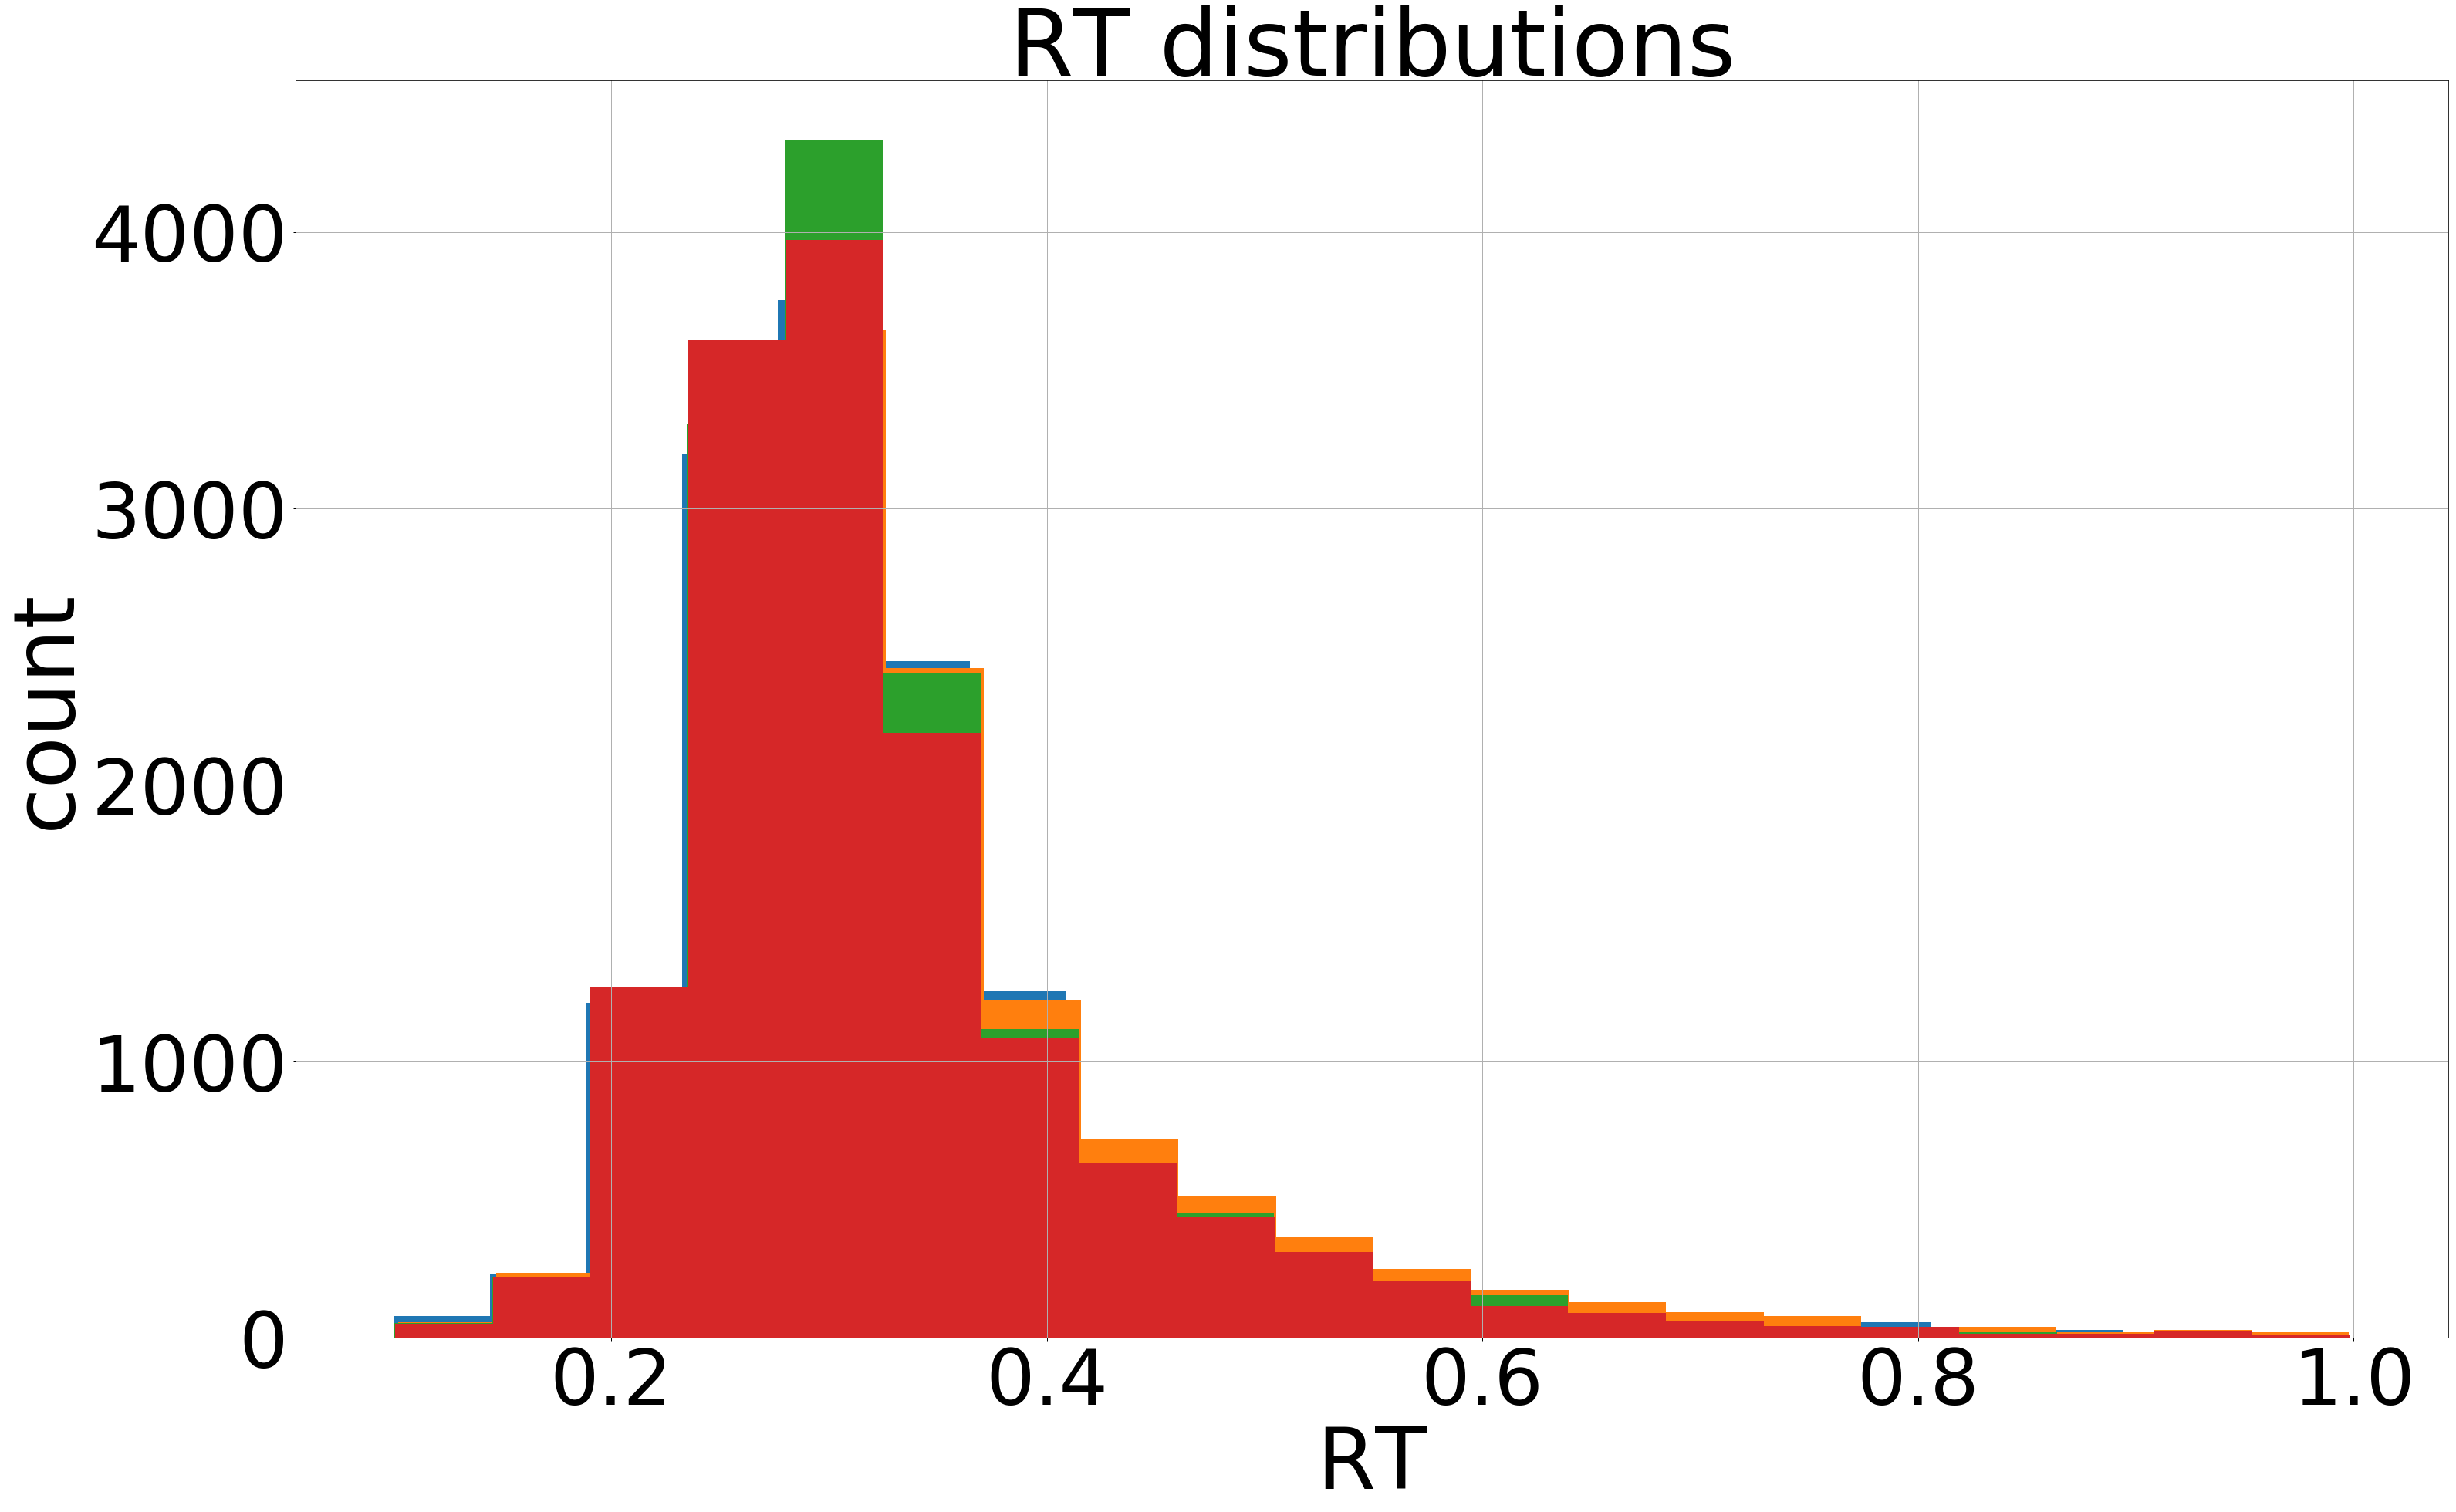

In [23]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_obs_data.groupby('condition'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [ ]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.B[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'B')

In [ ]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.response[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('stimulus selected')

In [ ]:
all_obs_data.columns

In [ ]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_obs_data.rt[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('obs. rt')

In [ ]:
plt.plot(all_obs_data.stimulus[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [44]:
n_samples, n_burned_samples = 1000,50
n_samples_test, n_burned_samples_test, n_thin_test = 10, 2, 2

In [18]:
#get all permutations of a,t,v
#hold position of learning signals constant to get all combinations 
#of learning signal and parameter pairs 
from itertools import permutations
from more_itertools import chunked

targets = ['a~', 't~', 'v~', 'z~']
signals = (('cpp:C(condition)', 'B:C(condition)'),)
param_pairs = list(permutations(targets, 2))
learning_signal_pairs = signals*(int(len(param_pairs)/len(signals)))

print(learning_signal_pairs)
print(param_pairs)

(('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'))
[('a~', 't~'), ('a~', 'v~'), ('a~', 'z~'), ('t~', 'a~'), ('t~', 'v~'), ('t~', 'z~'), ('v~', 'a~'), ('v~', 't~'), ('v~', 'z~'), ('z~', 'a~'), ('z~', 't~'), ('z~', 'v~')]


In [19]:
tuple_idx = np.repeat(list(np.arange(len(learning_signal_pairs))),2)
tuple_element_idx = [0,1]*len(learning_signal_pairs)
models = [param_pairs[t_idx][e_idx] + learning_signal_pairs[t_idx][e_idx] for t_idx,e_idx in zip(tuple_idx, tuple_element_idx)]

In [20]:
reg_descriptions = list(chunked(models,2))
print(reg_descriptions)

model_dict = {'a_cpp_t_B': reg_descriptions[0], 'a_cpp_v_B': reg_descriptions[1],
'a_cpp_z_B': reg_descriptions[2], 't_cpp_a_B': reg_descriptions[3], 
't_cpp_v_B': reg_descriptions[4], 't_cpp_z_B': reg_descriptions[5], 
              'v_cpp_a_B': reg_descriptions[6], 'v_cpp_t_B': reg_descriptions[7],
             'v_cpp_z_B': reg_descriptions[8], 'z_cpp_a_B': reg_descriptions[9],
             'z_cpp_t_B': reg_descriptions[10], 'z_cpp_v_B': reg_descriptions[11]}

[['a~cpp:C(condition)', 't~B:C(condition)'], ['a~cpp:C(condition)', 'v~B:C(condition)'], ['a~cpp:C(condition)', 'z~B:C(condition)'], ['t~cpp:C(condition)', 'a~B:C(condition)'], ['t~cpp:C(condition)', 'v~B:C(condition)'], ['t~cpp:C(condition)', 'z~B:C(condition)'], ['v~cpp:C(condition)', 'a~B:C(condition)'], ['v~cpp:C(condition)', 't~B:C(condition)'], ['v~cpp:C(condition)', 'z~B:C(condition)'], ['z~cpp:C(condition)', 'a~B:C(condition)'], ['z~cpp:C(condition)', 't~B:C(condition)'], ['z~cpp:C(condition)', 'v~B:C(condition)']]


In [21]:
print(model_dict)

{'t_cpp_z_B': ['t~cpp:C(condition)', 'z~B:C(condition)'], 'v_cpp_t_B': ['v~cpp:C(condition)', 't~B:C(condition)'], 'a_cpp_z_B': ['a~cpp:C(condition)', 'z~B:C(condition)'], 'v_cpp_a_B': ['v~cpp:C(condition)', 'a~B:C(condition)'], 'v_cpp_z_B': ['v~cpp:C(condition)', 'z~B:C(condition)'], 'z_cpp_a_B': ['z~cpp:C(condition)', 'a~B:C(condition)'], 'a_cpp_t_B': ['a~cpp:C(condition)', 't~B:C(condition)'], 'z_cpp_v_B': ['z~cpp:C(condition)', 'v~B:C(condition)'], 'z_cpp_t_B': ['z~cpp:C(condition)', 't~B:C(condition)'], 't_cpp_a_B': ['t~cpp:C(condition)', 'a~B:C(condition)'], 'a_cpp_v_B': ['a~cpp:C(condition)', 'v~B:C(condition)'], 't_cpp_v_B': ['t~cpp:C(condition)', 'v~B:C(condition)']}


In [149]:
all_obs_data

response  stimulus        rt condition  subj_idx         B       cpp
0             0         0  0.711570        hc       761  0.000000  0.099471
1             1         0  0.681410        hc       761  0.000000  0.035079
2             0         0  0.767118        hc       761 -1.241007  0.023075
3             1         0  0.507209        hc       761 -0.595781  0.019881
4             0         0  0.656259        hc       761 -0.306135  0.018539
5             0         0  0.342321        hc       761 -0.139394  0.268538
6             0         0  0.426794        hc       761 -0.027685  0.035630
7             0         0  0.405805        hc       761 -0.804363  0.785155
8             0         0  0.317552        hc       761  0.064818  0.352873
9             1         0  0.329534        hc       761 -2.800194  0.206726
10            1         0  0.290564        hc       761  0.557813  0.163406
11            1         0  0.315991        hc       761 -1.539093  0.031415
12            0         0  0.341377        hc       761  0.187173  0.021635
13            0         0  0.317222        hc       761  0.786843  0.019183
14            1         0  0.279906        hc       761  1.008944  0.018144
15            1         0  0.699611        hc       761  1.124120  0.711650
16            0         0  0.478348        hc       761  1.194938  0.034028
17            0         0  0.277434        hc       761  2.965828  0.028831
18            0         0  0.291746        hc       761  3.690923  0.028388
19            0         0  0.274538        hc       761  3.172012  0.040570
20            0         0  0.292942        hc       761  3.506483  0.096704
21            0         0  0.270694        hc       761  3.031111  0.020287
22            0         0  0.271729        hc       761  2.224758  0.287192
23            1         0  0.327779        hc       761  2.351781  0.037870
24            1         0  0.261133        hc       761  0.684555  0.725087
25            1         0  0.244197        hc       761 -0.246377  0.035383
26            0         0  0.365281        hc       761  2.575899  0.140550
27            0         0  0.247020        hc       761  3.392825  0.021663
28            0         0  0.242097        hc       761  1.940882  0.020844
29            1         0  0.222817        hc       761  2.107824  0.163824
...         ...       ...       ...       ...       ...       ...       ...
57570         1         0  0.293906        lv       784  0.397122  0.013578
57571         0         0  0.249333        lv       784  1.738554  0.195383
57572         0         0  0.289754        lv       784  1.609778  0.026981
57573         1         0  0.292151        lv       784  0.272808  0.014927
57574         0         0  0.238237        lv       784 -0.608335  0.012951
57575         0         0  0.275947        lv       784 -0.888134  0.033485
57576         0         0  0.314683        lv       784 -0.740138  0.036577
57577         0         0  0.460102        lv       784 -0.330740  0.047295
57578         0         0  0.250502        lv       784 -0.771821  0.085272
57579         1         0  0.397201        lv       784 -1.301535  0.027291
57580         0         0  0.278286        lv       784 -0.462491  0.742190
57581         1         0  0.386327        lv       784  0.149687  0.022224
57582         1         0  0.188753        lv       784 -2.784102  0.013593
57583         0         0  0.214152        lv       784 -1.944775  0.299892
57584         1         0  0.219949        lv       784 -1.780210  0.016196
57585         0         0  0.308956        lv       784 -0.133136  0.017061
57586         1         0  0.728980        lv       784 -0.322766  0.058385
57587         1         0  0.268126        lv       784 -0.708800  0.024357
57588         1         0  0.538476        lv       784 -0.004338  0.193394
57589         1         0  0.435572        lv       784  0.474080  0.014579
57590         1         0  0.504301        lv       784

In [24]:
a_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['a_cpp_t_B'], bias=True, group_only_regressors=True)
# a_cpp_t_B_obs_reg.find_starting_values()
a_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='a_cpp_t_B_obs_reg.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(condition)[hc]', 't_B:C(condition)[hv]', 't_B:C(condition)[lc]', 't_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 9241.5 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [25]:
a_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['a_cpp_v_B'], bias=True, group_only_regressors=True )
# a_cpp_v_B_obs_reg.find_starting_values()
a_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='a_cpp_v_B_obs_reg.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 7298.3 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [26]:
t_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['t_cpp_a_B'], bias=True, group_only_regressors=True )
# t_cpp_a_B_obs_reg.find_starting_values()
t_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_a_B_obs_reg.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 8510.1 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [27]:
t_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=True )
# t_cpp_v_B_obs_reg.find_starting_values()
t_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 8128.0 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [28]:
v_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['v_cpp_a_B'], bias=True, group_only_regressors=True )
# v_cpp_a_B_obs_reg.find_starting_values()
v_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='v_cpp_a_B_obs_reg.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(condition)[hc]', 'v_cpp:C(condition)[hv]', 'v_cpp:C(condition)[lc]', 'v_cpp:C(condition)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 11720.5 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [29]:
v_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['v_cpp_t_B'], bias=True, group_only_regressors=True )
# v_cpp_t_B_obs_reg.find_starting_values()
v_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='v_cpp_t_B_obs_reg.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(condition)[hc]', 'v_cpp:C(condition)[hv]', 'v_cpp:C(condition)[lc]', 'v_cpp:C(condition)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(condition)[hc]', 't_B:C(condition)[hv]', 't_B:C(condition)[lc]', 't_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 11827.0 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


# All $z$ models 

In [22]:
z_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data, model_dict['z_cpp_a_B'], 
                                      bias=True, group_only_regressors=True)
# z_cpp_a_B_obs_reg.find_starting_values()
z_cpp_a_B_obs_reg.sample(n_samples, burn=n_burned_samples,   dbname='z_cpp_a_B_obs_reg.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(condition)[hc]', 'z_cpp:C(condition)[hv]', 'z_cpp:C(condition)[lc]', 'z_cpp:C(condition)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 7480.3 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [23]:
z_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['z_cpp_v_B'], bias=True, group_only_regressors=True)
# z_cpp_v_B_obs_reg.find_starting_values()
z_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='z_cpp_v_B_obs_reg.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(condition)[hc]', 'z_cpp:C(condition)[hv]', 'z_cpp:C(condition)[lc]', 'z_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 10224.8 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [24]:
z_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,  model_dict['z_cpp_t_B'], bias=True,
                                    group_only_regressors=True)
# z_cpp_t_B_obs_reg.find_starting_values()
z_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='z_cpp_t_B_obs_reg.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(condition)[hc]', 'z_cpp:C(condition)[hv]', 'z_cpp:C(condition)[lc]', 'z_cpp:C(condition)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(condition)[hc]', 't_B:C(condition)[hv]', 't_B:C(condition)[lc]', 't_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 13853.2 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [25]:
a_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data, model_dict['a_cpp_z_B'], bias=True,
                                      group_only_regressors=True)
# a_cpp_z_B_obs_reg.find_starting_values()
a_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='a_cpp_z_B_obs_reg.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]']
Adding these covariates:
['z_Intercept', 'z_B:C(condition)[hc]', 'z_B:C(condition)[hv]', 'z_B:C(condition)[lc]', 'z_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 7642.1 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [26]:
v_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data, model_dict['v_cpp_z_B'], bias=True, 
                                      group_only_regressors=True)
# v_cpp_z_B_obs_reg.find_starting_values()
v_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='v_cpp_z_B_obs_reg.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(condition)[hc]', 'v_cpp:C(condition)[hv]', 'v_cpp:C(condition)[lc]', 'v_cpp:C(condition)[lv]']
Adding these covariates:
['z_Intercept', 'z_B:C(condition)[hc]', 'z_B:C(condition)[hv]', 'z_B:C(condition)[lc]', 'z_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 10014.8 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [27]:
t_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data, model_dict['t_cpp_z_B'], bias=True,
                                      group_only_regressors=True)
# t_cpp_z_B_obs_reg.find_starting_values()
t_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_z_B_obs_reg.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['z_Intercept', 'z_B:C(condition)[hc]', 'z_B:C(condition)[hv]', 'z_B:C(condition)[lc]', 'z_B:C(condition)[lv]']


/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 9030.4 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


## Flat Model (Intercept-only)

In [ ]:
#intercept only model 
# intercept_model='a~C(condition)'#average for each group 
intercept_model=['a~1', 't~1'] #true intercept only; "flat" 
flat_reg = hddm.HDDMRegressor(all_obs_data,intercept_model, bias=True, group_only_regressors=True)
# flat_reg.find_starting_values()
flat_reg.sample(n_samples,burn=n_burned_samples, dbname='flat_reg.db', db='pickle')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['t_Intercept']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-------------    35%                  ] 351 of 1000 complete in 786.7 sec

In [5]:
flat_reg=hddm.load(write_dir+'flat_reg')

In [6]:
a_cpp_t_B_obs_reg=hddm.load(write_dir+'a_cpp_t_B_obs_reg')
a_cpp_v_B_obs_reg=hddm.load(write_dir+'a_cpp_v_B_obs_reg')
t_cpp_a_B_obs_reg=hddm.load(write_dir+'t_cpp_a_B_obs_reg')

t_cpp_v_B_obs_reg=hddm.load(write_dir+'t_cpp_v_B_obs_reg')
v_cpp_a_B_obs_reg=hddm.load(write_dir+'v_cpp_a_B_obs_reg')
v_cpp_t_B_obs_reg=hddm.load(write_dir+'v_cpp_t_B_obs_reg')

In [7]:
z_cpp_a_B_obs_reg=hddm.load(write_dir+'z_cpp_a_B_obs_reg')
z_cpp_v_B_obs_reg=hddm.load(write_dir+'z_cpp_v_B_obs_reg')
z_cpp_t_B_obs_reg=hddm.load(write_dir+'z_cpp_t_B_obs_reg')

a_cpp_z_B_obs_reg=hddm.load(write_dir+'a_cpp_z_B_obs_reg')
v_cpp_z_B_obs_reg=hddm.load(write_dir+'v_cpp_z_B_obs_reg')
t_cpp_z_B_obs_reg=hddm.load(write_dir+'t_cpp_z_B_obs_reg')

In [86]:
#send text when the script is done
from twilio.rest import Client
accountSid = 'AC2832bdf83bb5a2f150686d323b7a3440'
authToken = '70363f4f104ac88b8aefc6b7886fb989'
twilioClient = Client(accountSid, authToken)
myTwilioNumber = 6095422252
destCellPhone = 6094242780
myMessage = twilioClient.messages.create(body = "regressions are done for observed data. group only regressors.",
                                         from_=myTwilioNumber, to=destCellPhone)

ImportError: No module named 'twilio'

# Save models 

In [89]:
t_cpp_v_B_obs_reg.print_stats()

                                        mean          std        2.5q          25q          50q         75q       97.5q       mc err
a                                   0.997778    0.0197504    0.961967     0.984134     0.995444     1.01165     1.03961    0.0019272
a_std                              0.0897787    0.0152248   0.0671694    0.0794254    0.0884172   0.0983906    0.125514   0.00136238
a_subj.761                          0.882028   0.00914858    0.865468     0.875619     0.881418    0.888531    0.901113  0.000919693
a_subj.762                          0.946593   0.00870639    0.931228     0.940314     0.946946    0.952061    0.964928  0.000831304
a_subj.763                           1.04405   0.00966418      1.0262      1.03818      1.04496     1.04964     1.06912  0.000964484
a_subj.764                           1.01356    0.0103089    0.996795      1.00731      1.01374     1.01959     1.03518  0.000945943
a_subj.765                           1.10965    0.0105623     1.08938

In [57]:
#save models... many many samples, much time
a_cpp_t_B_obs_reg.save(write_dir+'a_cpp_t_B_obs_reg')
a_cpp_v_B_obs_reg.save(write_dir+'a_cpp_v_B_obs_reg')
t_cpp_a_B_obs_reg.save(write_dir+'t_cpp_a_B_obs_reg')

t_cpp_v_B_obs_reg.save(write_dir+'t_cpp_v_B_obs_reg')
v_cpp_a_B_obs_reg.save(write_dir+'v_cpp_a_B_obs_reg')
v_cpp_t_B_obs_reg.save(write_dir+'v_cpp_t_B_obs_reg')

# #save z models 
z_cpp_a_B_obs_reg.save(write_dir+'z_cpp_a_B_obs_reg')
z_cpp_v_B_obs_reg.save(write_dir+'z_cpp_v_B_obs_reg')
z_cpp_t_B_obs_reg.save(write_dir+'z_cpp_t_B_obs_reg')

a_cpp_z_B_obs_reg.save(write_dir+'a_cpp_z_B_obs_reg')
v_cpp_z_B_obs_reg.save(write_dir+'v_cpp_z_B_obs_reg')
t_cpp_z_B_obs_reg.save(write_dir+'t_cpp_z_B_obs_reg')

In [8]:
write_dir = '/Users/Krista/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

In [14]:
t_cpp_v_B_obs_reg=hddm.load(write_dir+'t_cpp_v_B_obs_reg')

# Plot model fits

In [42]:
z_cpp_a_B_obs_reg.dic, z_cpp_v_B_obs_reg.dic, z_cpp_t_B_obs_reg.dic, a_cpp_z_B_obs_reg.dic, v_cpp_z_B_obs_reg.dic,t_cpp_z_B_obs_reg.dic

(-8683.8057478038263,
 -10012.337095909343,
 -8942.6842590411507,
 -8807.859409249837,
 -8800.5888922281592,
 -9484.2672690790296)

In [32]:
dic = [a_cpp_t_B_obs_reg.dic, a_cpp_v_B_obs_reg.dic,t_cpp_a_B_obs_reg.dic,
        t_cpp_v_B_obs_reg.dic, v_cpp_a_B_obs_reg.dic, v_cpp_t_B_obs_reg.dic]

In [68]:
dics = [a_cpp_t_B_obs_reg.dic, a_cpp_v_B_obs_reg.dic,t_cpp_a_B_obs_reg.dic,
        t_cpp_v_B_obs_reg.dic, v_cpp_a_B_obs_reg.dic, v_cpp_t_B_obs_reg.dic, 
       z_cpp_a_B_obs_reg.dic, z_cpp_v_B_obs_reg.dic, z_cpp_t_B_obs_reg.dic, 
        a_cpp_z_B_obs_reg.dic, v_cpp_z_B_obs_reg.dic,t_cpp_z_B_obs_reg.dic, flat_reg.dic]
m_names = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
            't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B', 
              'z_cpp & a_B', 'z_cpp & v_B', 'z_cpp & t_B',
              'a_cpp & z_B', 'v_cpp & z_B', 't_cpp & z_B', 'flat_reg']

In [133]:
dics_subtracted_best = dics - dics[winner]

In [134]:
dics_subtracted_best

array([ 1735.76086361,   664.78776053,  1322.39334481,     0.        ,
        2003.81263219,  1744.70347367,  2000.94001655,   672.40866844,
        1742.06150531,  1876.8863551 ,  1884.15687212,  1200.47849527,
        1989.83813429])

In [69]:
dics_subtracted = dics - dics[-1]

In [70]:
winner = np.where(dics_subtracted == min(dics_subtracted))[0]
m_names[winner]

't_cpp & v_B'

In [111]:
x = pd.DataFrame(data=np.round(dics,2))
x = x.transpose()
x.columns = m_names

In [131]:
dics_sub_df = pd.DataFrame(data=np.round(dics_subtracted,2))
dics_sub_df=dics_sub_df.transpose()
dics_sub_df.columns = m_names

In [136]:
dics_sub_best_df = pd.DataFrame(data=np.round(dics_subtracted_best,2))
dics_sub_best_df=dics_sub_best_df.transpose()
dics_sub_best_df.columns = m_names

In [138]:
# dics_sub_best_df

In [166]:
dics_sub_best_df['v_cpp & a_B']

0    2003.81
Name: v_cpp & a_B, dtype: float64

In [80]:
dics_subtracted.transpose()
dics_subtracted.shape

(13,)

In [73]:
# pd.DataFrame(data=dics_subtracted,  columns=m_names, )
# dics_subtracted = pd.DataFrame(pd.Series(dics_subtracted),columns= m_names)

In [67]:
dics_subtracted

a_cpp & t_B  a_cpp & v_B  t_cpp & a_B  t_cpp & v_B  v_cpp & a_B  \
a_cpp & t_B          NaN          NaN          NaN          NaN          NaN   
a_cpp & v_B          NaN          NaN          NaN          NaN          NaN   
t_cpp & a_B          NaN          NaN          NaN          NaN          NaN   
t_cpp & v_B          NaN          NaN          NaN          NaN          NaN   
v_cpp & a_B          NaN          NaN          NaN          NaN          NaN   
v_cpp & t_B          NaN          NaN          NaN          NaN          NaN   
z_cpp & a_B          NaN          NaN          NaN          NaN          NaN   
z_cpp & v_B          NaN          NaN          NaN          NaN          NaN   
z_cpp & t_B          NaN          NaN          NaN          NaN          NaN   
a_cpp & z_B          NaN          NaN          NaN          NaN          NaN   
v_cpp & z_B          NaN          NaN          NaN          NaN          NaN   
t_cpp & z_B          NaN          NaN          NaN          NaN          NaN   
flat_reg             NaN          NaN          NaN          NaN          NaN   

             v_cpp & t_B  z_cpp & a_B  z_cpp & v_B  z_cpp & t_B  a_cpp & z_B  \
a_cpp & t_B          NaN          NaN          NaN          NaN          NaN   
a_cpp & v_B          NaN          NaN          NaN          NaN          NaN   
t_cpp & a_B          NaN          NaN          NaN          NaN          NaN   
t_cpp & v_B          NaN          NaN          NaN          NaN          NaN   
v_cpp & a_B          NaN          NaN          NaN          NaN          NaN   
v_cpp & t_B          NaN          NaN          NaN          NaN          NaN   
z_cpp & a_B          NaN          NaN          NaN          NaN          NaN   
z_cpp & v_B          NaN          NaN          NaN          NaN          NaN   
z_cpp & t_B          NaN          NaN          NaN          NaN          NaN   
a_cpp & z_B          NaN          NaN          NaN          NaN          NaN   
v_cpp & z_B          NaN          NaN          NaN          NaN          NaN   
t_cpp & z_B          NaN          NaN          NaN          NaN          NaN   
flat_reg             NaN          NaN          NaN          NaN          NaN   

             v_cpp & z_B  t_cpp & z_B  flat_reg  
a_cpp & t_B          NaN          NaN       NaN  
a_cpp & v_B          NaN          NaN       NaN  
t_cpp & a_B          NaN          NaN       NaN  
t_cpp & v_B          NaN          NaN       NaN  
v_cpp & a_B          NaN          NaN       NaN  
v_cpp & t_B          NaN          NaN       NaN  
z_cpp & a_B          NaN          NaN       NaN  
z_cpp & v_B          NaN          NaN       NaN  
z_cpp & t_B          NaN          NaN       NaN  
a_cpp & z_B          NaN          NaN       NaN  
v_cpp & z_B          NaN          NaN       NaN  
t_cpp & z_B          NaN          NaN       NaN  
flat_reg             NaN          NaN       NaN

In [62]:
dics_subtracted[0]

'flat_reg'

In [25]:
pd.DataFrame(data=dics_subtracted,
...                    columns=m_names)

ValueError: Shape of passed values is (1, 13), indices imply (13, 13)

In [13]:
winner

array([3])

In [40]:
abs(dics_subtracted[winner] - dics_subtracted)

array([ 1735.76086361,   664.78776053,  1322.39334481,     0.        ,
        2003.81263219,  1744.70347367,  2000.94001655,   672.40866844,
        1742.06150531,  1876.8863551 ,  1884.15687212,  1200.47849527,
        1989.83813429])

In [20]:
m_names

['a_cpp & t_B',
 'a_cpp & v_B',
 't_cpp & a_B',
 't_cpp & v_B',
 'v_cpp & a_B',
 'v_cpp & t_B',
 'z_cpp & a_B',
 'z_cpp & v_B',
 'z_cpp & t_B',
 'a_cpp & z_B',
 'v_cpp & z_B',
 't_cpp & z_B',
 'flat_reg']

In [124]:
m_names[11]

't_cpp & z_B'

In [125]:
dics[11]

-9484.2672690790278

In [28]:
dics_subtracted


array([ -254.07727068, -1325.05037376,  -667.44478949, -1989.83813429,
          13.97449789,  -245.13466062,    11.10188226, -1317.42946585,
        -247.77662898,  -112.95177919,  -105.68126217,  -789.35963902,
           0.        ])

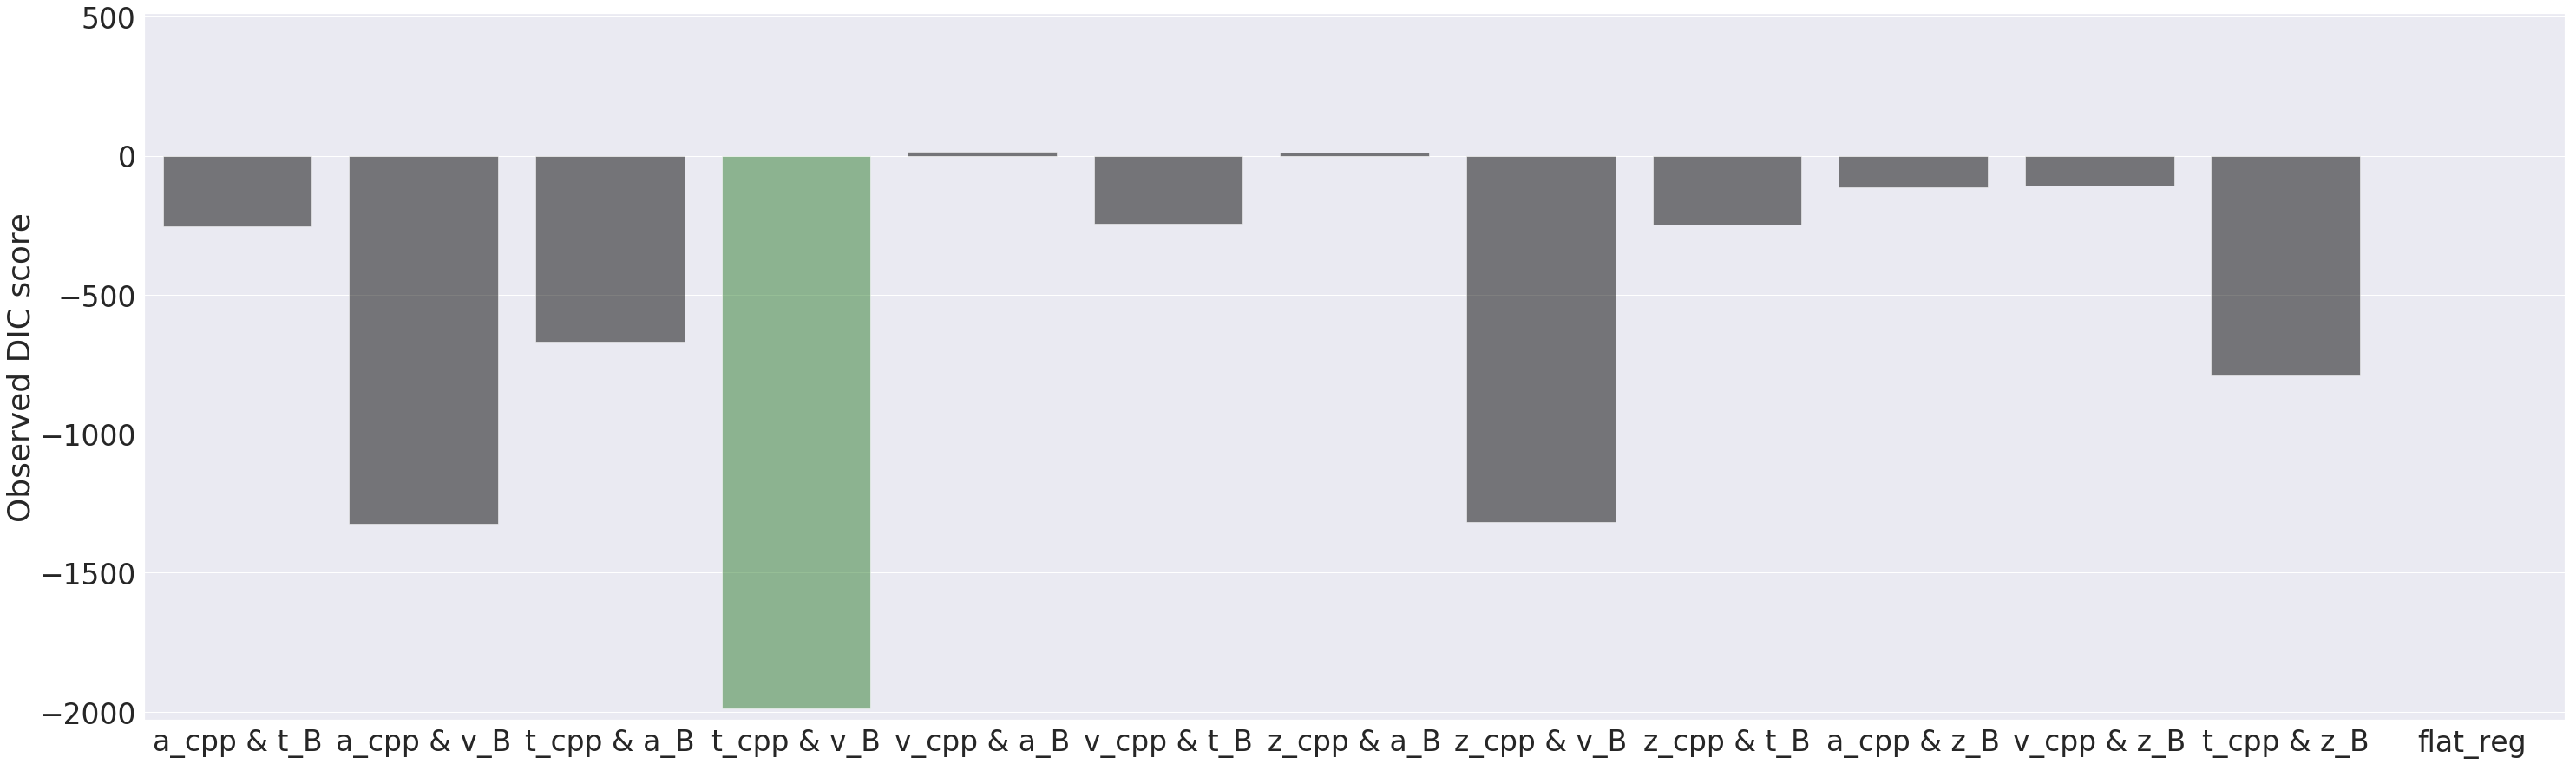

In [27]:
plt.figure(figsize=(50,15))
sns.set(font_scale=3)  

clrs = ["black" if (dic > min(dics_subtracted)) else 'forestgreen' for dic in dics_subtracted]
sns.barplot(m_names, dics_subtracted, color='black', alpha=0.5, palette=clrs)
plt.ylim(min(dics_subtracted) - 40, max(dics_subtracted) + 500)
plt.ylabel('Observed DIC score')
# plt.title('All pairwise parameters and learning signals')
plt.savefig('observed_reg_dics.png', dpi=600)

# Plot posteriors of regression coefficients

In [ ]:
v_cpp_t_B_obs_reg

In [41]:
#plot posteriors for winning model 
v_hc , v_hv ,  v_lc , v_lv  = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc , t_hv , t_lc , t_lv  = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [64]:
# #plot posteriors for gen model 
# v_hc_gen , v_hv ,  v_lc_gen , v_lv_gen  = a_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
#                                                              'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
#                                                           'node']


# a_hc_gen , a_hv_gen , a_lc_gen , a_lv_gen  = a_cpp_v_B_obs_reg.nodes_db.ix[['a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 
#                                                              'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]'],
#                                                           'node']

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [67]:
##generative model
# hddm.analyze.plot_posterior_nodes([v_lc_gen , v_hc_gen  ])
# plt.xlabel('drift-rate regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of belief-> drift-rate effect')
# # plt.savefig('600a_drifa_conflict.pdf')

# hddm.analyze.plot_posterior_nodes([v_lv_gen  , v_hv_gen  ])
# plt.xlabel('drift-rate regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of belief-> drift-rate effect')
# # plt.savefig('600a_drifa_vol.pdf')

# hddm.analyze.plot_posterior_nodes([a_lc_gen  , a_hc_gen  ])
# plt.xlabel('non-decision time regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of cpp-> threshold effect')
# # plt.savefig('600a_bound_conflict.pdf')


# hddm.analyze.plot_posterior_nodes([a_lv_gen  , a_hv_gen  ])
# plt.xlabel('decision threshold regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of cpp-> threshold effect')
# # plt.savefig('600a_bound_vol.pdf')

Text(0.5,1,'Posteriors of cpp-> non-decision time effect')

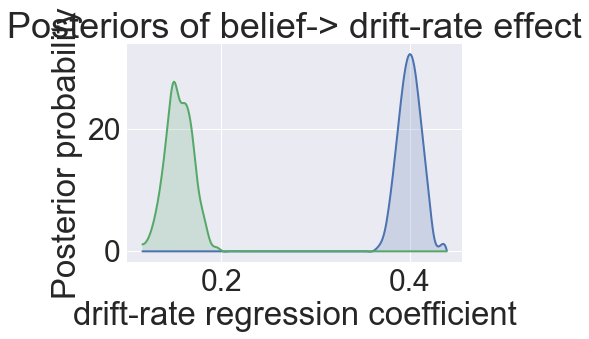

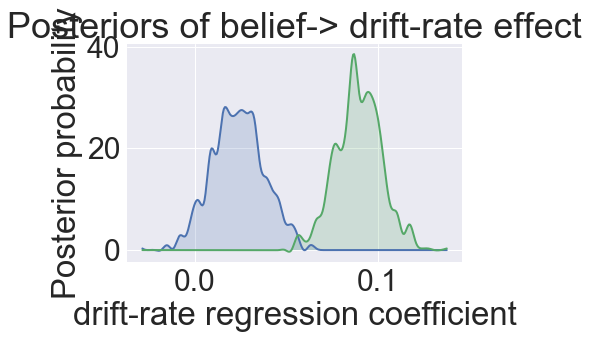

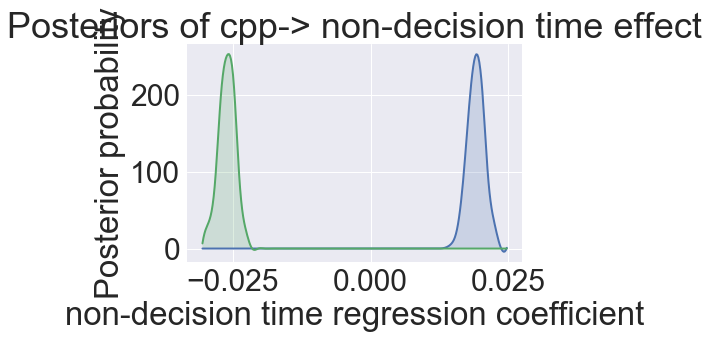

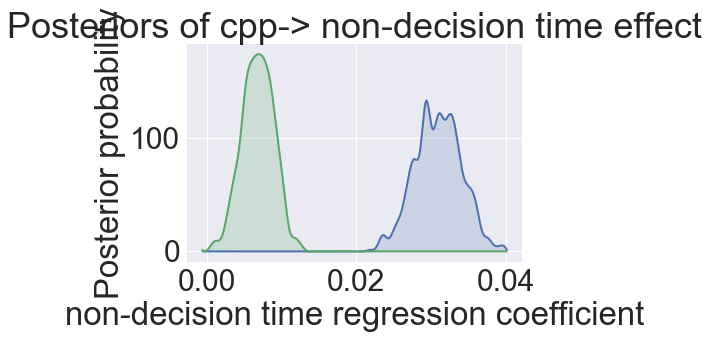

In [50]:
hddm.analyze.plot_posterior_nodes([v_lc , v_hc ])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv , v_hv ])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([t_lc , t_hc ])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([t_lv , t_hv ])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_vol.pdf')

In [ ]:
(v_hv.trace() > v_lv.trace() ).mean()

In [45]:
#are betas non-zero?
print((v_hv.trace() > 0).mean(), (v_lv.trace() > 0).mean(),
      (v_hc.trace() > 0).mean(), (v_lc.trace() > 0).mean())

1.0 0.962105263158 1.0 1.0


In [47]:
print((t_hv.trace() > 0).mean(), (t_lv.trace() > 0).mean(), (t_hc.trace() > 0).mean(), (t_lc.trace() > 0).mean())

0.998947368421 1.0 0.0 1.0


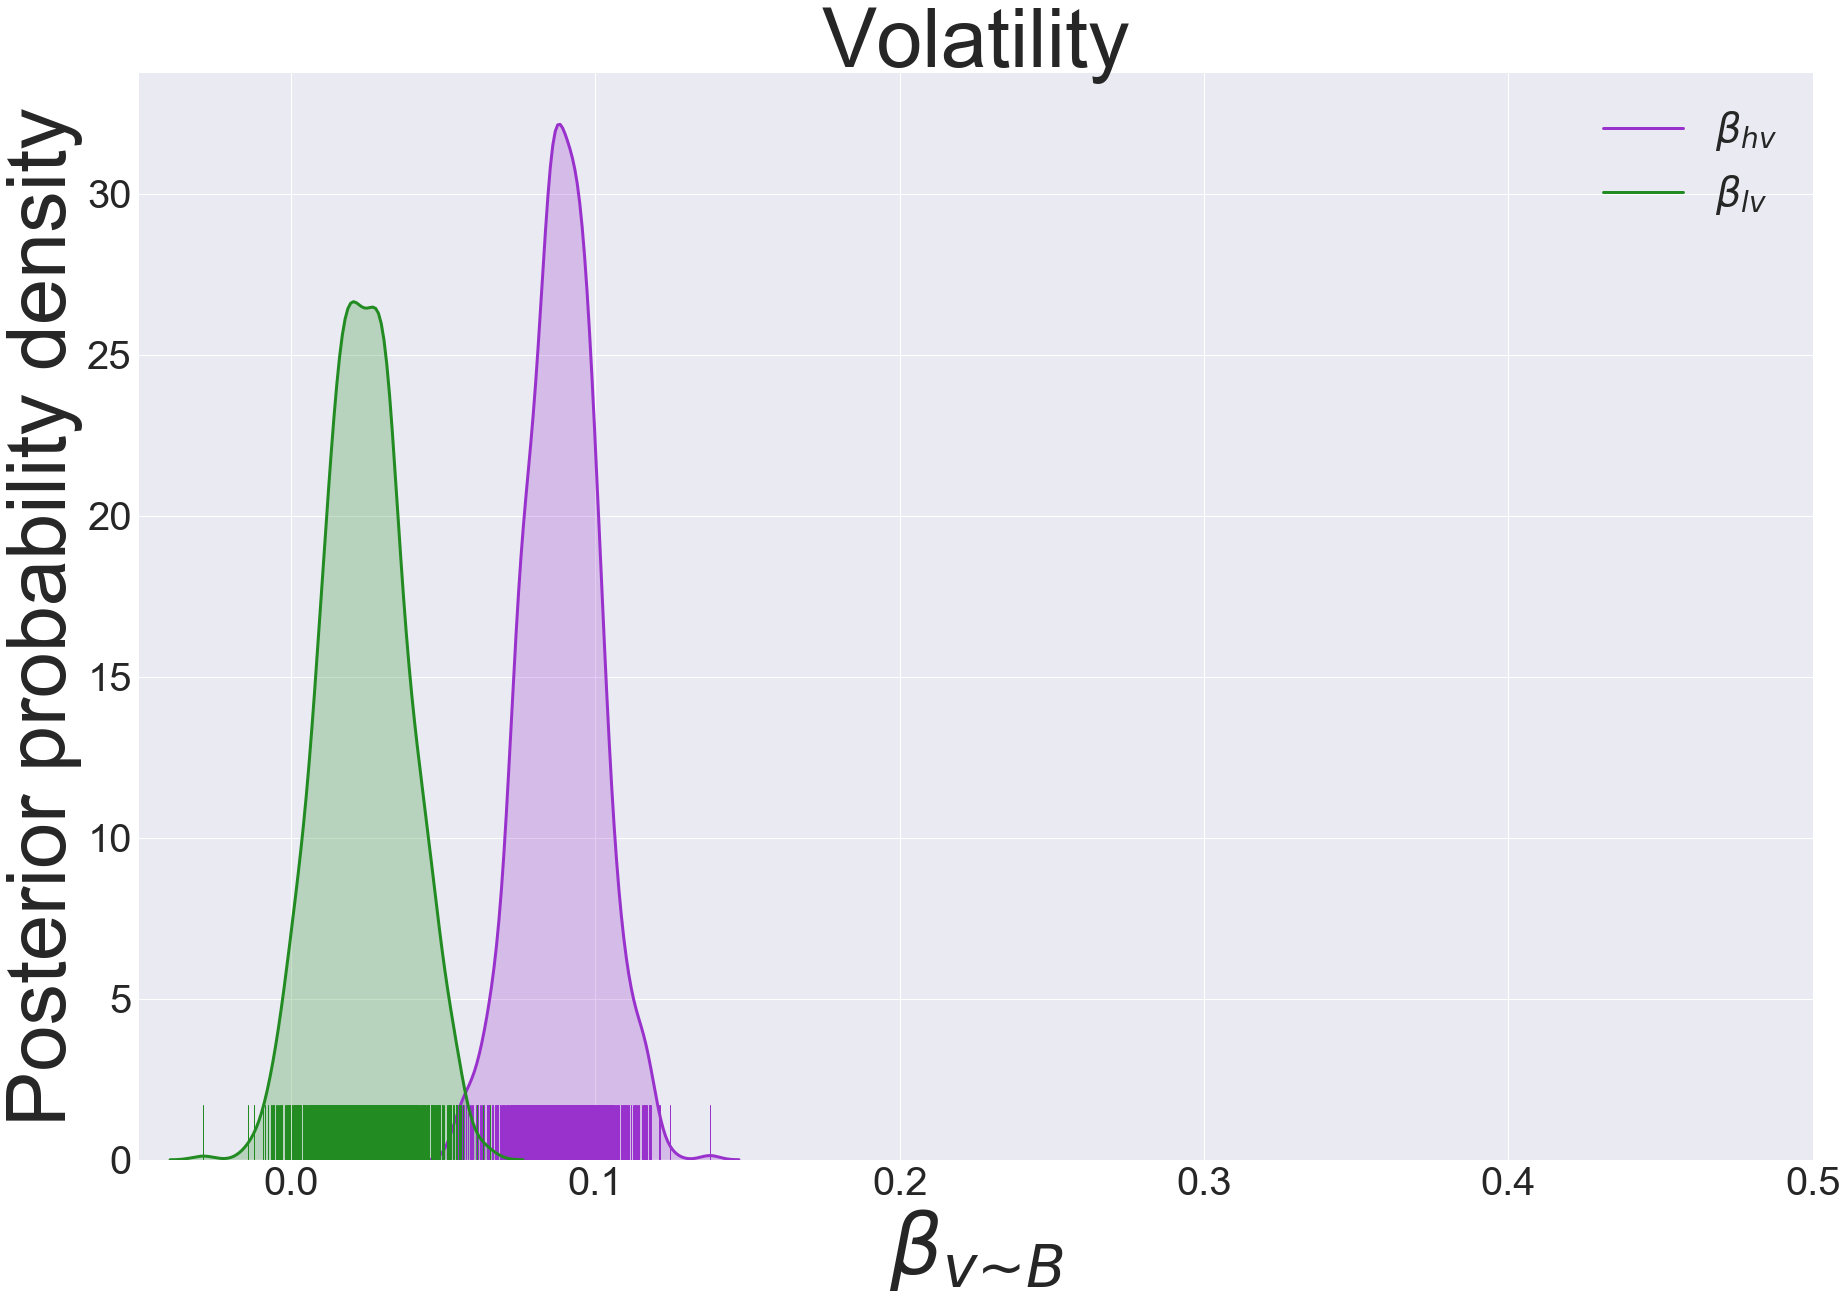

In [17]:
sns.set(font_scale=4)  # crazy big

plt.figure(figsize=(30,20))
sns.distplot(v_hv.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lv.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')

plt.xlim([-.05,0.5]) 
# plt.savefig('vB_betas_volatility_OBS.pdf', dpi=600)

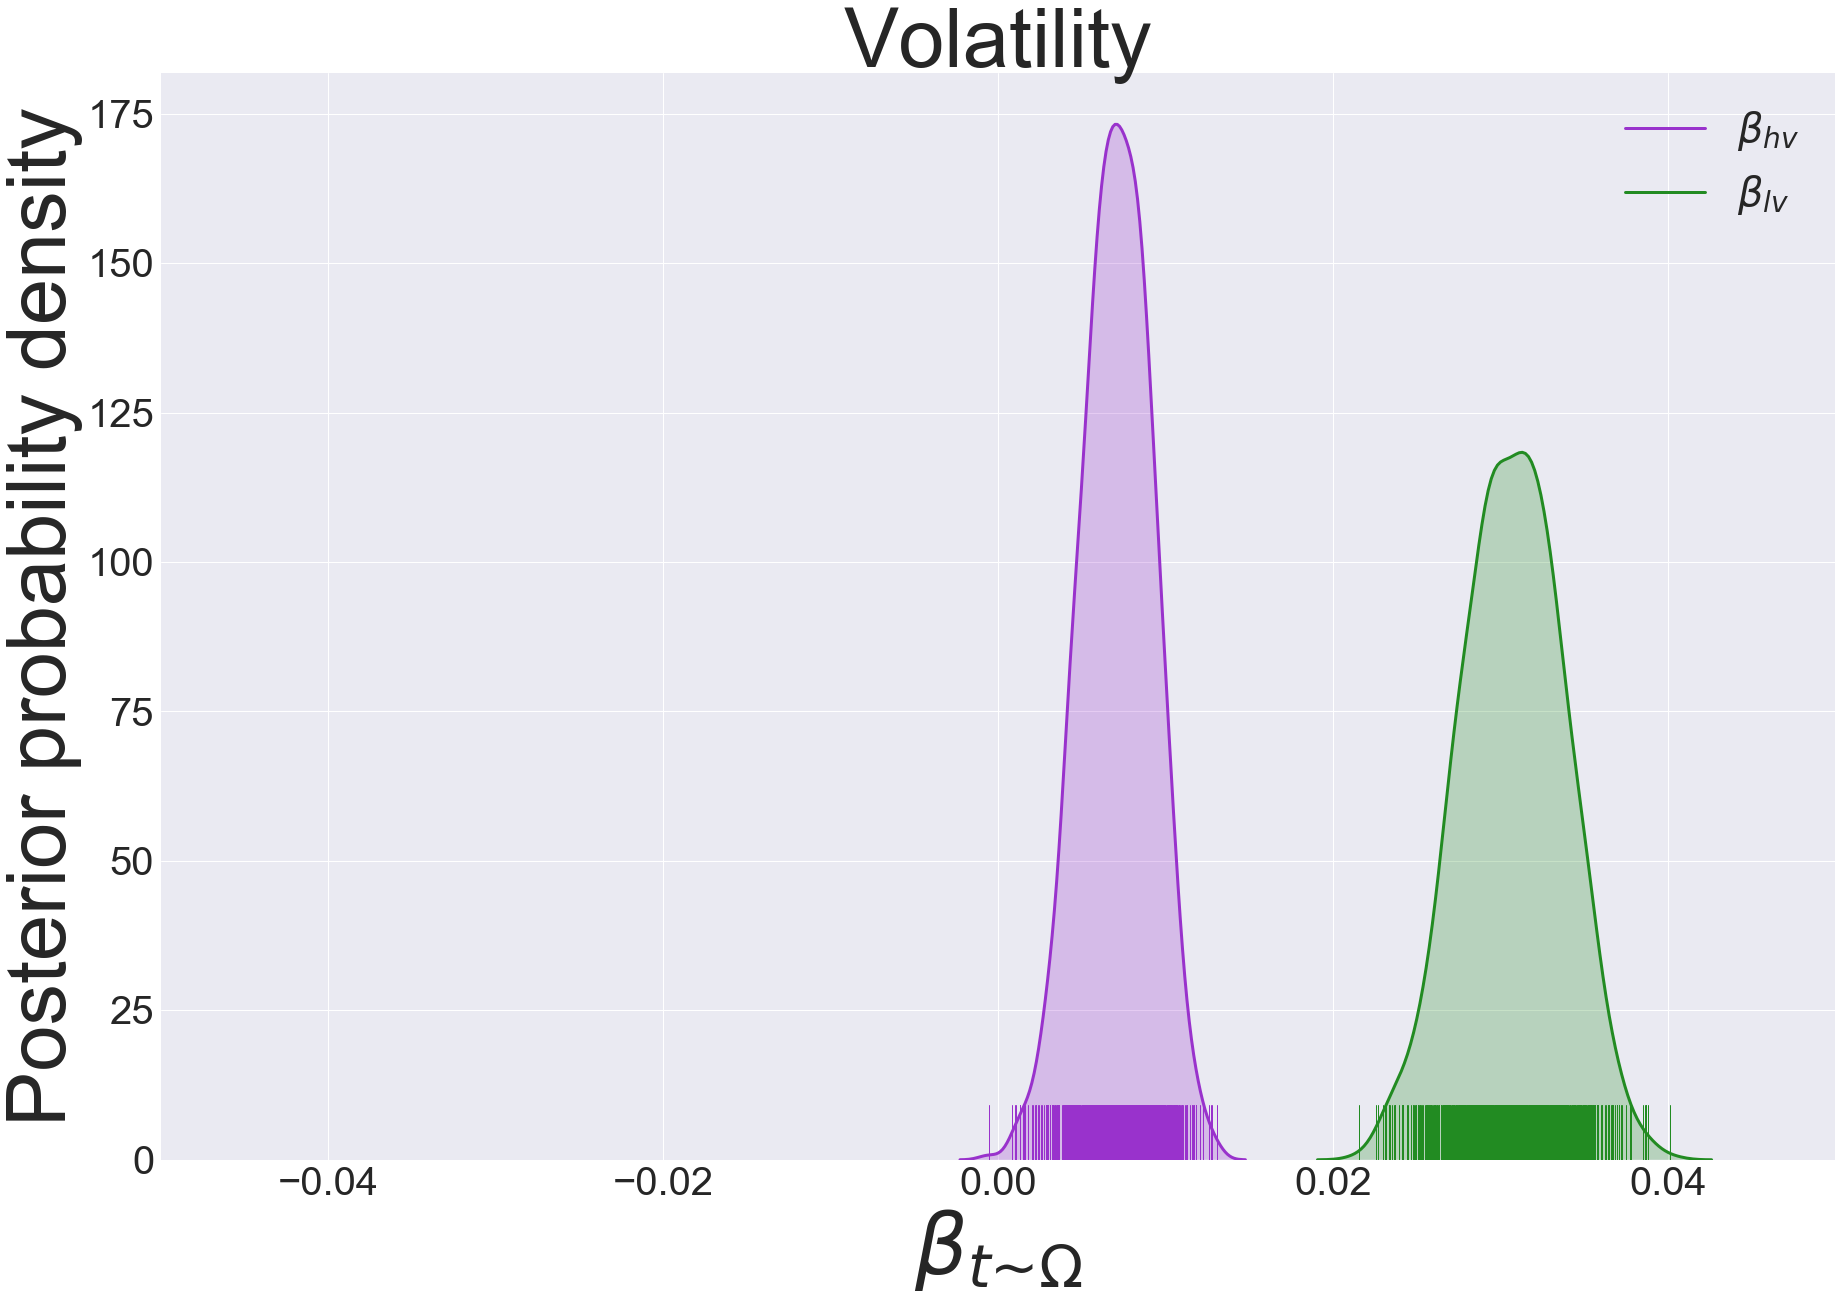

In [18]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(t_hv.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(t_lv.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')
plt.xlim([-0.05,0.05])
plt.savefig('tCPP_betas_vol_OBS.pdf', dpi=600)

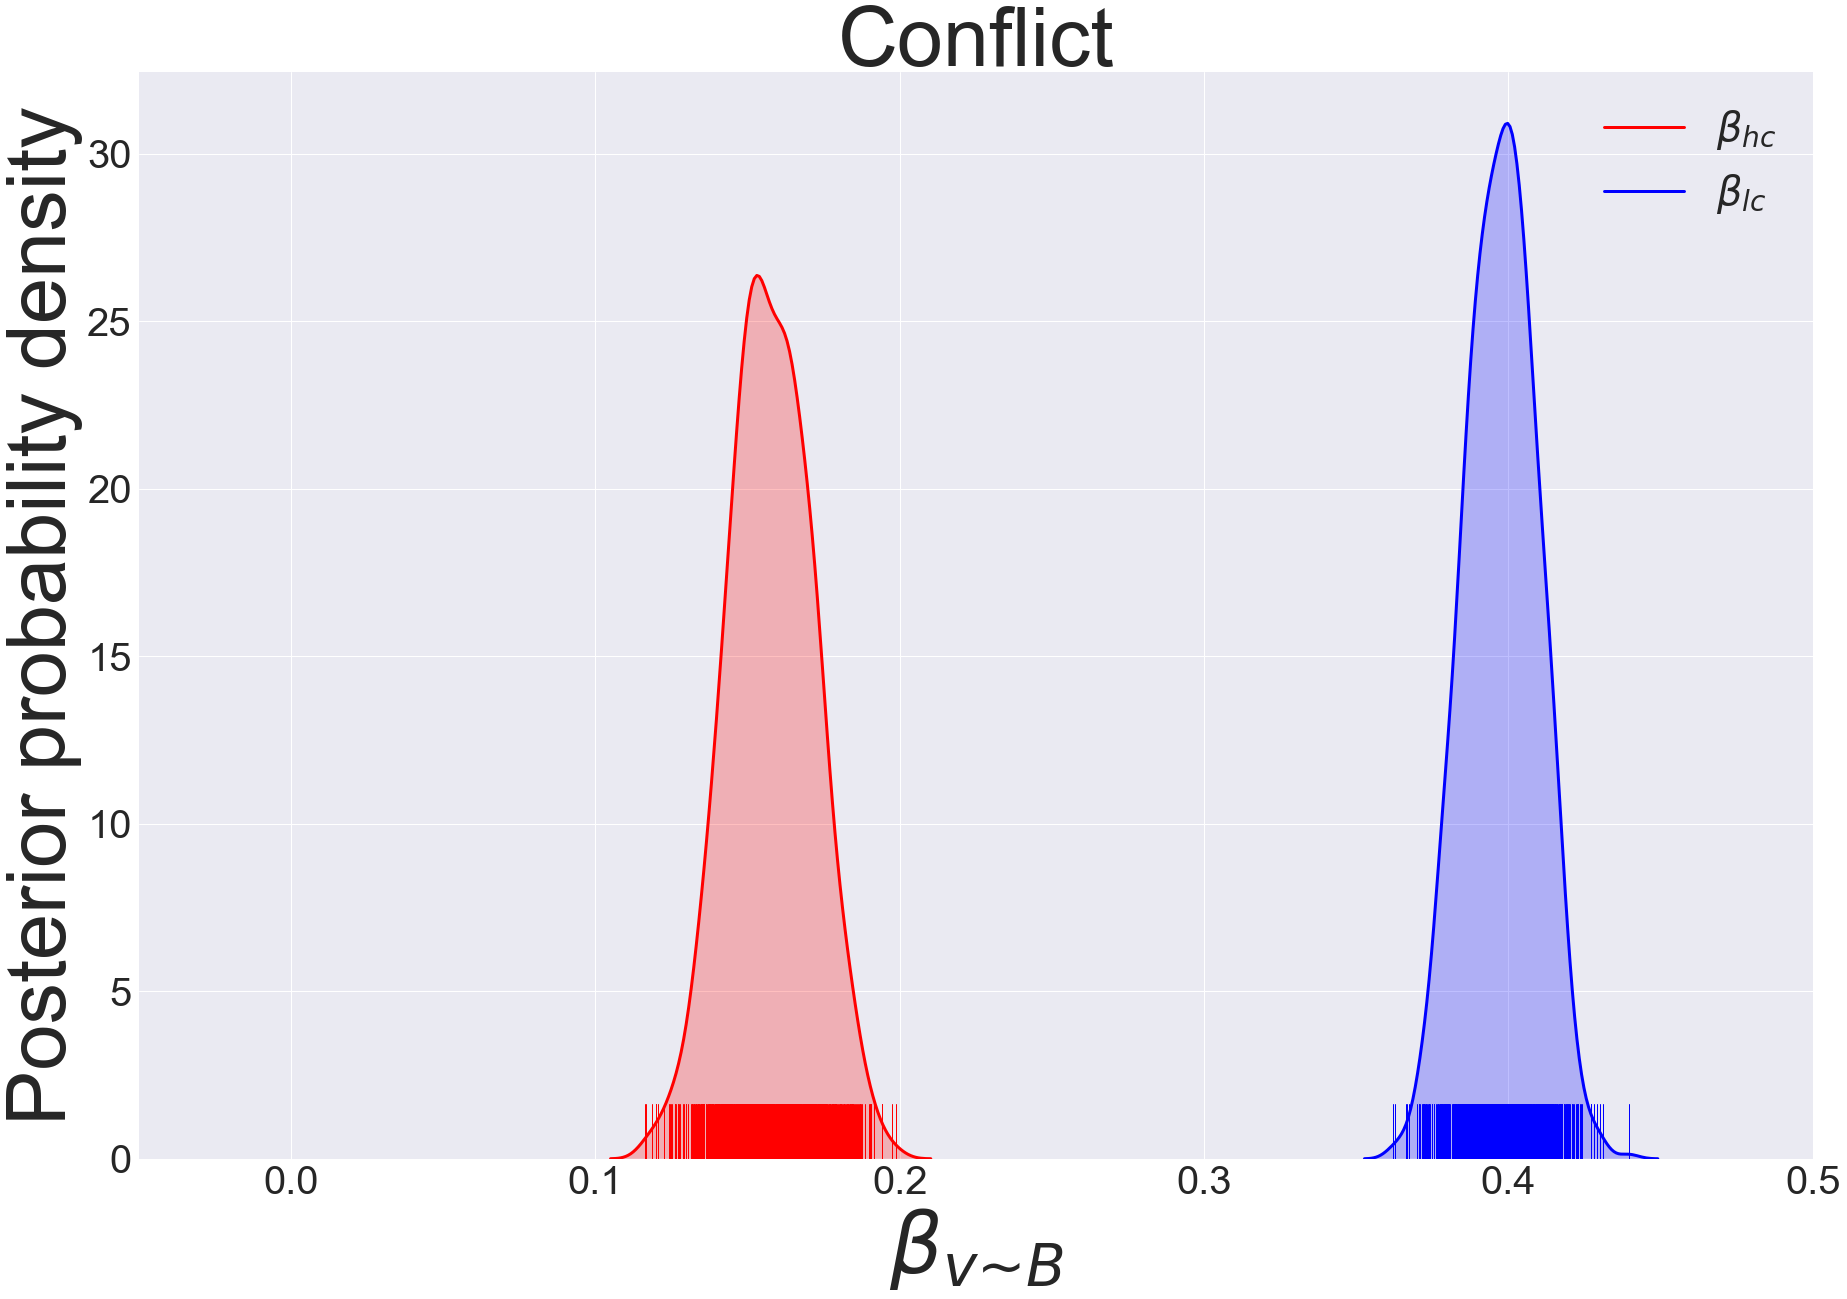

In [19]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(v_hc.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lc.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')
plt.xlim([-.05,0.5]) 
plt.savefig('vB_betas_conflict_OBS.pdf', dpi=600)

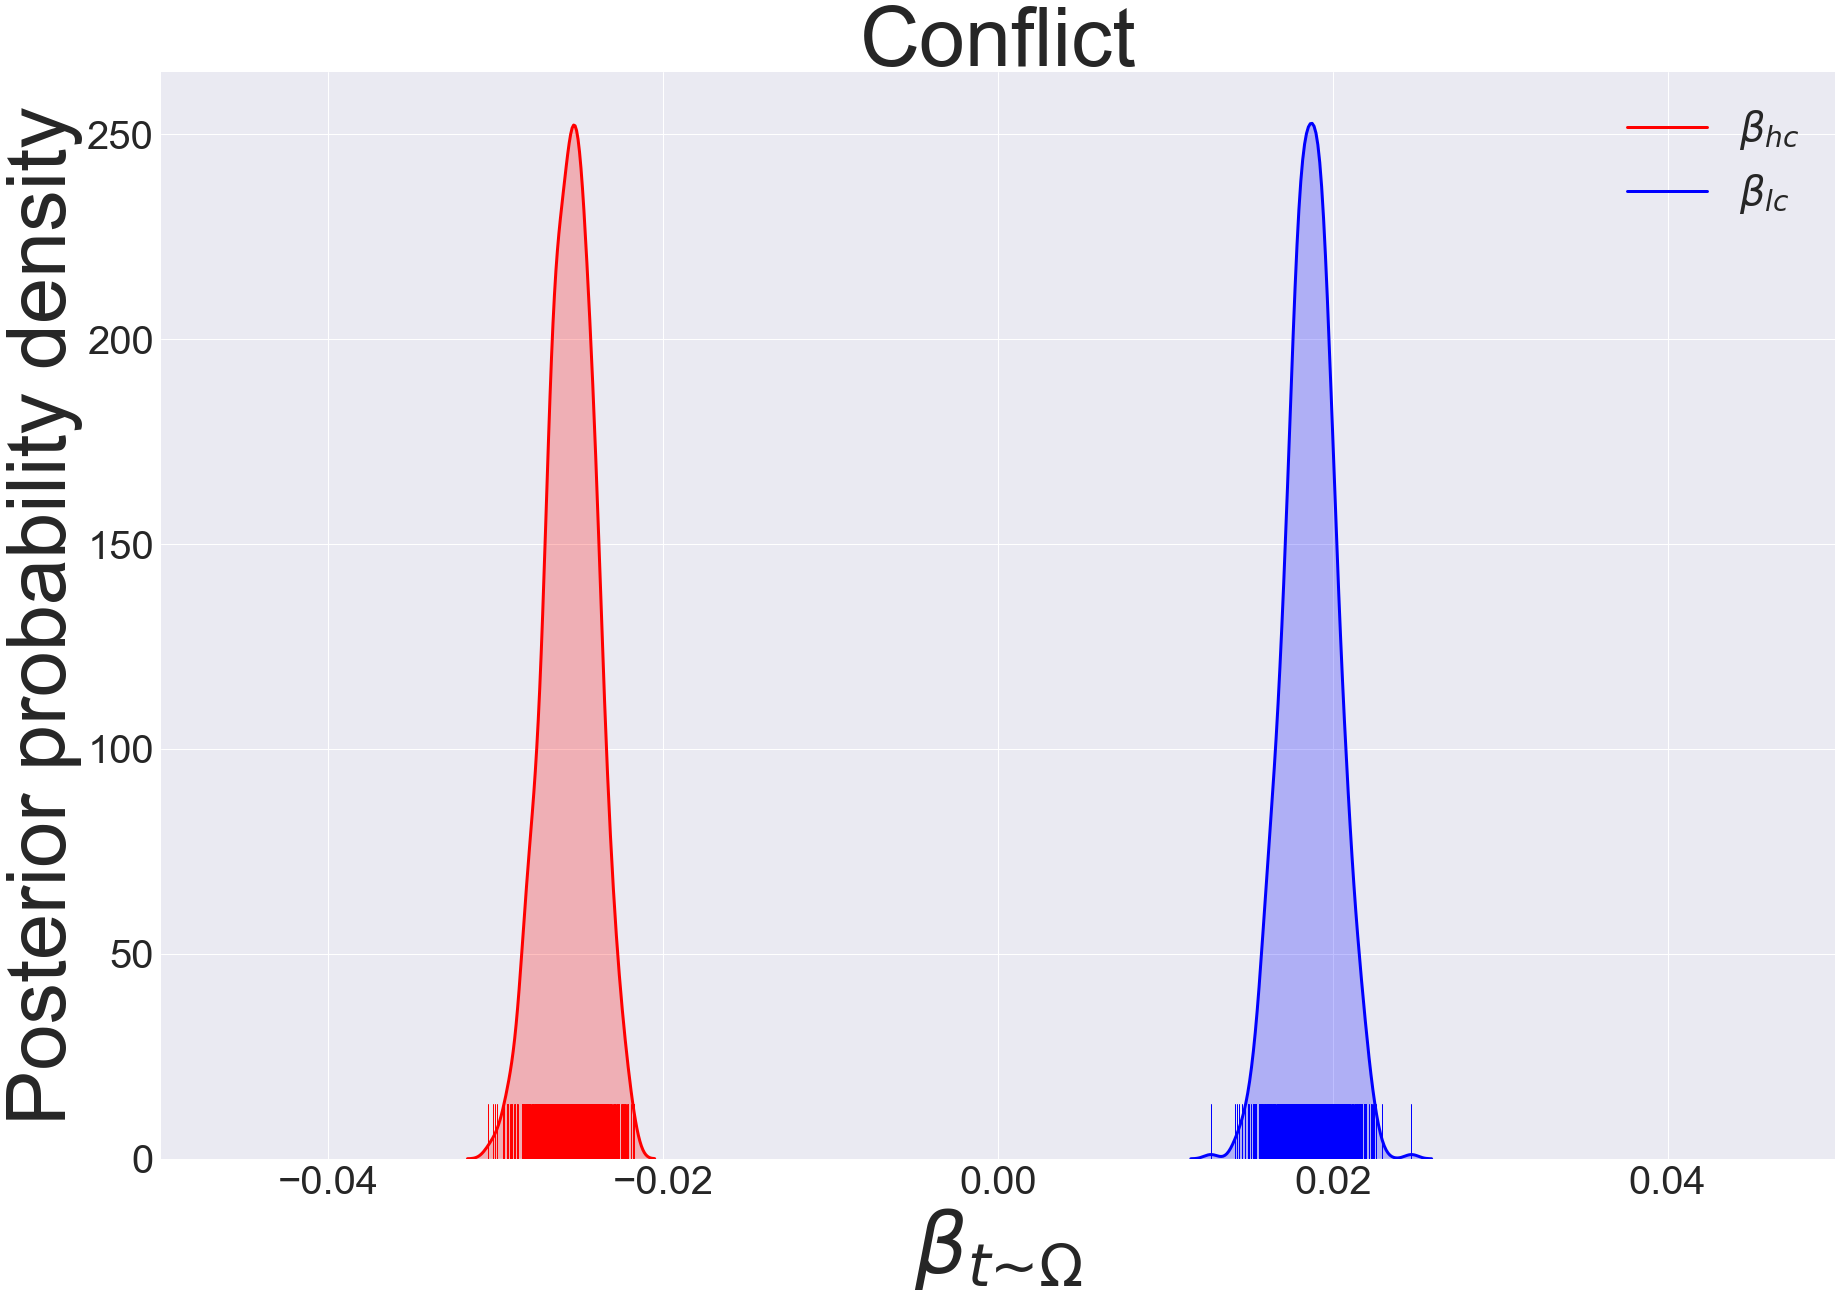

In [20]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(t_hc.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(t_lc.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')
plt.xlim([-0.05,0.05])
plt.savefig('tCPP_betas_conflict_OBS.pdf', dpi=600)

# Extract the regression estimates 

In [73]:
a0 = t_cpp_v_B_obs_reg.nodes_db.ix[['a_Intercept'], 'mean'][0]


In [79]:
t_cpp_v_B_obs_reg.print_stats()

                              mean          std        2.5q        25q         50q         75q       97.5q       mc err
a                         0.999494    0.0208341    0.955793   0.985597    0.998902      1.0135     1.04067  0.000720579
a_std                     0.100597    0.0159001   0.0754238  0.0895099   0.0981998    0.109861    0.137251  0.000651573
a_subj.761                0.854881   0.00851902    0.838368   0.848737     0.85505    0.861003    0.871403  0.000279542
a_subj.762                0.973506   0.00878545    0.955757   0.967756    0.973625    0.979582    0.990295  0.000320341
a_subj.763                 1.05275   0.00960251     1.03434    1.04621     1.05292      1.0592     1.07131  0.000376766
a_subj.764                 1.01507   0.00941954    0.996973    1.00857     1.01527     1.02169      1.0325  0.000359251
a_subj.765                 1.12584    0.0103888     1.10689    1.11838      1.1257     1.13338     1.14592  0.000380979
a_subj.766                0.968387   0.0

In [47]:
v0 = t_cpp_v_B_obs_reg.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

In [48]:
t0 = t_cpp_v_B_obs_reg.nodes_db.ix[['t_Intercept'], 'mean'][0]
t_beta_hc = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0]
t_beta_lc = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0]
t_beta_hv = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0]
t_beta_lv = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0]

In [49]:
#make a copy of the observed data
all_obs_reg_data = all_obs_data.copy()
#include cps
all_obs_reg_data['cp_with_slow_fast'] = test_data.cp_with_slow_fast.values
all_obs_reg_data['epoch_trial_zero_idx'] = test_data.epoch_trial_zero_idx.values
all_obs_reg_data['shifted_epoch_trial_zero_idx'] = test_data.shifted_epoch_trial_zero_idx.values
all_obs_reg_data['epoch_n'] = test_data.epoch_n.values

# Calculate drift rates and non-decision times estimated from the regressions

In [82]:
np.mean(v0 + v_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['B'] )

0.32340957443427348

In [58]:
#store all of the regression estimates 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hc', 'v_reg'] = v0 + v_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lc', 'v_reg']  = v0 + v_beta_lc * all_obs_reg_data[all_obs_reg_data.condition=='lc']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hv', 'v_reg']  = v0 + v_beta_hv * all_obs_reg_data[all_obs_reg_data.condition=='hv']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lv', 'v_reg']  = v0 + v_beta_lv * all_obs_reg_data[all_obs_reg_data.condition=='lv']['B'] 


# plt.plot(v_hc_trials[:600].values, label='hc')
# plt.plot(v_lc_trials[:600].values, label='lc')
# ax = plt.gca()
# ax.set_ylabel('Drift-Rate')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([-1.2,2])
# plt.show()

# plt.plot(v_hv_trials[:600].values, label='hv')
# plt.plot(v_lv_trials[:600].values, label='lv')
# ax = plt.gca()
# ax.set_ylabel('Drift-Rate')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([-1.2,2])
# plt.show()


In [59]:
all_obs_reg_data.loc[all_obs_reg_data.condition =='hc', 't_reg']  = t0 + t_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lc', 't_reg'] = t0 + t_beta_lc * all_obs_reg_data[all_obs_reg_data.condition=='lc']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hv', 't_reg'] = t0 + t_beta_hv * all_obs_reg_data[all_obs_reg_data.condition=='hv']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lv', 't_reg'] = t0 + t_beta_lv * all_obs_reg_data[all_obs_reg_data.condition=='lv']['cpp'] 


# plt.plot(t_hc_trials[:600].values, label='hc')
# plt.plot(t_lc_trials[:600].values, label='lc')
# ax = plt.gca()
# ax.set_ylabel('Non-decision time')
# ax.set_xlabel('Trials')
# plt.ylim([.09,.15])
# ax.legend()
# plt.show()

# plt.plot(t_hv_trials[:600].values, label='hv')
# plt.plot(t_lv_trials[:600].values, label='lv')
# ax = plt.gca()
# ax.set_ylabel('Non-decision time')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([.09,.15])
# plt.show()


# Store for further analysis

In [62]:
#print to csv
all_obs_reg_data.to_csv('/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/all_reg_obs_data.csv')

In [230]:
import pymc as pm
import numpy as np
import pymc.progressbar as pbar

def _parents_to_random_posterior_sample(bottom_node, pos=None):
    """Walks through parents and sets them to pos sample."""
    for i, parent in enumerate(bottom_node.extended_parents):
        if not isinstance(parent, pm.Node): # Skip non-stochastic nodes
            continue

        if pos is None:
            # Set to random posterior position
            pos = np.random.randint(0, len(parent.trace()))

        assert len(parent.trace()) >= pos, "pos larger than posterior sample size"
        parent.value = parent.trace()[pos]

def _post_pred_generate(bottom_node, samples=500, data=None, append_data=True):
    """Generate posterior predictive data from a single observed node."""
    datasets = []
    ##############################
    # Sample and generate stats
    for sample in range(samples):
        _parents_to_random_posterior_sample(bottom_node)
        # Generate data from bottom node
        sampled_data = bottom_node.random()
        if append_data and data is not None:
            sampled_data.reset_index(inplace=True)  # Only modification of original Kabuki code
            sampled_data = sampled_data.join(data.reset_index(), lsuffix='_sampled')
        datasets.append(sampled_data)
    return datasets

def post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True):
    results = {}

    # Progress bar
    if progress_bar:
        n_iter = len(model.get_observeds())
        bar = pbar.progress_bar(n_iter)
        bar_iter = 0
    else:
        print("Sampling...")

    if groupby is None:
        iter_data = ((name, model.data.ix[obs['node'].value.index]) for name, obs in model.iter_observeds())
    else:
        iter_data = model.data.groupby(groupby)

    for name, data in iter_data:
        node = model.get_data_nodes(data.index)

        if progress_bar:
            bar_iter += 1
            bar.update(bar_iter)

        if node is None or not hasattr(node, 'random'):
            continue # Skip

        ##############################
        # Sample and generate stats
        datasets = _post_pred_generate(node, samples=samples, data=data, append_data=append_data)
        results[name] = pd.concat(datasets, names=['sample'], keys=list(range(len(datasets))))

    if progress_bar:
        bar_iter += 1
        bar.update(bar_iter)

    return pd.concat(results, names=['node'])

# Simulate data from posterior for top 3 models

In [ ]:
#this takes 5.5 hours
ppc_data_t_cpp_v_B = post_pred_gen(t_cpp_v_B_obs_reg, append_data=True, samples=200)

In [ ]:
ppc_data_z_cpp_v_B = post_pred_gen(z_cpp_v_B_obs_reg, append_data=True, samples=200)

In [231]:
ppc_data_a_cpp_v_B = post_pred_gen(a_cpp_v_B_obs_reg, append_data=True, samples=200)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


 [-------------------112%-------------------] 27 of 24 complete in 44185.2 sec

In [ ]:
ppc_data

In [337]:
ppc_compare_t_cpp_v_B = hddm.utils.post_pred_stats(all_obs_data, ppc_data_t_cpp_v_B)

In [232]:
#all subjects accounted for?
ppc_data_t_cpp_v_B.subj_idx.sort_values(ascending=True).unique()

array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
       774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784])

In [234]:
#because error rts are flipped, can get response data
ppc_data_t_cpp_v_B['response_sampled'] = (np.sign(ppc_data_t_cpp_v_B.rt_sampled) == 1)*1 #convert to integer
min(ppc_data_t_cpp_v_B.response_sampled)

0

In [236]:
#to get pooled error/correct rt averages, take abs. value of rts
ppc_data_t_cpp_v_B['rt_sampled_abs'] = abs(ppc_data_t_cpp_v_B.rt_sampled)
ppc_data_t_cpp_v_B['rt_abs'] = abs(ppc_data_t_cpp_v_B.rt)

min(ppc_data_t_cpp_v_B.rt_sampled_abs)

0.0810203612525517

In [244]:
ppc_data_t_cpp_v_B.groupby('condition').mean()

rt_sampled  response  stimulus        rt  subj_idx         B  \
condition                                                                 
hc           0.036032  0.555972  0.495903  0.036784     772.5  0.063152   
hv           0.035611  0.541458  0.509861  0.028256     772.5  0.070450   
lc           0.038273  0.547222  0.504583  0.032208     772.5  0.119940   
lv           0.035923  0.530972  0.490972  0.019590     772.5  0.088791   

                cpp  response_sampled  rt_sampled_abs    rt_abs  \
condition                                                         
hc         0.106635          0.549532        0.364840  0.328923   
hv         0.139935          0.548466        0.368946  0.339947   
lc         0.087976          0.554696        0.362135  0.326852   
lv         0.079337          0.548602        0.370794  0.326611   

           accuracy_sampled  accuracy  
condition                              
hc                 0.502935  0.601736  
hv                 0.501434  0.616458  
lc                 0.549555  0.719583  
lv                 0.498594  0.674583

In [237]:
#from response and correct stimulus, get accuracy. convert from true/false to 1/0
ppc_data_t_cpp_v_B['accuracy_sampled'] = (ppc_data_t_cpp_v_B.response_sampled == ppc_data_t_cpp_v_B.stimulus)*1 
ppc_data_t_cpp_v_B['accuracy'] = (ppc_data_t_cpp_v_B.response == ppc_data_t_cpp_v_B.stimulus)*1

In [290]:
#sanity check
#did the concatenation process corrupt the original data? 

print(np.mean(ppc_data_t_cpp_v_B.accuracy.values), np.mean(test.p_id_accuracy.values))
print(np.mean(ppc_data_t_cpp_v_B.rt_abs.values), np.mean(test.rt.values))

#by group
print(ppc_data_t_cpp_v_B.groupby('condition')['accuracy'].mean(), test.groupby('condition')['p_id_accuracy'].mean())
print(ppc_data_t_cpp_v_B.groupby('condition')['rt_abs'].mean(), test.groupby('condition')['rt'].mean())

0.653090277778 0.653090277778
0.330583280023 0.330583280023
condition
hc    0.601736
hv    0.616458
lc    0.719583
lv    0.674583
Name: accuracy, dtype: float64 condition
hc    0.601736
hv    0.616458
lc    0.719583
lv    0.674583
Name: p_id_accuracy, dtype: float64
condition
hc    0.328923
hv    0.339947
lc    0.326852
lv    0.326611
Name: rt_abs, dtype: float64 condition
hc    0.328923
hv    0.339947
lc    0.326852
lv    0.326611
Name: rt, dtype: float64


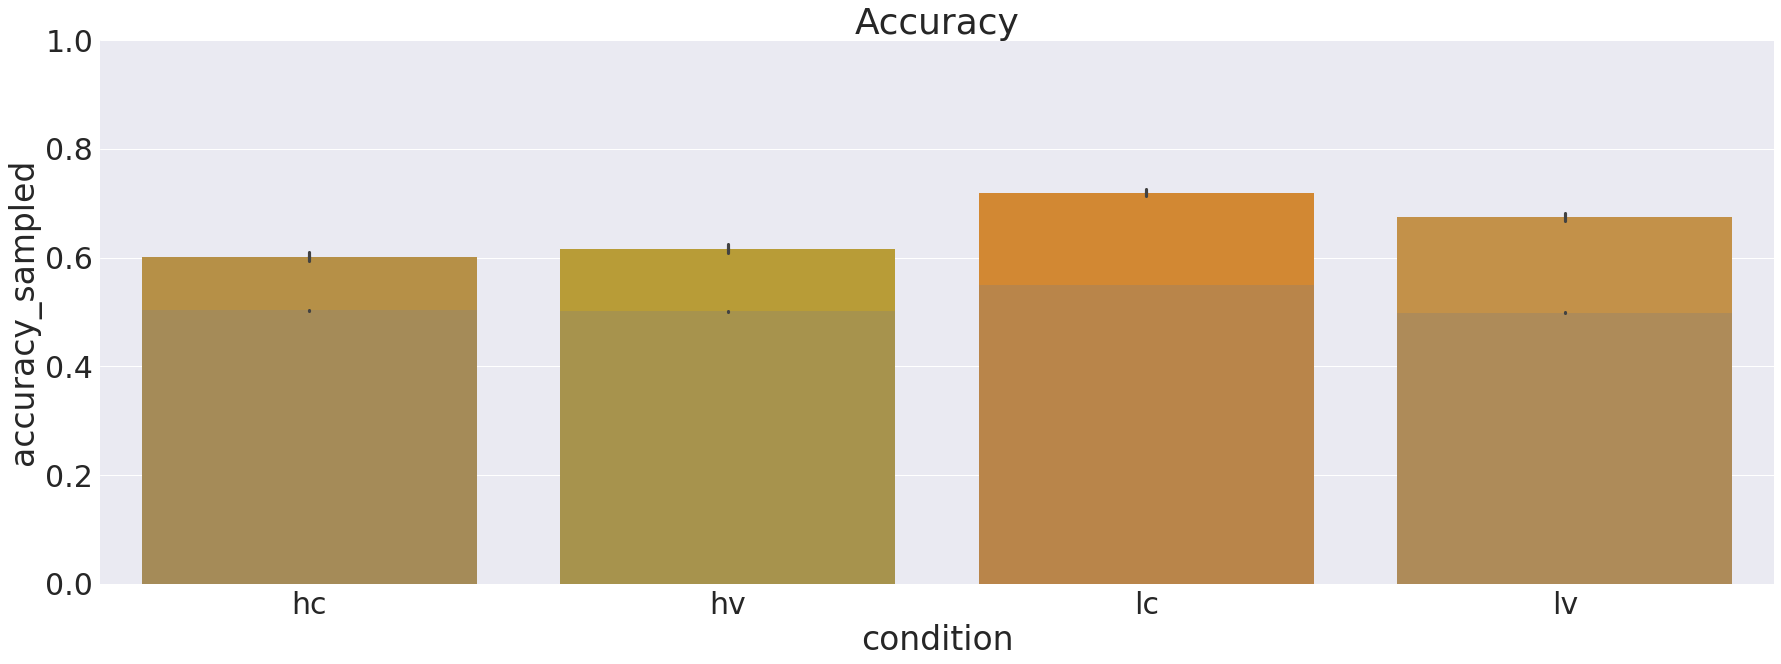

In [252]:
plt.title('Accuracy')
sns.barplot(x='condition', y='accuracy', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000)
sns.barplot(x='condition', y='accuracy_sampled', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000, color='gray', alpha=0.3)
plt.ylim([0,1])
plt.show()

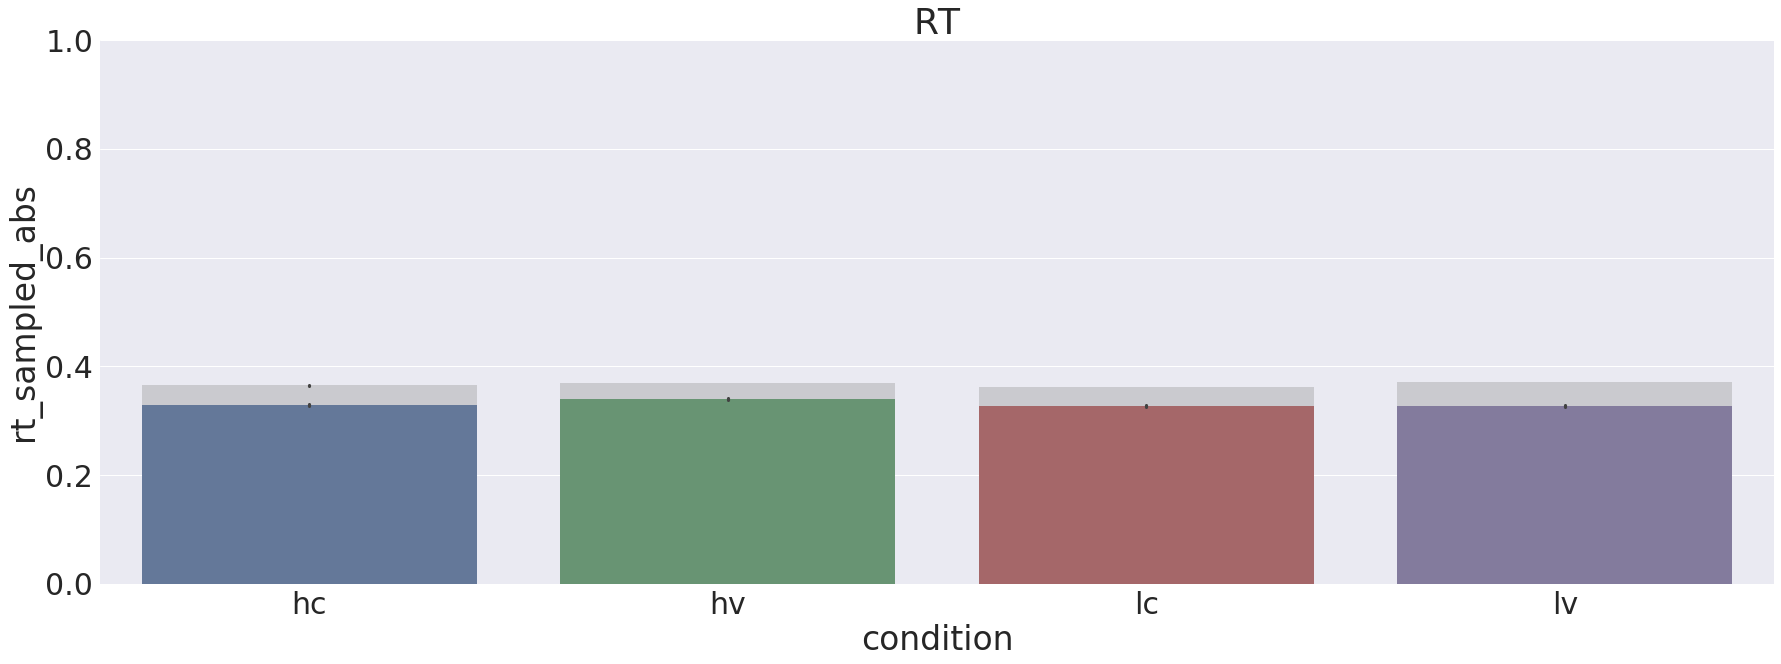

In [245]:
plt.title('RT')
sns.barplot(x='condition', y='rt_sampled_abs', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000, color='gray', alpha=0.3)
plt.ylim([0,1])
plt.show()

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


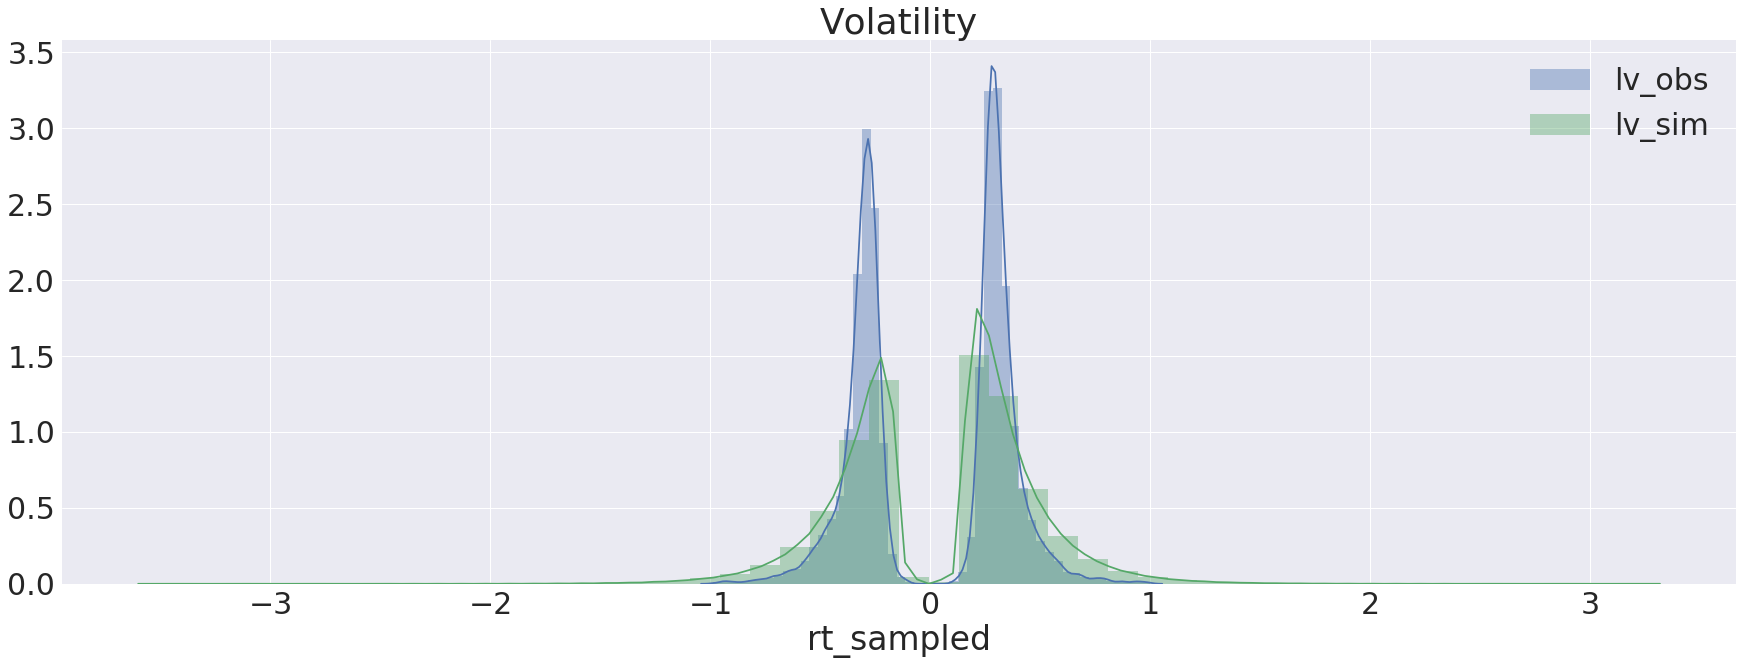

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


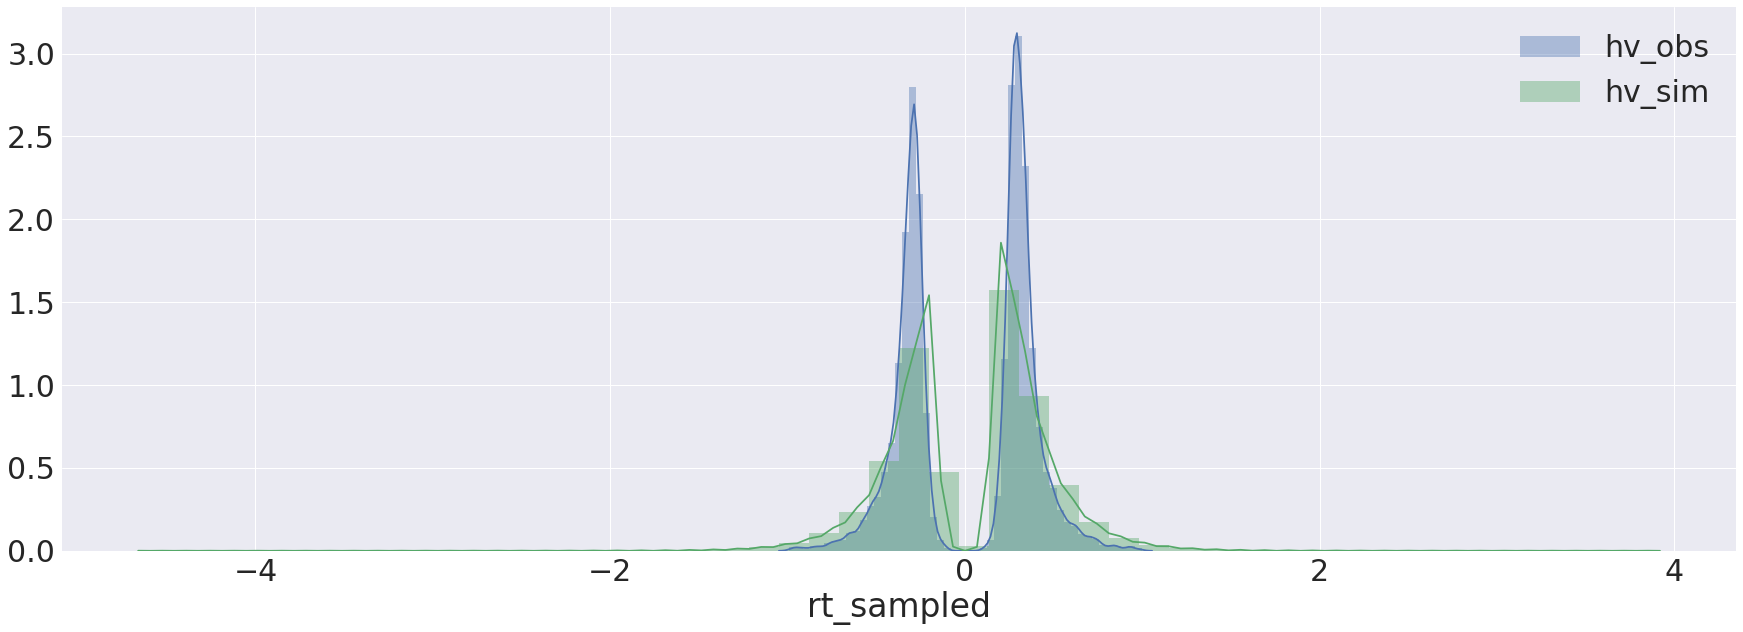

In [251]:
#some simulated rts are very long. may be fixed with greater # samples. 
plt.title('Volatility')
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'lv'], label='lv_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'lv'], label='lv_sim')
plt.legend()
plt.show()
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'hv'], label='hv_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'hv'], label='hv_sim')
plt.legend()
plt.show()

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


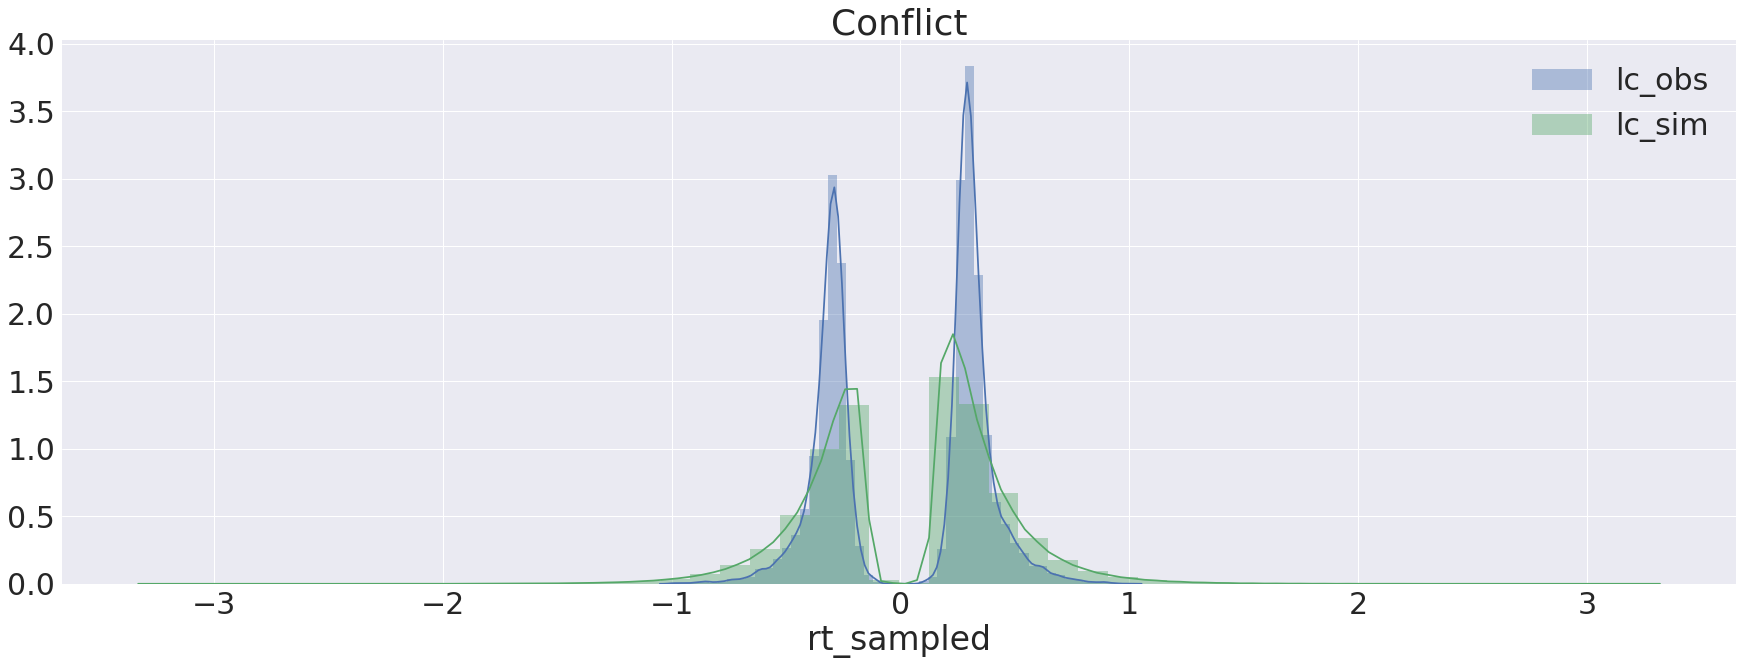

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


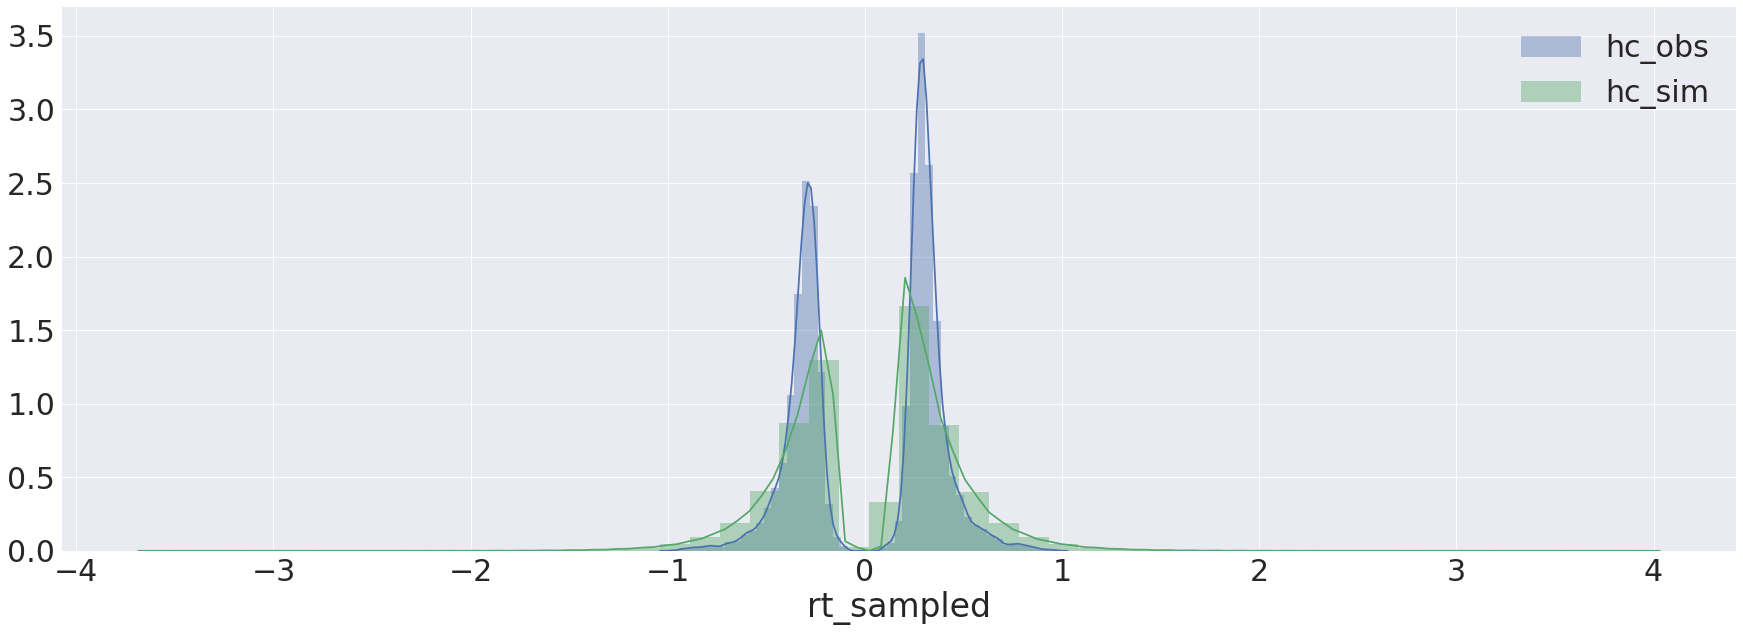

In [250]:
#some simulated rts are very long. may be fixed with greater # samples. 
plt.title('Conflict')
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'lc'], label='lc_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'lc'], label='lc_sim')
plt.legend()
plt.show()
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'hc'], label='hc_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'hc'], label='hc_sim')
plt.legend()
plt.show()

In [293]:
sim_real_rts = (ppc_data_t_cpp_v_B.groupby(['condition', 'subj_idx'])[['rt_sampled_abs', 'rt_abs']].median()).reset_index()
sim_real_acc = (ppc_data_t_cpp_v_B.groupby(['condition', 'subj_idx'])[['accuracy_sampled', 'accuracy']].mean()).reset_index()

sim_real_rts_melted = pd.melt(sim_real_rts, id_vars=["condition", "subj_idx"], 
                 var_name="data_type", value_name='rt')
sim_real_acc_melted = pd.melt(sim_real_acc, id_vars=["condition", "subj_idx"], 
                 var_name="data_type", value_name='accuracy')

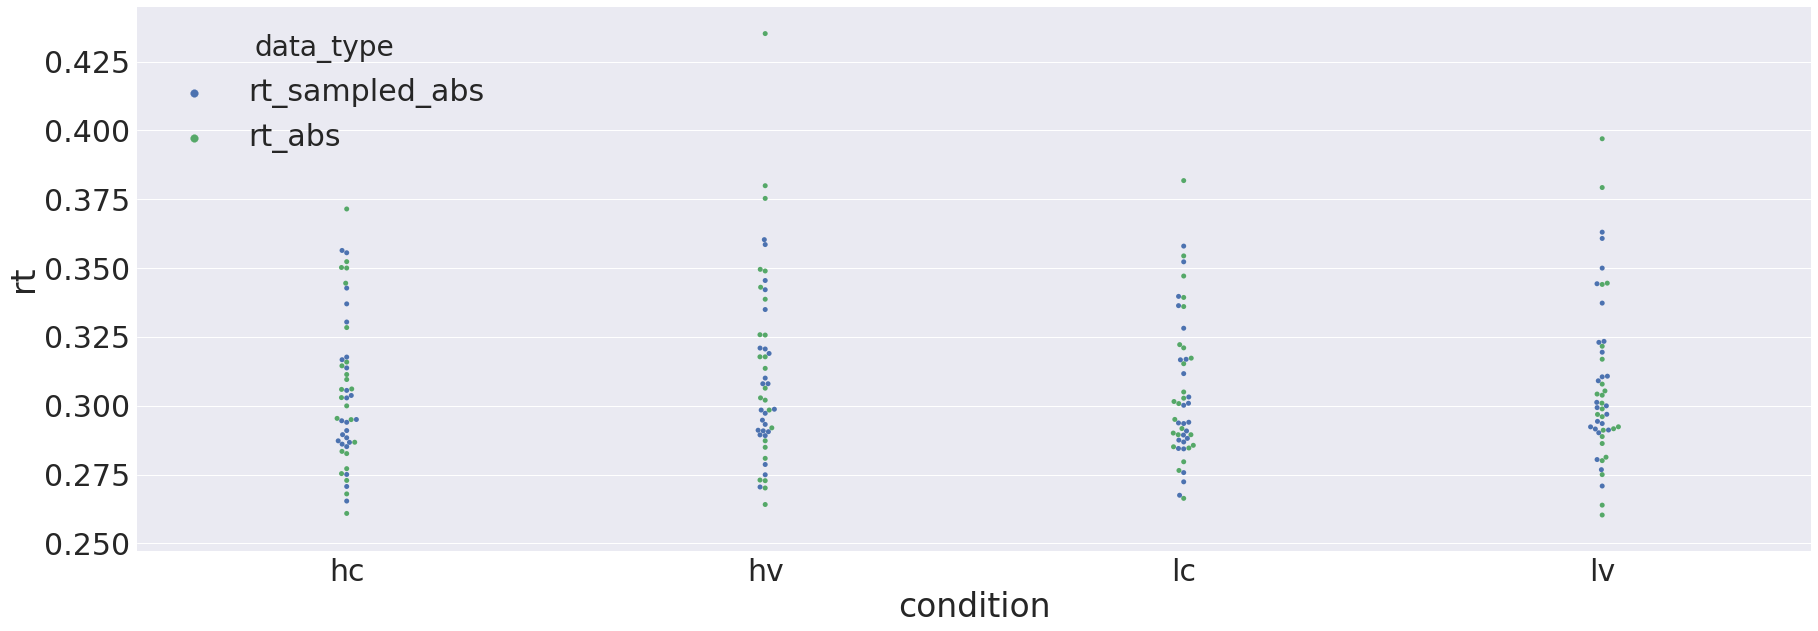

(0, 1)

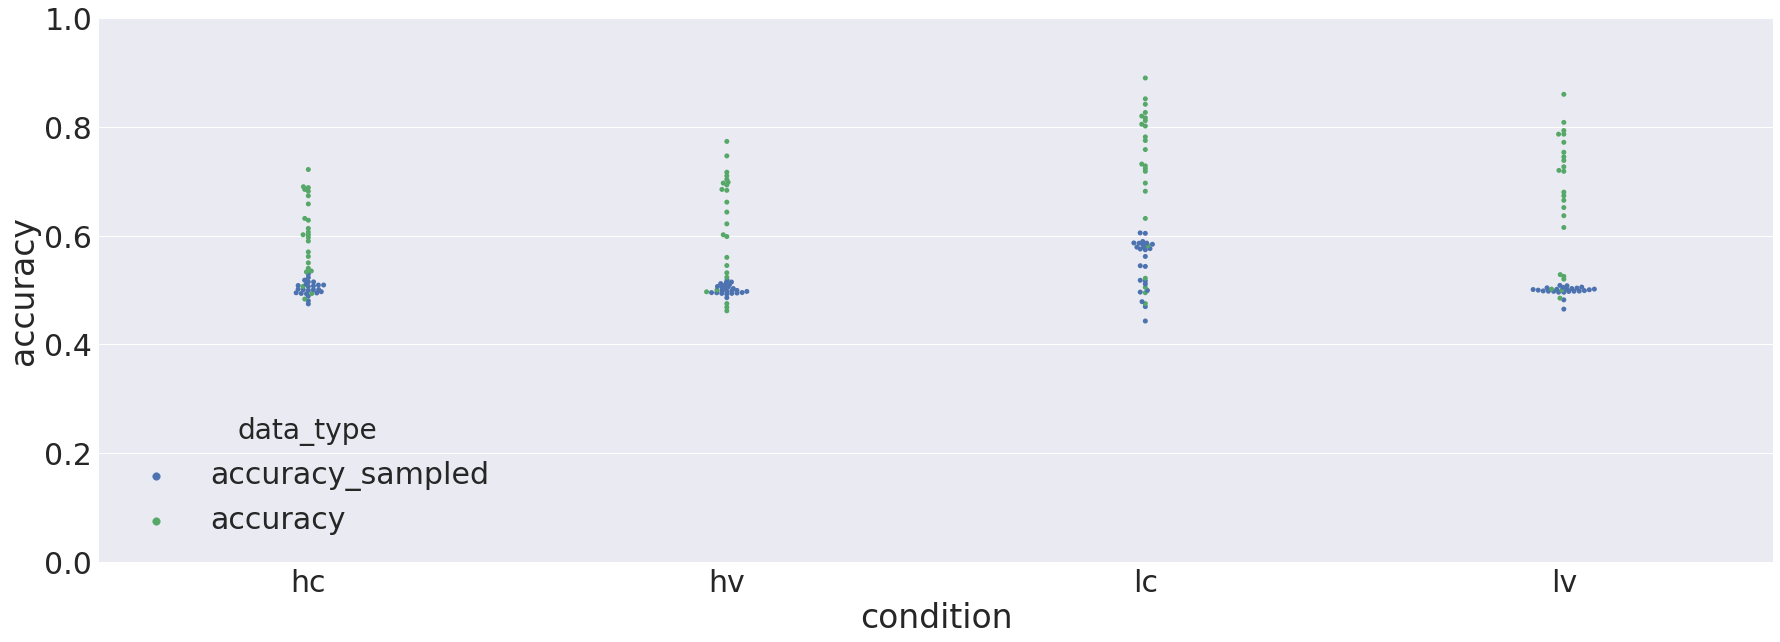

In [294]:
sns.swarmplot(x="condition", y="rt", hue="data_type", data=sim_real_rts_melted)
plt.show()
sns.swarmplot(x="condition", y="accuracy", hue="data_type", data=sim_real_acc_melted)
plt.ylim([0,1])
# plt.legend(frameon=1,loc='best')

In [319]:
lc_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'lc') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]
hc_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'hc') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]

lv_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'lv') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]
hv_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'hv') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]

In [327]:
lc_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'lc') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]
hc_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'hc') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]

lv_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'lv') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]
hv_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'hv') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]

In [333]:
stats.ttest_rel(lc_acc_sim, hc_acc_sim)

stats.ttest_rel(lv_acc_sim, hv_acc_sim)

Ttest_relResult(statistic=-1.0623339604140387, pvalue=0.29911180716660929)

In [311]:
stats.ttest_ind(sampled_rts, real_rts)

0     0.289469
1     0.316698
2     0.302820
3     0.288345
4     0.355541
5     0.275018
6     0.342709
7     0.303713
8     0.293964
9     0.286676
10    0.294982
11    0.286030
12    0.287232
13    0.285133
14    0.290958
15    0.305552
16    0.294524
17    0.336976
18    0.313710
19    0.356381
20    0.265360
21    0.317657
22    0.270651
23    0.330392
Name: rt, dtype: float64

In [297]:
from scipy import stats 

#accept null 
stats.ttest_ind(sampled_rts, real_rts)


Ttest_indResult(statistic=-0.72364926943473584, pvalue=0.47017107775746569)

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')